In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
#PATH = '/content/drive/My Drive/PPM_Stability/'
#PATH = "C:/Users/velmurug/Documents/Stability Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/Mythreyi/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
PATH = "C:/Users/mythr/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
sys.path.append(PATH)

In [2]:
from DatasetManager import DatasetManager

import pandas as pd
import numpy as np

import os
import sys
from sys import argv
import pickle
import random
import joblib

import statistics

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_ref = "bpic2012"
params_dir = PATH + "params"
results_dir = "results"
bucket_method = "prefix"
cls_encoding = "index"
cls_method = "xgboost"

gap = 1
n_iter = 1

method_name = "%s_%s"%(bucket_method, cls_encoding)

generate_samples = False
generate_lime = True
generate_kernel_shap = False
generate_model_shap = True

sample_size = 2
exp_iter = 10
max_feat = 10

dataset_ref_to_datasets = {
    #"bpic2011": ["bpic2011_f%s"%formula for formula in range(1,5)],
    "bpic2015": ["bpic2015_%s_f2"%(municipality) for municipality in range(5,6)],
    "bpic2017" : ["bpic2017_accepted"],
    "bpic2012" : ["bpic2012_accepted"]
    #"insurance": ["insurance_activity", "insurance_followup"],
    #"sepsis_cases": ["sepsis_cases_1", "sepsis_cases_2", "sepsis_cases_4"]
}

datasets = [dataset_ref] if dataset_ref not in dataset_ref_to_datasets else dataset_ref_to_datasets[dataset_ref]

datasets

['bpic2012_accepted']

Bucket 1
True Negatives
Average LIME Stability: 0.2593333333333336
Average SHAP Stability: 1.0


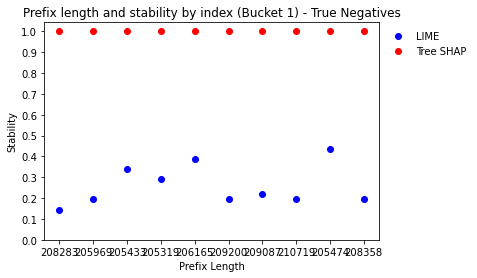

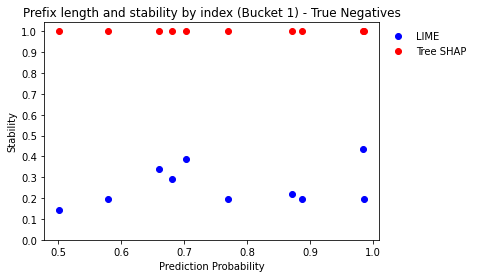

True Positives
Average LIME Stability: 0.2666666666666669
Average SHAP Stability: 1.0


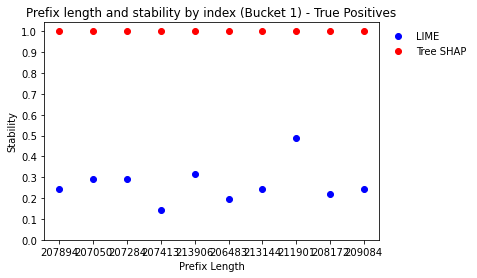

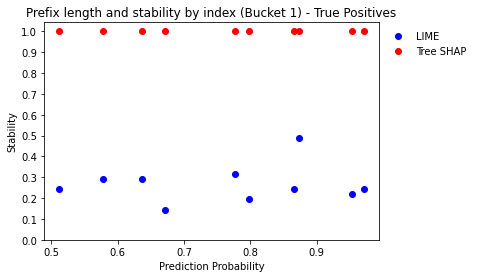

False Negatives
Average LIME Stability: 0.2691111111111114
Average SHAP Stability: 1.0


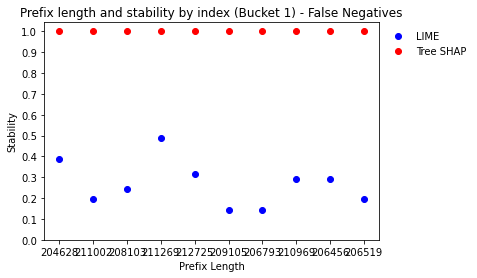

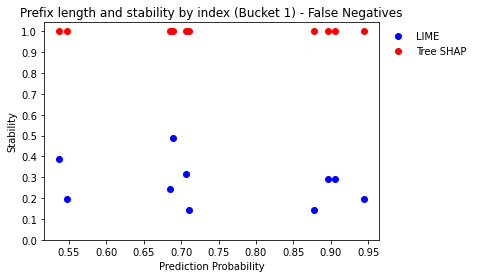

False Positives
Average LIME Stability: 0.2691111111111113
Average SHAP Stability: 1.0


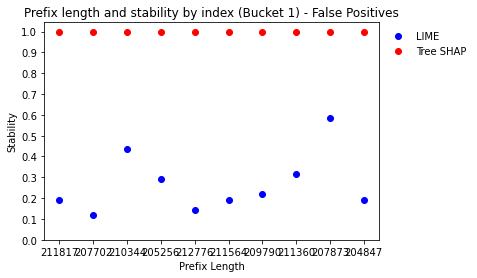

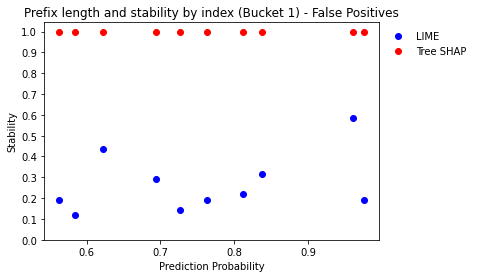

Bucket 2
True Negatives
Average LIME Stability: 0.6665454545454546
Average SHAP Stability: 1.0


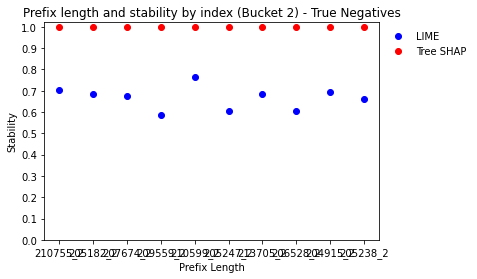

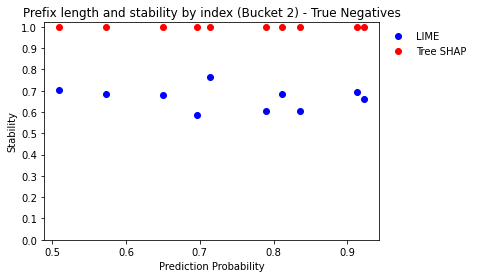

True Positives
Average LIME Stability: 0.6427878787878788
Average SHAP Stability: 1.0


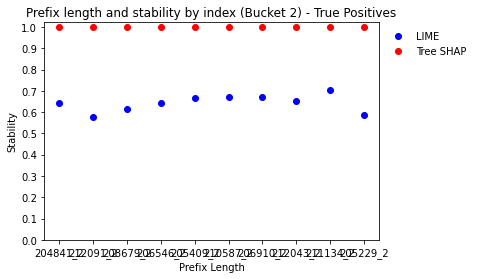

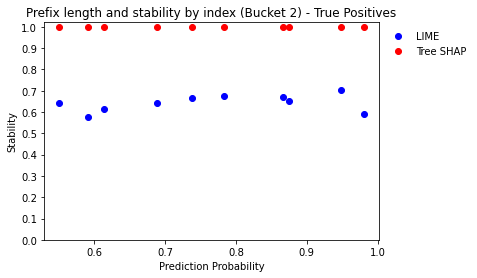

False Negatives
Average LIME Stability: 0.6483030303030303
Average SHAP Stability: 1.0


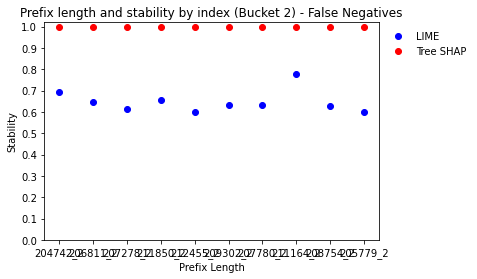

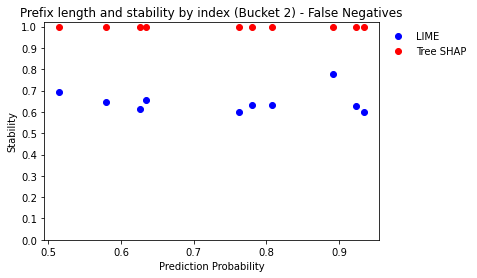

False Positives
Average LIME Stability: 0.6576363636363636
Average SHAP Stability: 1.0


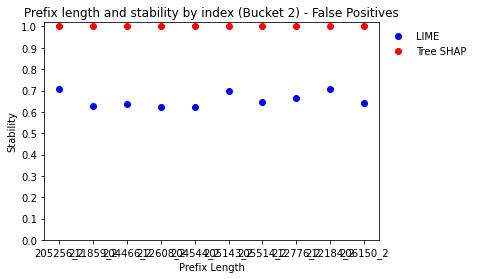

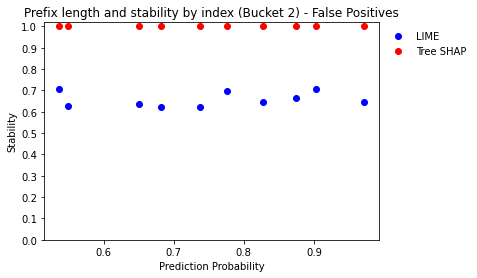

Bucket 3
True Negatives
Average LIME Stability: 0.6840289855072463
Average SHAP Stability: 1.0


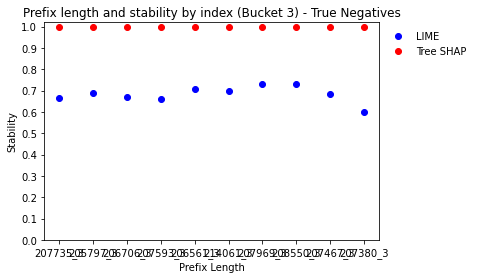

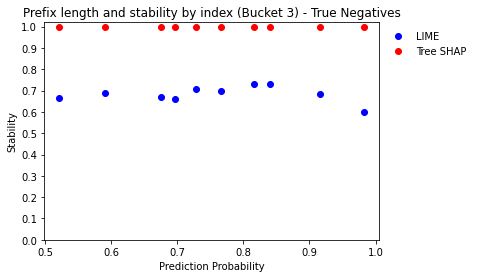

True Positives
Average LIME Stability: 0.6639420289855072
Average SHAP Stability: 1.0


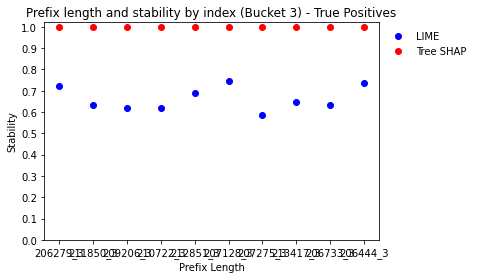

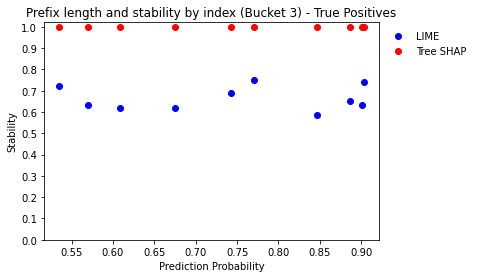

False Negatives
Average LIME Stability: 0.696463768115942
Average SHAP Stability: 1.0


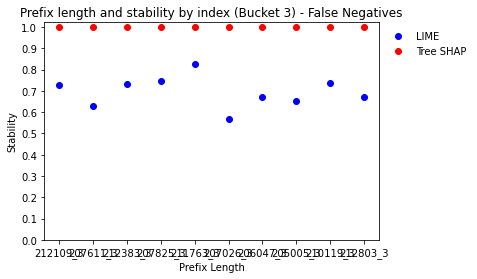

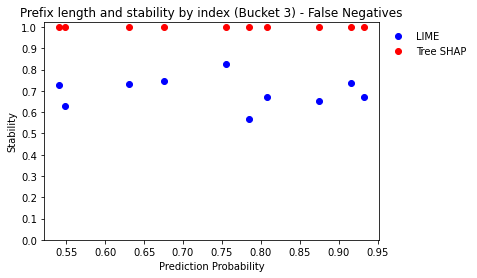

False Positives
Average LIME Stability: 0.7219710144927536
Average SHAP Stability: 1.0


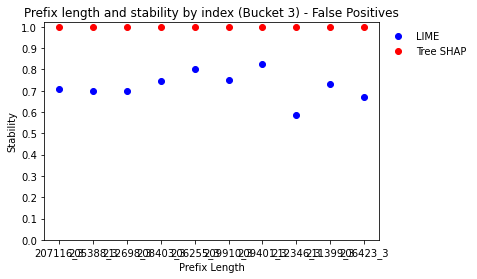

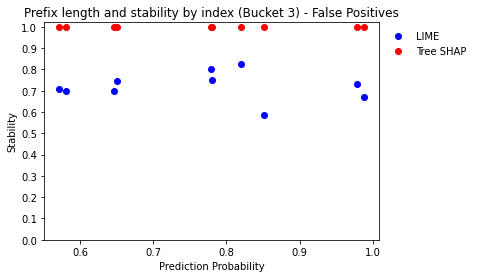

Bucket 4
True Negatives
Average LIME Stability: 0.2628296296296297
Average SHAP Stability: 1.0


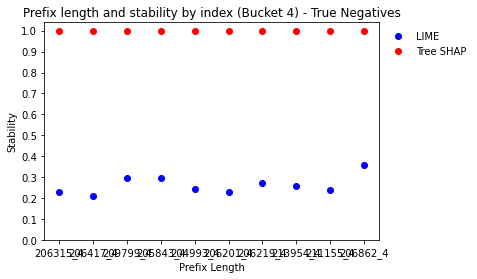

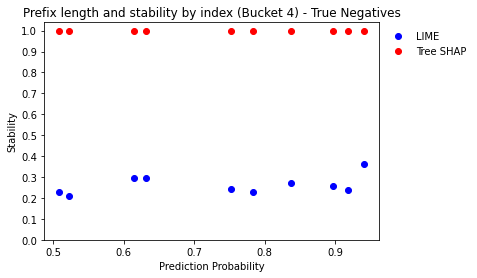

True Positives
Average LIME Stability: 0.25149629629629616
Average SHAP Stability: 1.0


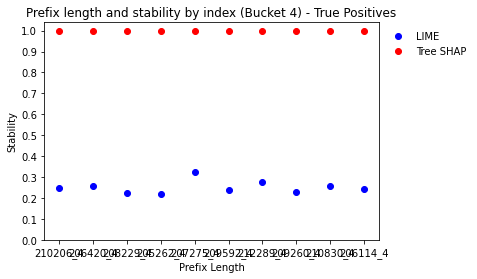

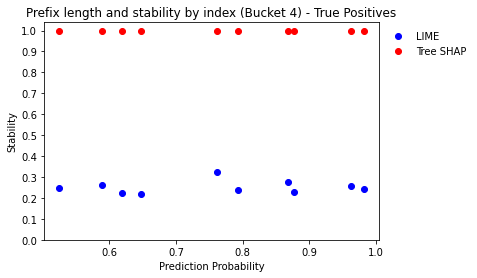

False Negatives
Average LIME Stability: 0.316474074074074
Average SHAP Stability: 1.0


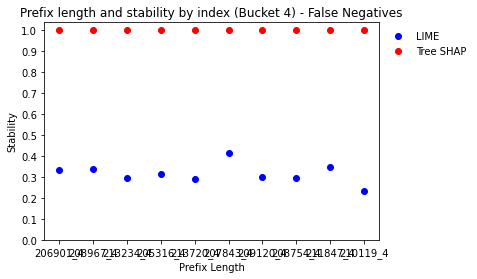

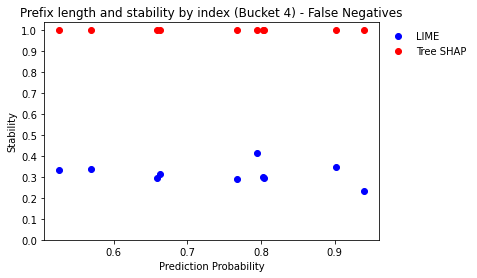

False Positives
Average LIME Stability: 0.30539259259259255
Average SHAP Stability: 1.0


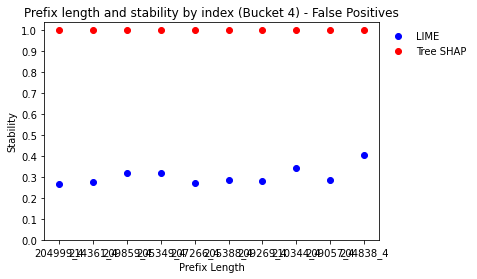

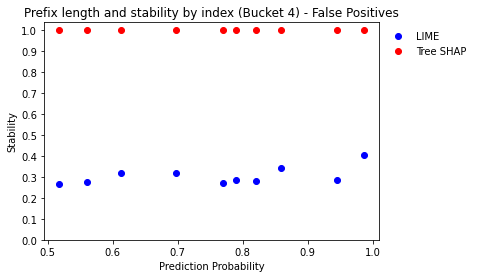

Bucket 5
True Negatives
Average LIME Stability: 0.31800639488409255
Average SHAP Stability: 1.0


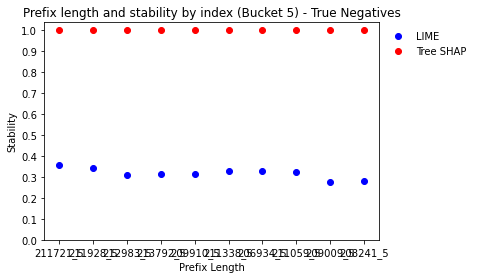

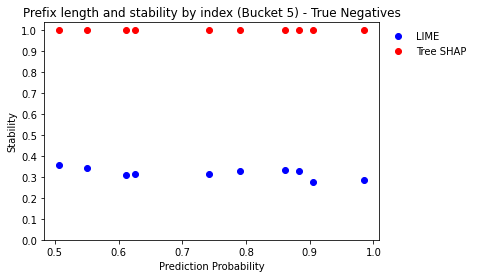

True Positives
Average LIME Stability: 0.3244380495603516
Average SHAP Stability: 1.0


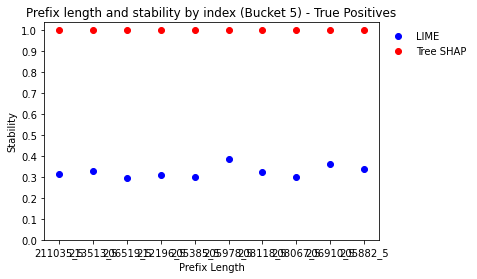

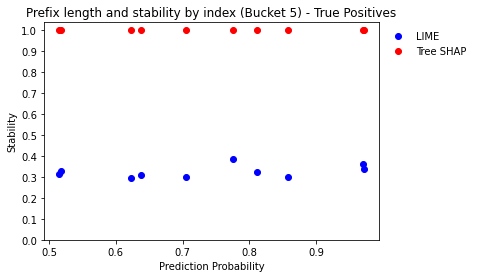

False Negatives
Average LIME Stability: 0.3768441247002397
Average SHAP Stability: 1.0


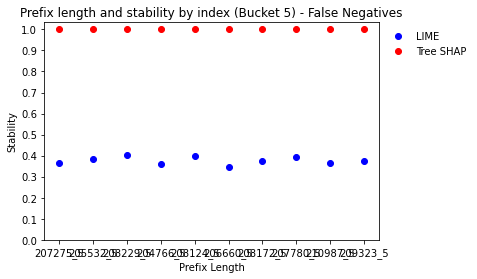

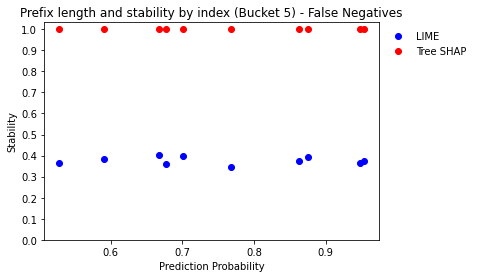

False Positives
Average LIME Stability: 0.3532613908872901
Average SHAP Stability: 1.0


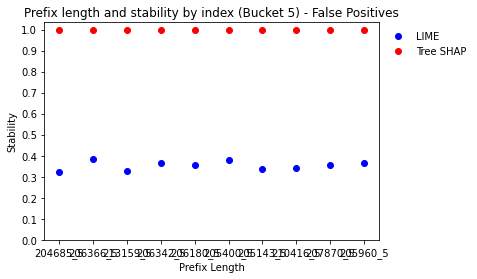

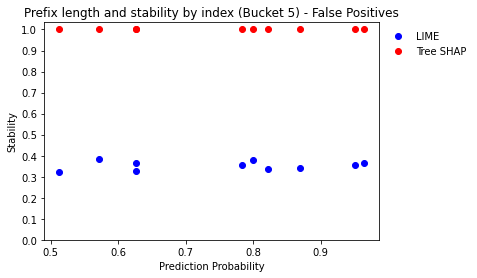

Bucket 6
True Negatives
Average LIME Stability: 0.23036303630363036
Average SHAP Stability: 1.0


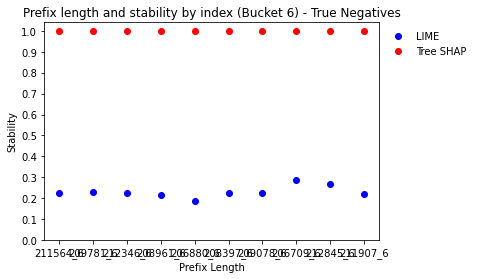

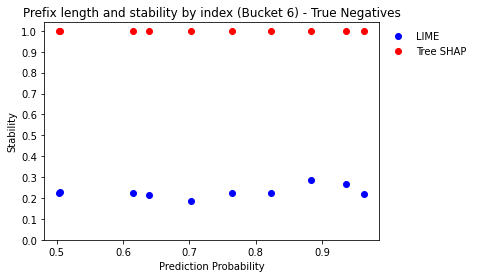

True Positives
Average LIME Stability: 0.22173377337733768
Average SHAP Stability: 1.0


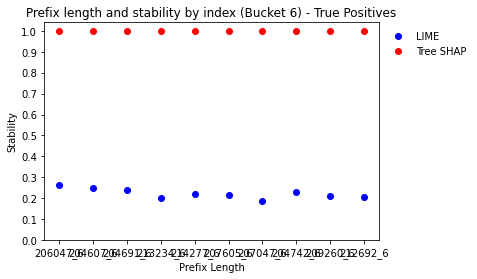

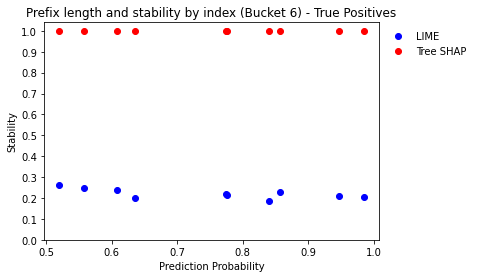

False Negatives
Average LIME Stability: 0.29146754675467546
Average SHAP Stability: 1.0


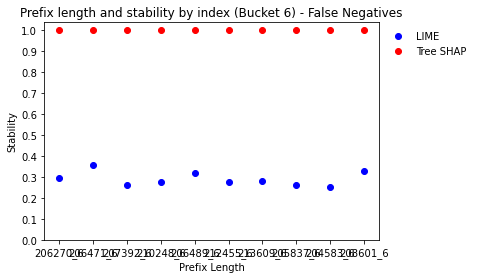

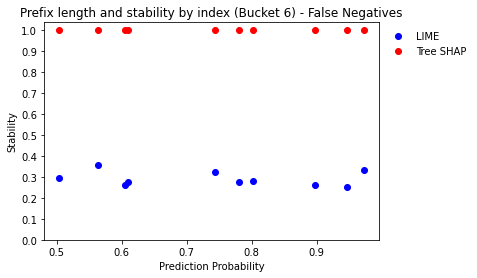

False Positives
Average LIME Stability: 0.2900682068206821
Average SHAP Stability: 1.0


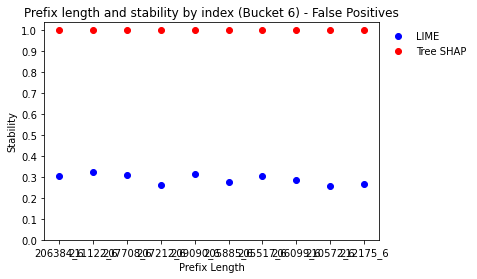

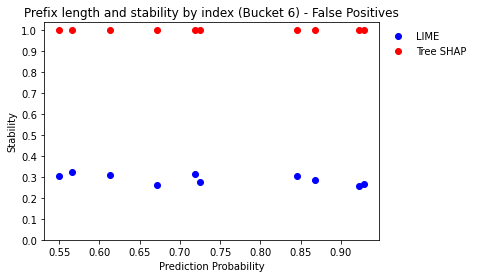

Bucket 7
True Negatives
Average LIME Stability: 0.1715323383084576
Average SHAP Stability: 1.0


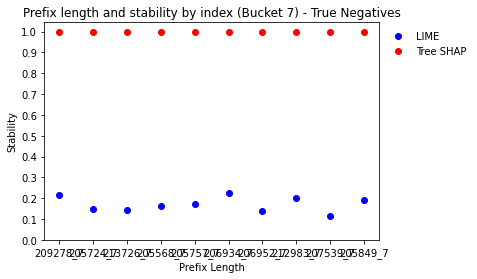

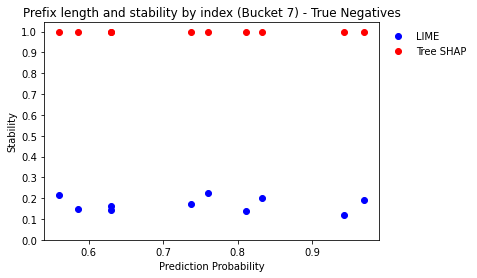

True Positives
Average LIME Stability: 0.1763731343283581
Average SHAP Stability: 1.0


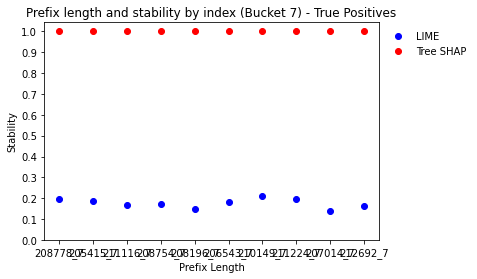

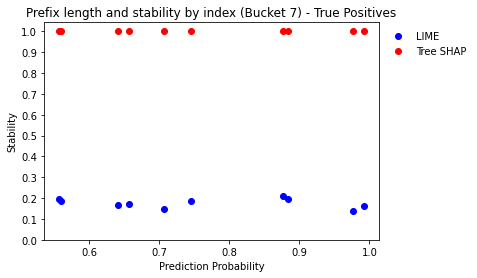

False Negatives
Average LIME Stability: 0.22593366500829182
Average SHAP Stability: 1.0


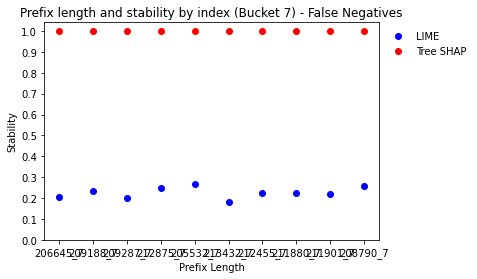

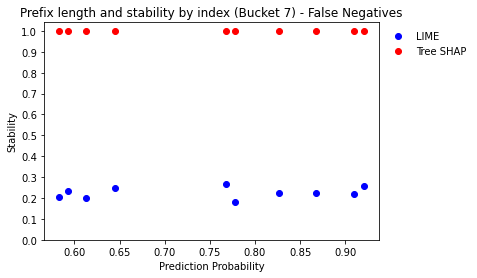

False Positives
Average LIME Stability: 0.22063184079601983
Average SHAP Stability: 1.0


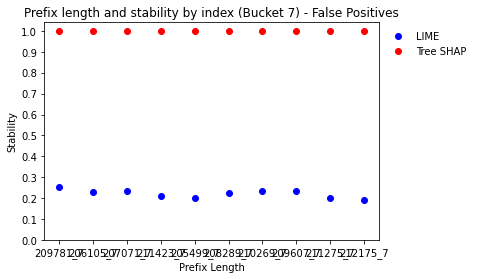

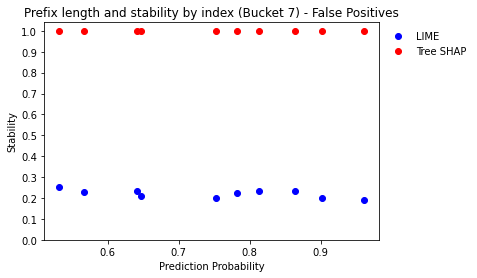

Bucket 8
True Negatives
Average LIME Stability: 0.11959203980099489
Average SHAP Stability: 1.0


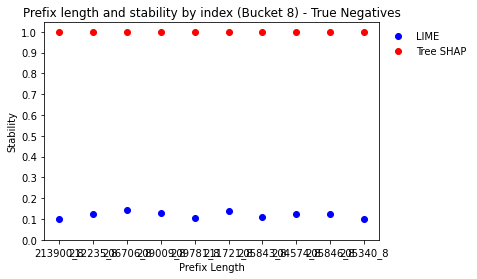

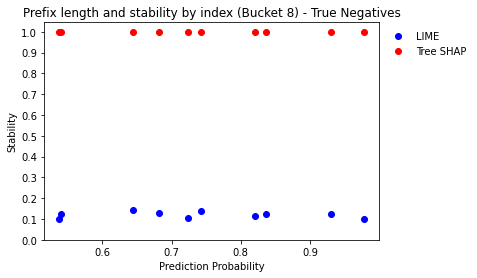

True Positives
Average LIME Stability: 0.1184477611940297
Average SHAP Stability: 1.0


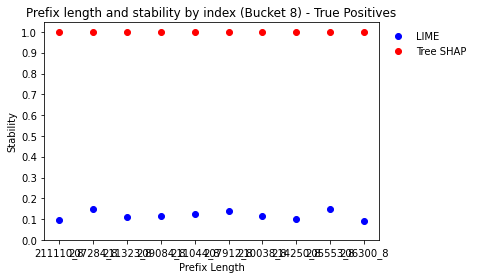

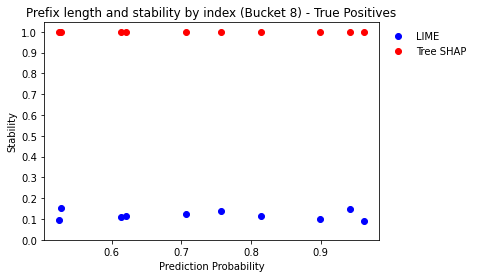

False Negatives
Average LIME Stability: 0.18824875621890536
Average SHAP Stability: 1.0


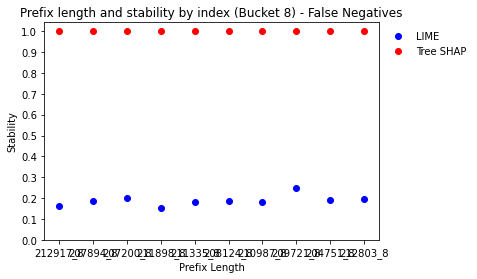

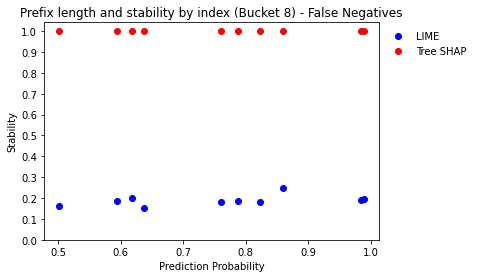

False Positives
Average LIME Stability: 0.19694527363184072
Average SHAP Stability: 1.0


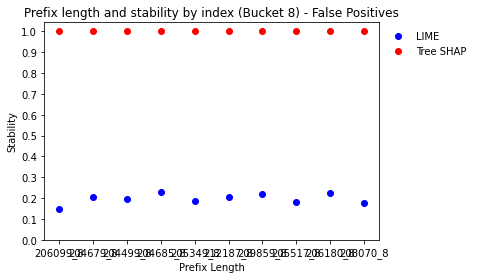

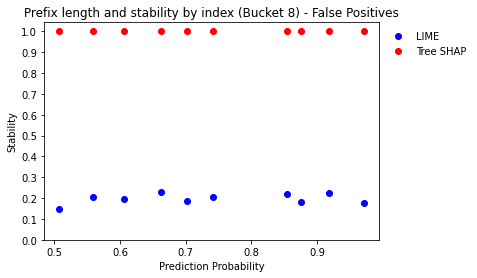

Bucket 9
True Negatives
Average LIME Stability: 0.13700249376558604
Average SHAP Stability: 1.0


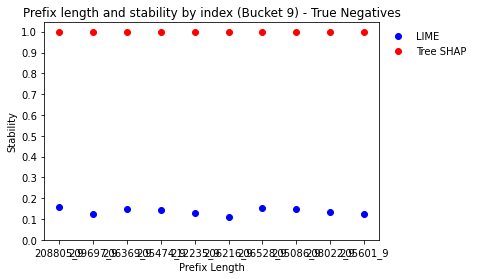

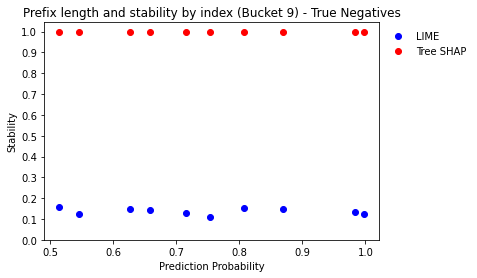

True Positives
Average LIME Stability: 0.15066832917705728
Average SHAP Stability: 1.0


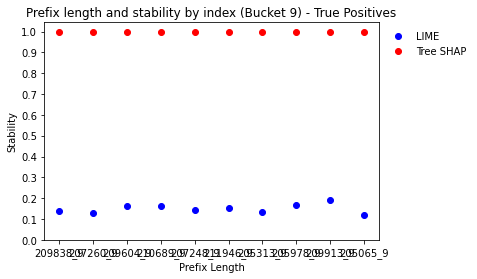

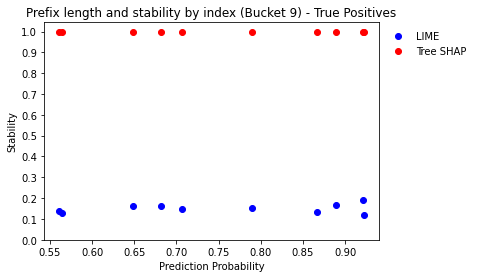

False Negatives
Average LIME Stability: 0.177544472152951
Average SHAP Stability: 1.0


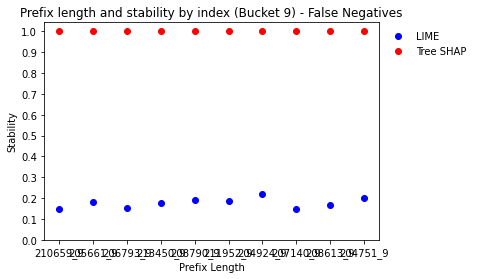

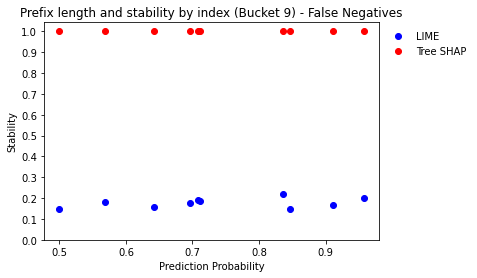

False Positives
Average LIME Stability: 0.18597173732335828
Average SHAP Stability: 1.0


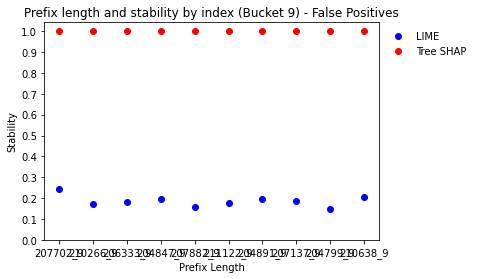

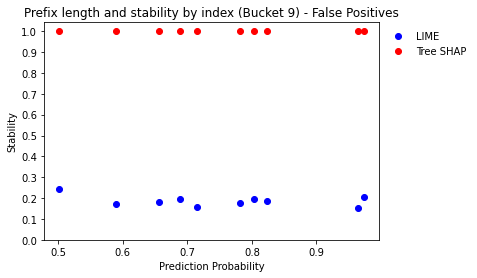

Bucket 10
True Negatives
Average LIME Stability: 0.1007426400759733
Average SHAP Stability: 1.0


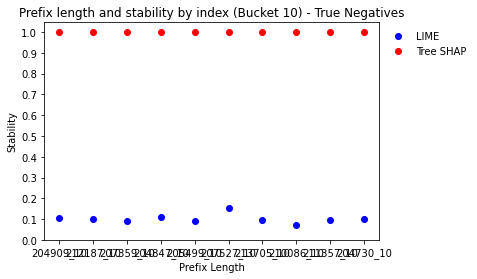

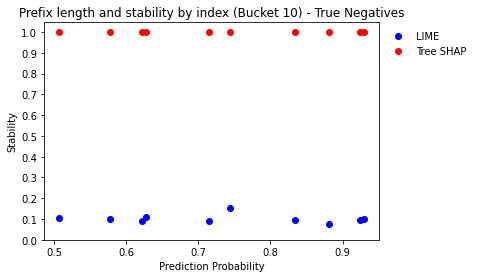

True Positives
Average LIME Stability: 0.10936752136752127
Average SHAP Stability: 1.0


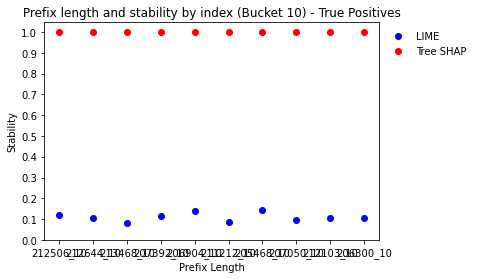

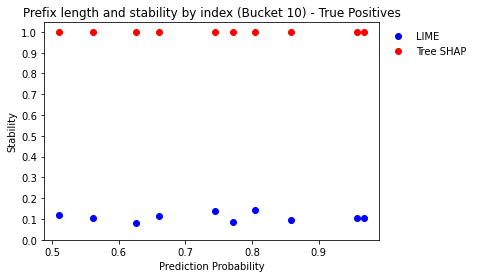

False Negatives
Average LIME Stability: 0.18063627730294388
Average SHAP Stability: 1.0


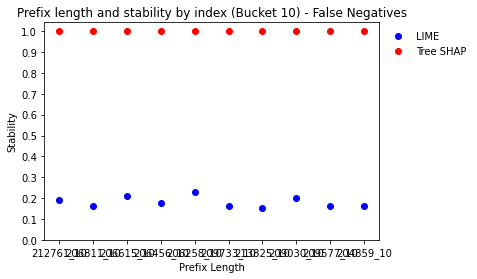

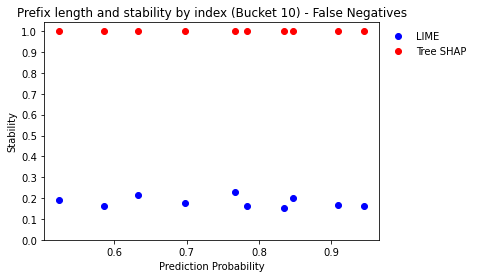

False Positives
Average LIME Stability: 0.16701804368471024
Average SHAP Stability: 1.0


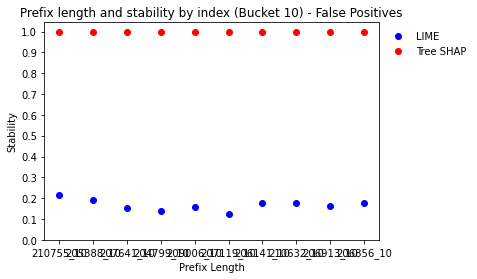

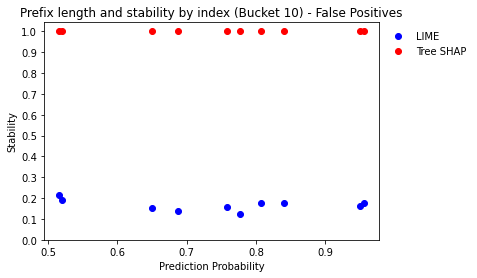

Bucket 11
True Negatives
Average LIME Stability: 0.09834475597092421
Average SHAP Stability: 1.0


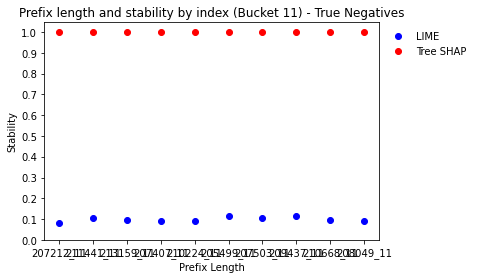

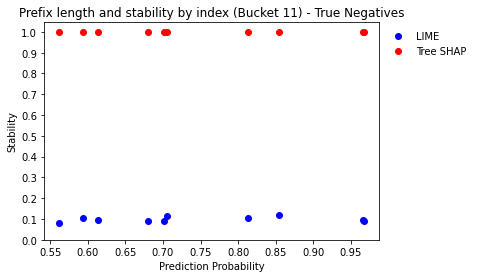

True Positives
Average LIME Stability: 0.10807892004153681
Average SHAP Stability: 1.0


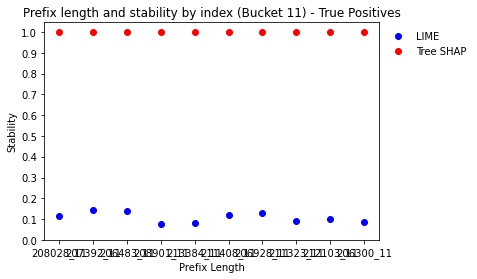

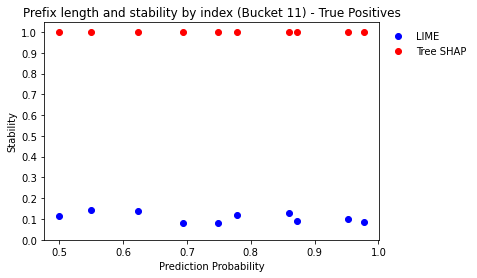

False Negatives
Average LIME Stability: 0.1535804776739356
Average SHAP Stability: 1.0


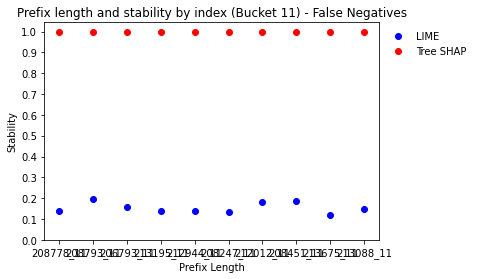

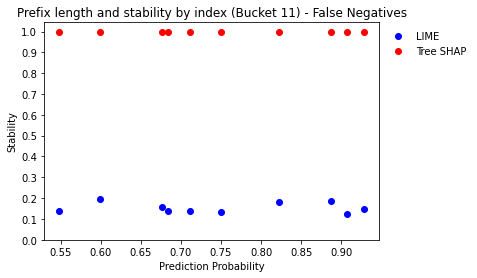

False Positives
Average LIME Stability: 0.1497320872274143
Average SHAP Stability: 1.0


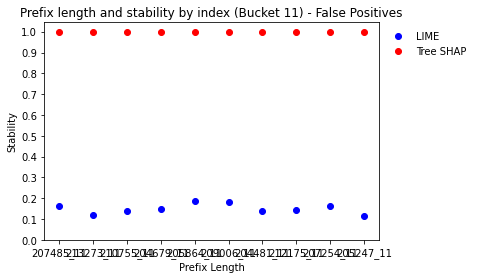

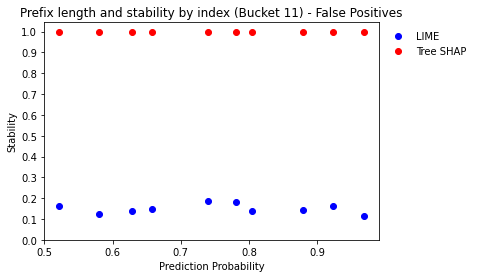

Bucket 12
True Negatives
Average LIME Stability: 0.0921022810890359
Average SHAP Stability: 1.0


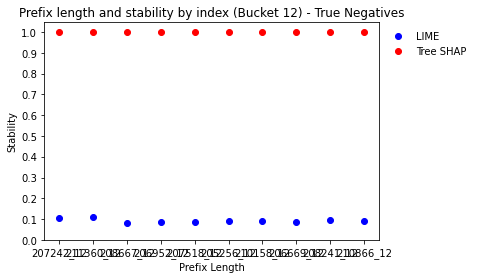

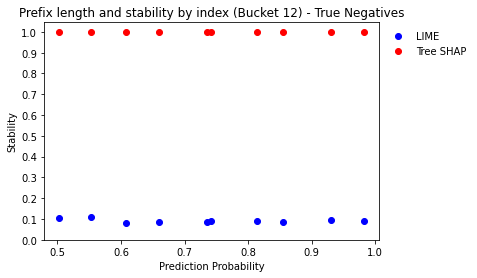

True Positives
Average LIME Stability: 0.08871376011773356
Average SHAP Stability: 1.0


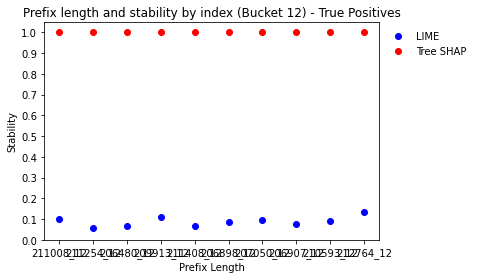

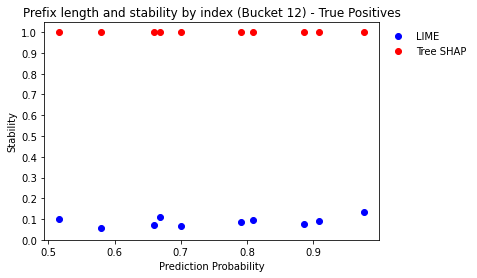

False Negatives
Average LIME Stability: 0.13954157468727005
Average SHAP Stability: 1.0


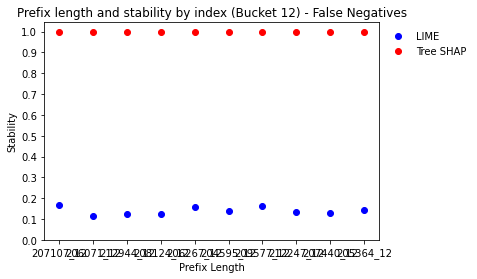

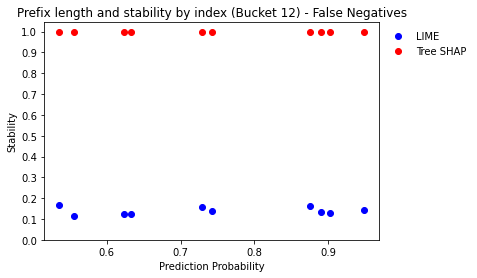

False Positives
Average LIME Stability: 0.15558057395143488
Average SHAP Stability: 1.0


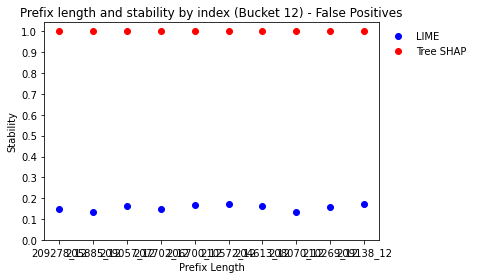

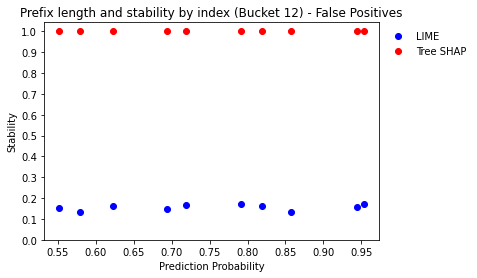

Bucket 13
True Negatives
Average LIME Stability: 0.09533333333333317
Average SHAP Stability: 1.0


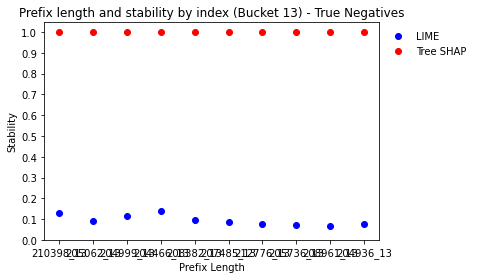

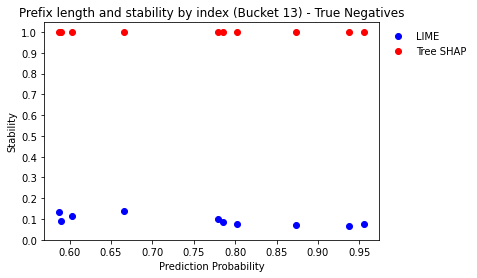

True Positives
Average LIME Stability: 0.09961764705882349
Average SHAP Stability: 1.0


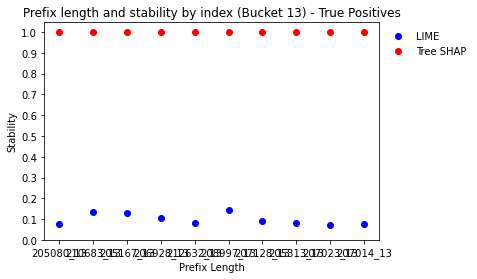

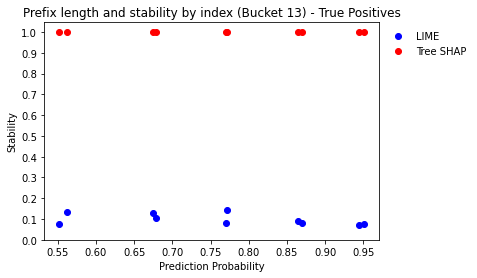

False Negatives
Average LIME Stability: 0.12487254901960777
Average SHAP Stability: 1.0


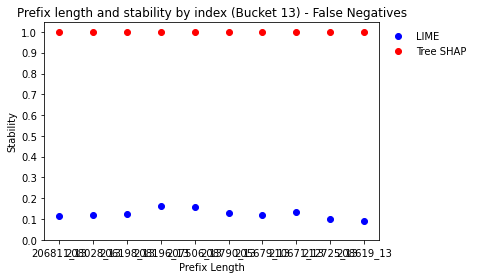

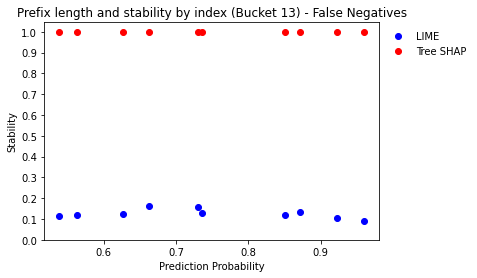

False Positives
Average LIME Stability: 0.12442156862745088
Average SHAP Stability: 1.0


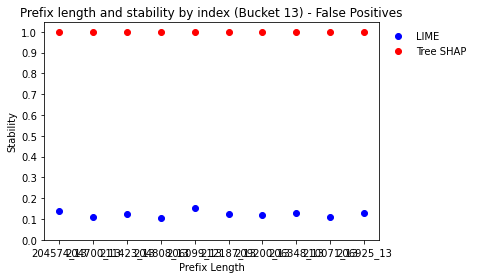

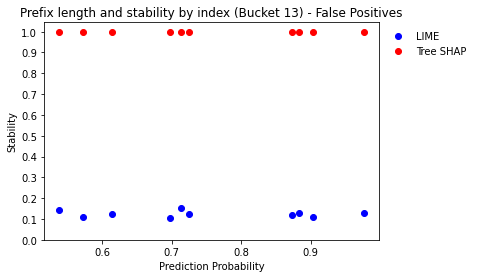

Bucket 14
True Negatives
Average LIME Stability: 0.16042982456140337
Average SHAP Stability: 1.0


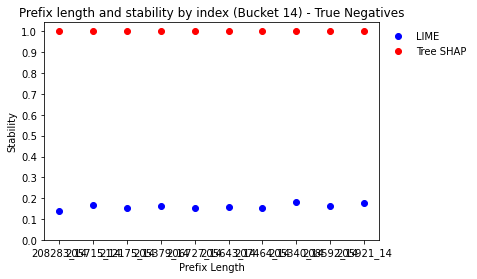

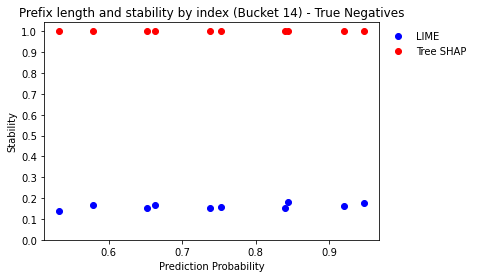

True Positives
Average LIME Stability: 0.16223099415204661
Average SHAP Stability: 1.0


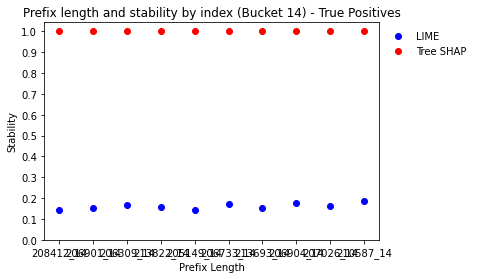

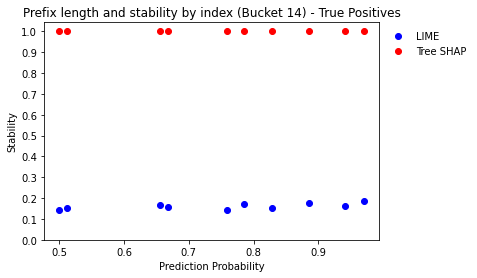

False Negatives
Average LIME Stability: 0.11607602339181274
Average SHAP Stability: 1.0


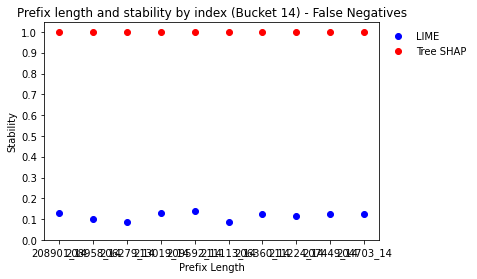

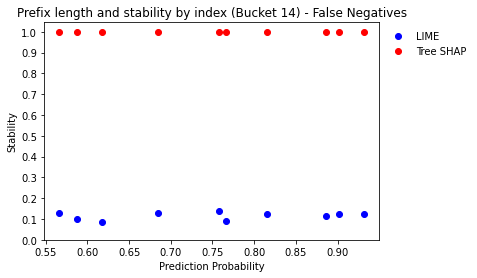

False Positives
Average LIME Stability: 0.12598245614035075
Average SHAP Stability: 1.0


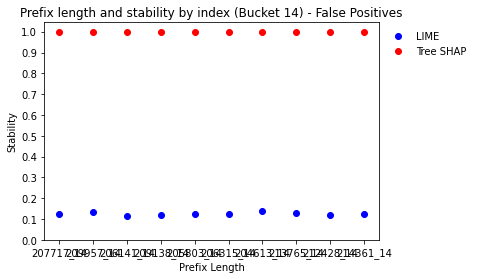

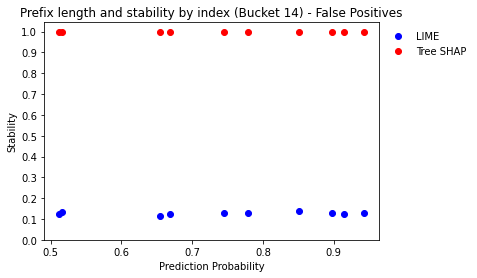

Bucket 15
True Negatives
Average LIME Stability: 0.14617724867724852
Average SHAP Stability: 1.0


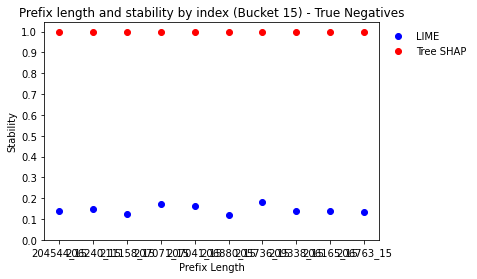

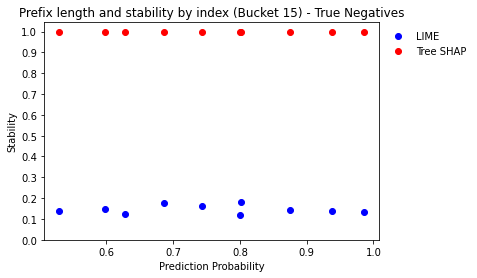

True Positives
Average LIME Stability: 0.1513492063492062
Average SHAP Stability: 1.0


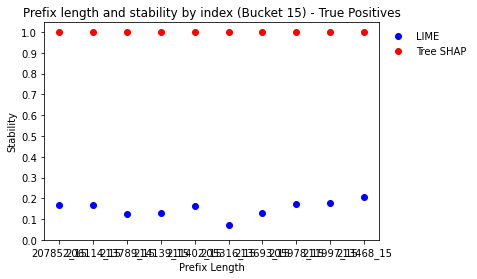

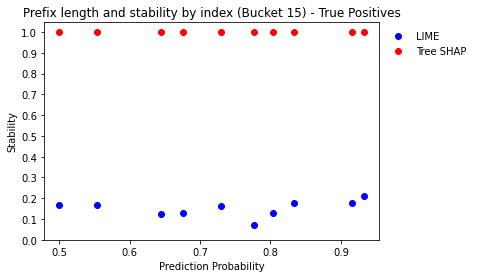

False Negatives
Average LIME Stability: 0.10907407407407393
Average SHAP Stability: 1.0


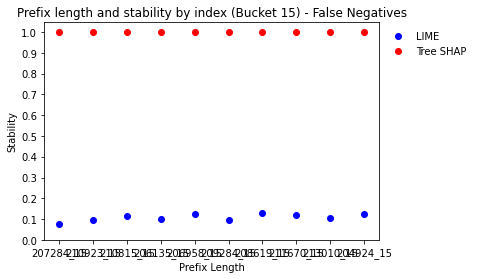

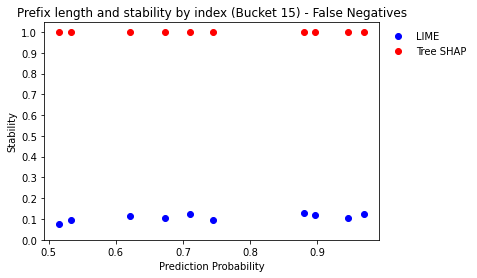

False Positives
Average LIME Stability: 0.10929894179894169
Average SHAP Stability: 1.0


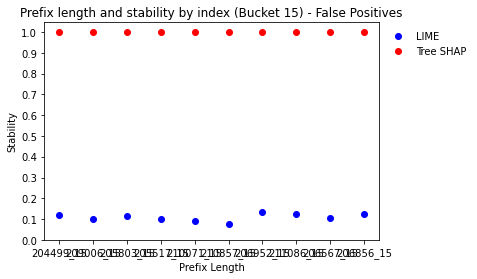

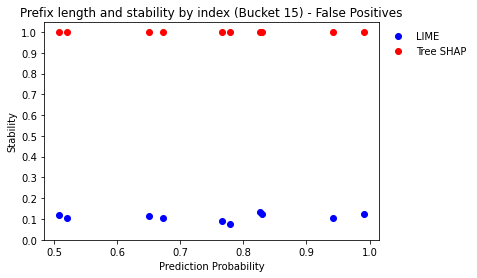

Bucket 16
True Negatives
Average LIME Stability: 0.18858968772694254
Average SHAP Stability: 1.0


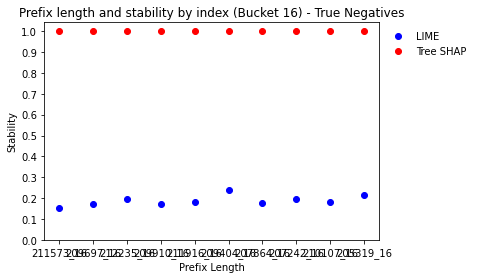

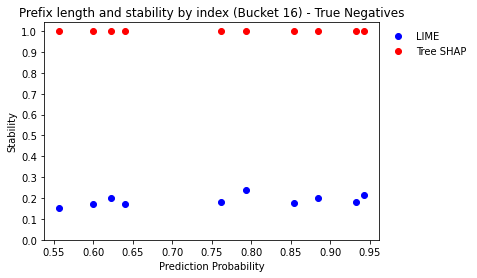

True Positives
Average LIME Stability: 0.17982861292665203
Average SHAP Stability: 1.0


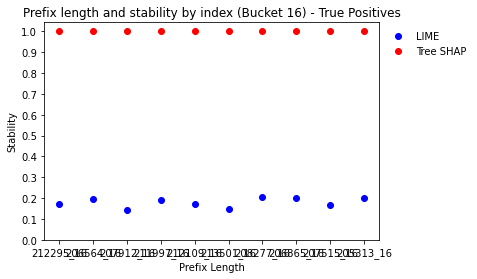

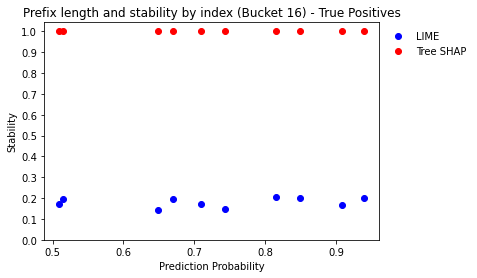

False Negatives
Average LIME Stability: 0.16387896393125145
Average SHAP Stability: 1.0


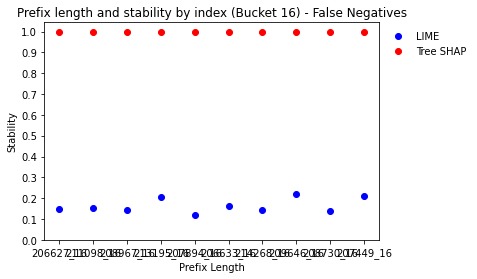

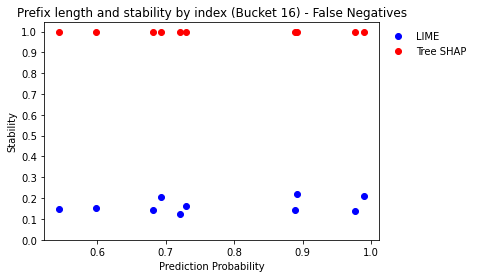

False Positives
Average LIME Stability: 0.16432824981844582
Average SHAP Stability: 1.0


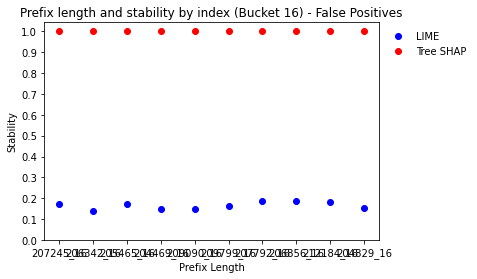

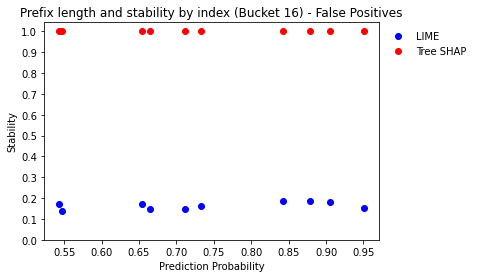

Bucket 17
True Negatives
Average LIME Stability: 0.1529045226130652
Average SHAP Stability: 1.0


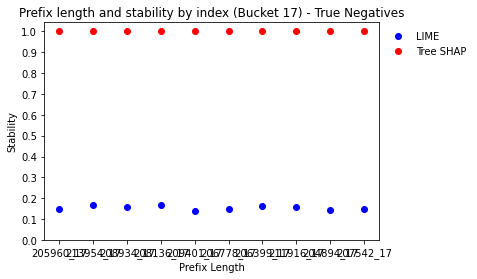

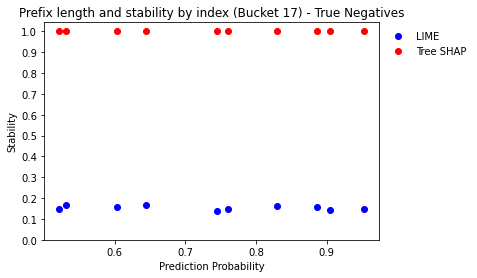

True Positives
Average LIME Stability: 0.1477420435510886
Average SHAP Stability: 1.0


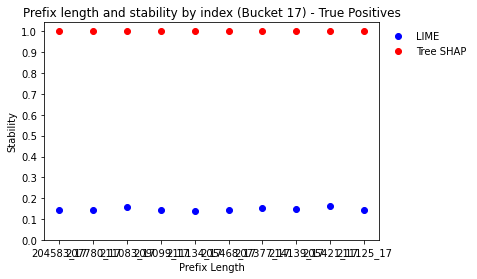

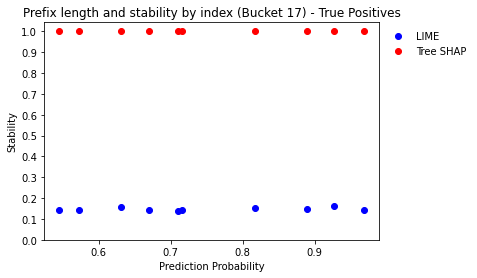

False Negatives
Average LIME Stability: 0.09544388609715226
Average SHAP Stability: 1.0


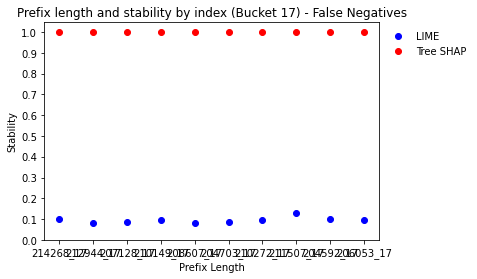

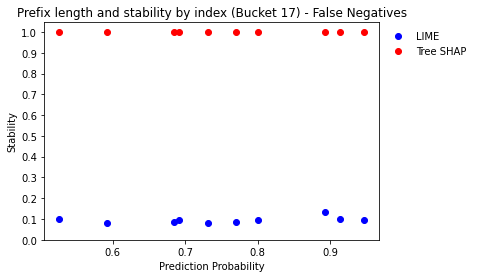

False Positives
Average LIME Stability: 0.1048710217755442
Average SHAP Stability: 1.0


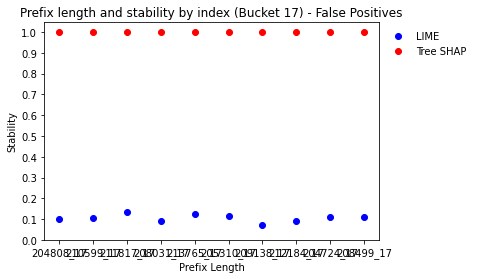

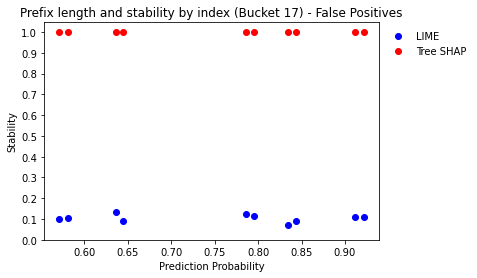

Bucket 18
True Negatives
Average LIME Stability: 0.24059492239695734
Average SHAP Stability: 1.0


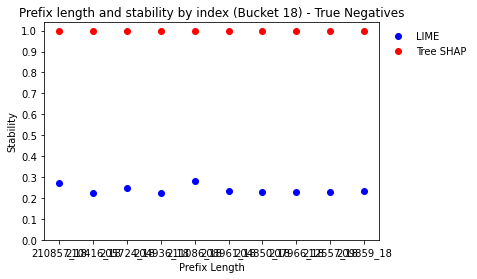

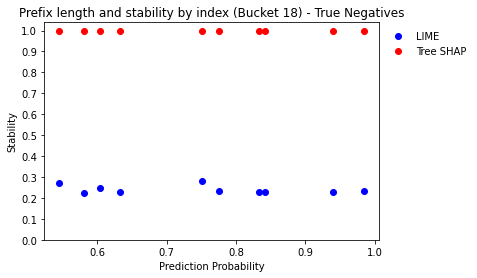

True Positives
Average LIME Stability: 0.25562154383800983
Average SHAP Stability: 1.0


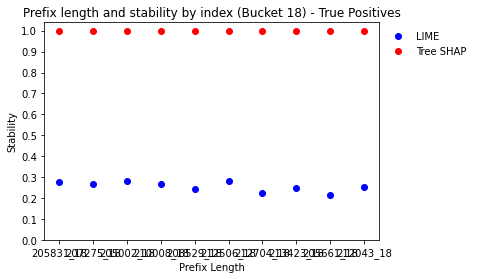

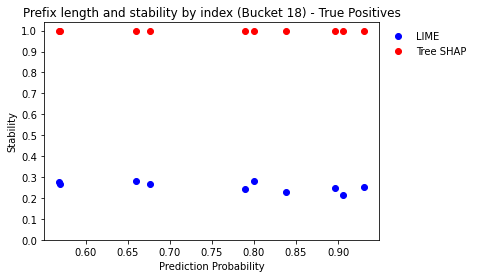

False Negatives
Average LIME Stability: 0.18160982629252725
Average SHAP Stability: 1.0


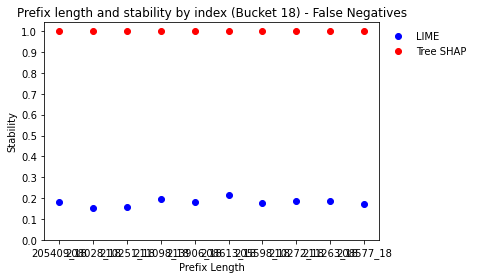

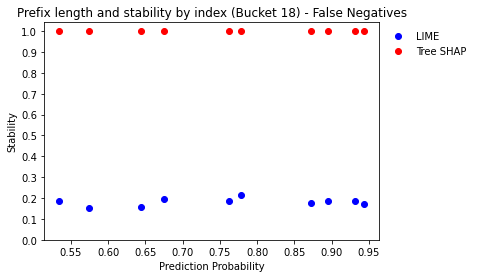

False Positives
Average LIME Stability: 0.16837742830712277
Average SHAP Stability: 1.0


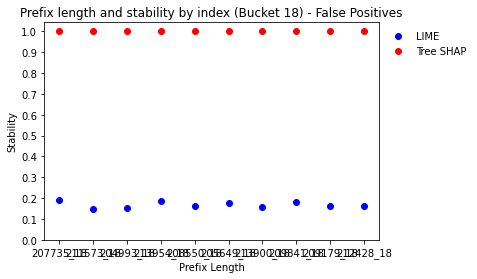

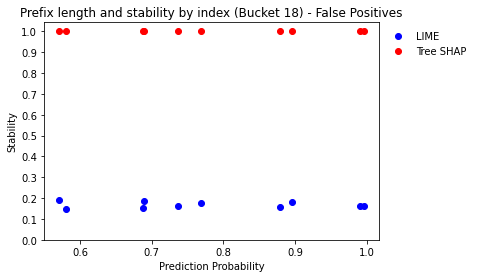

Bucket 19
True Negatives
Average LIME Stability: 0.17453630646083468
Average SHAP Stability: 1.0


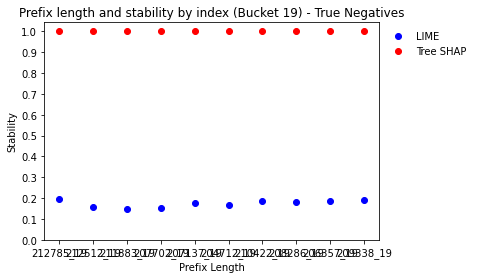

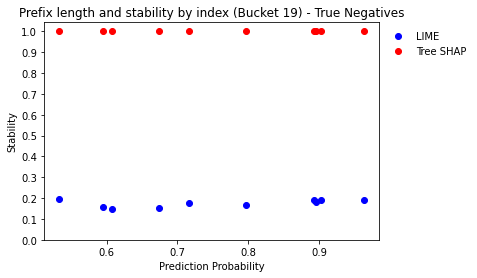

True Positives
Average LIME Stability: 0.18865637507146932
Average SHAP Stability: 1.0


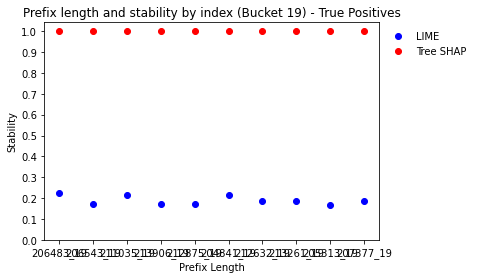

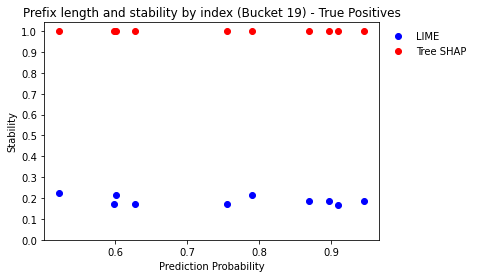

False Negatives
Average LIME Stability: 0.16332990280160087
Average SHAP Stability: 1.0


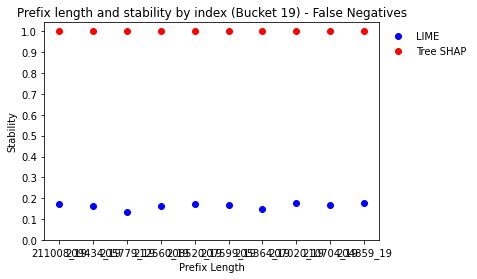

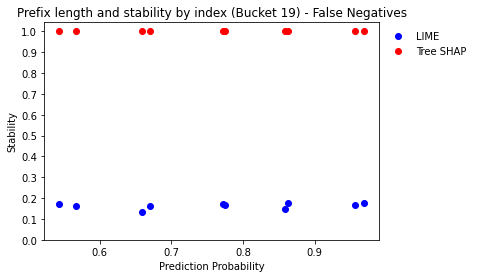

False Positives
Average LIME Stability: 0.1722950257289879
Average SHAP Stability: 1.0


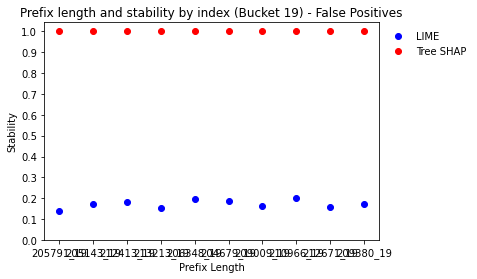

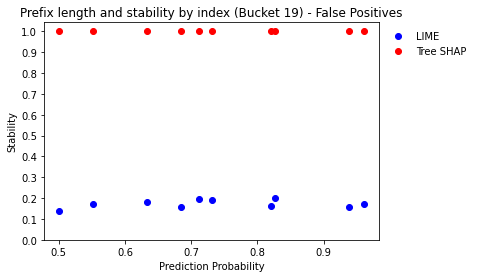

Bucket 20
True Negatives
Average LIME Stability: 0.3271039999999999
Average SHAP Stability: 1.0


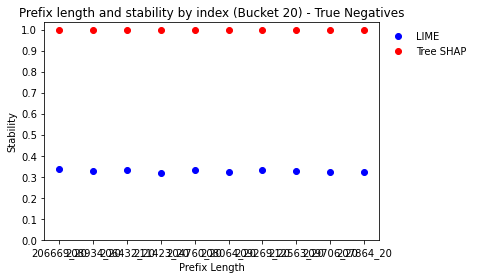

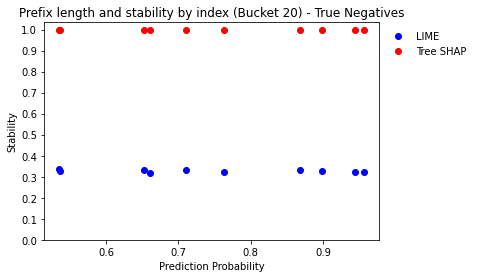

True Positives
Average LIME Stability: 0.3223999999999999
Average SHAP Stability: 1.0


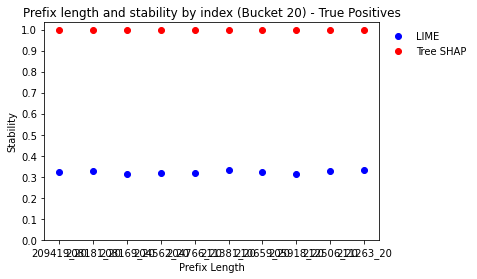

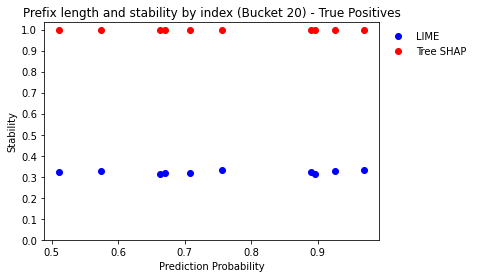

False Negatives
Average LIME Stability: 0.1445439999999999
Average SHAP Stability: 1.0


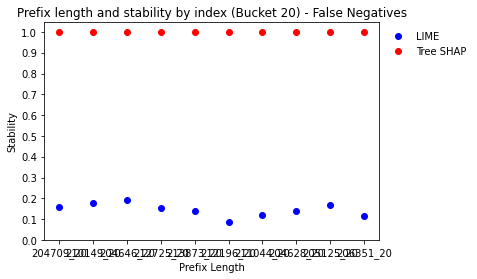

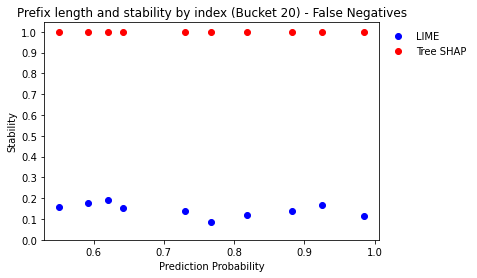

False Positives
Average LIME Stability: 0.1561919999999998
Average SHAP Stability: 1.0


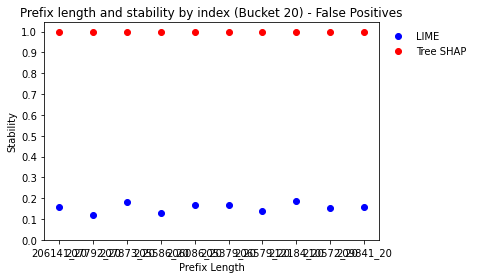

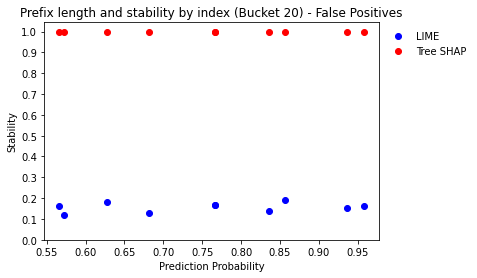

Bucket 21
True Negatives
Average LIME Stability: 0.26945327336331826
Average SHAP Stability: 1.0


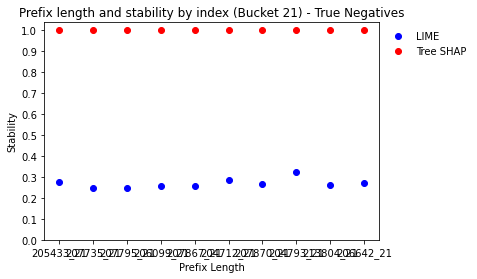

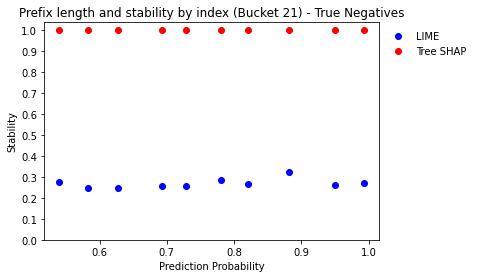

True Positives
Average LIME Stability: 0.26497551224387794
Average SHAP Stability: 1.0


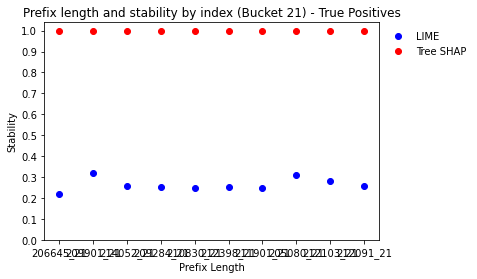

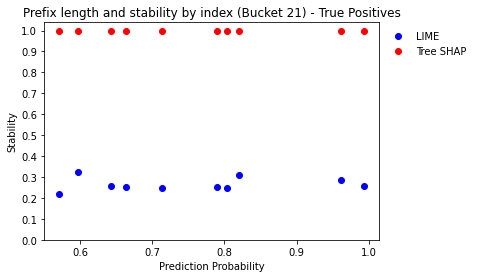

False Negatives
Average LIME Stability: 0.08385007496251862
Average SHAP Stability: 1.0


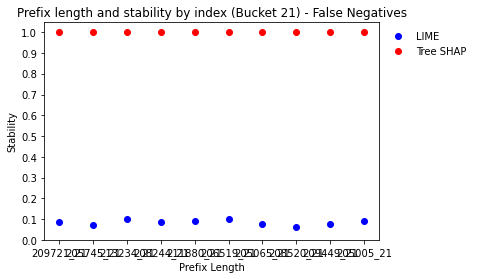

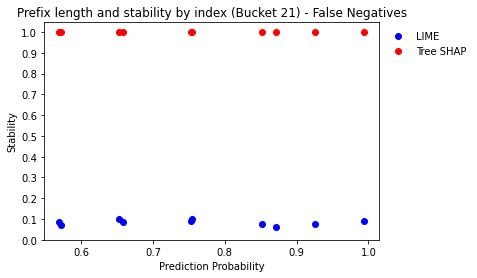

False Positives
Average LIME Stability: 0.08765617191404287
Average SHAP Stability: 1.0


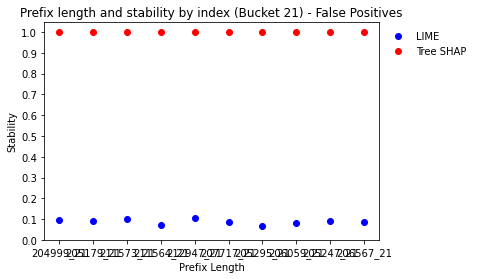

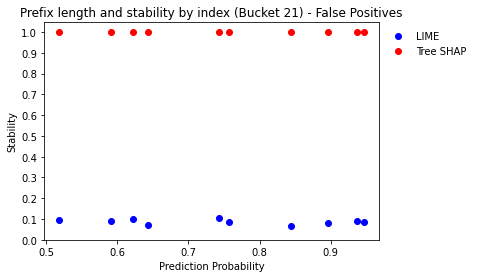

Bucket 22
True Negatives
Average LIME Stability: 0.3127529908515129
Average SHAP Stability: 1.0


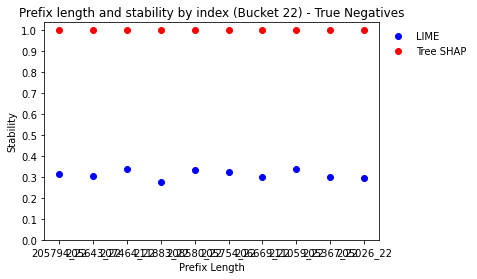

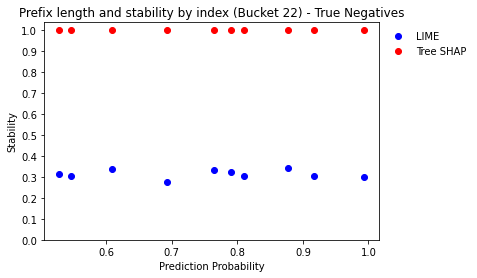

True Positives
Average LIME Stability: 0.3125292047853623
Average SHAP Stability: 1.0


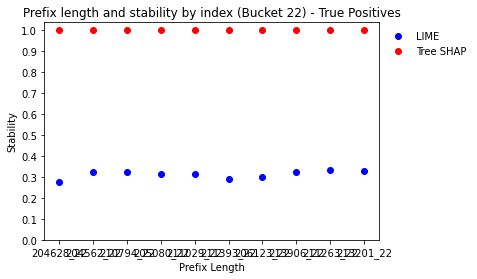

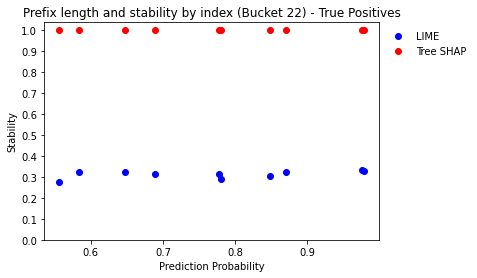

False Negatives
Average LIME Stability: 0.10038001407459521
Average SHAP Stability: 1.0


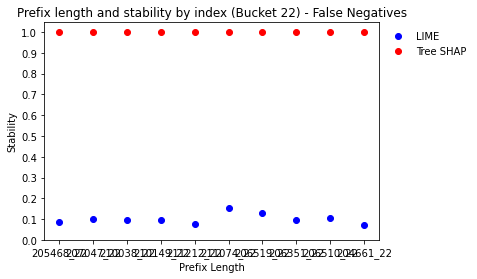

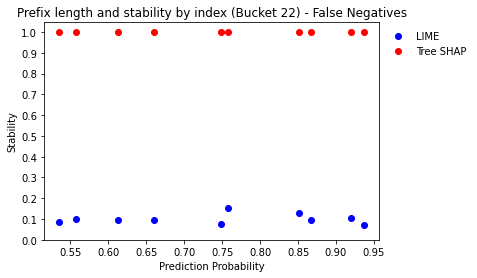

False Positives
Average LIME Stability: 0.09456157635467963
Average SHAP Stability: 1.0


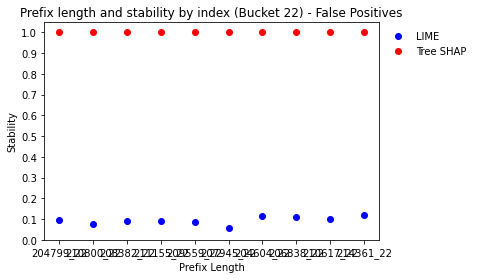

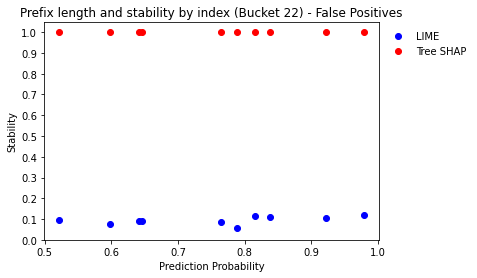

Bucket 23
True Negatives
Average LIME Stability: 0.26244236760124606
Average SHAP Stability: 1.0


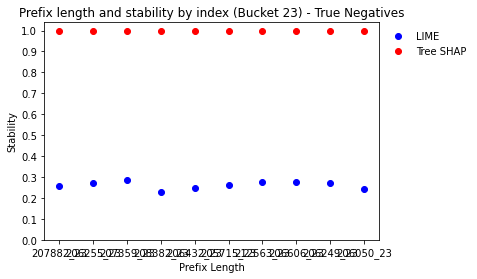

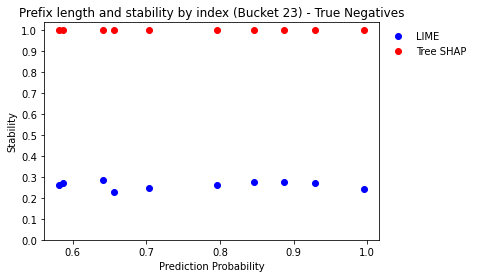

True Positives
Average LIME Stability: 0.2642320130544429
Average SHAP Stability: 1.0


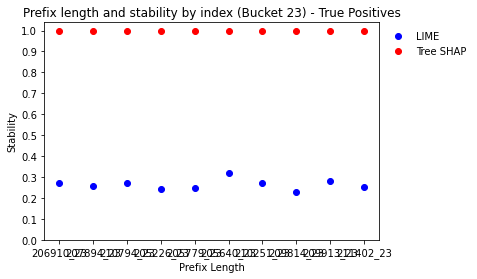

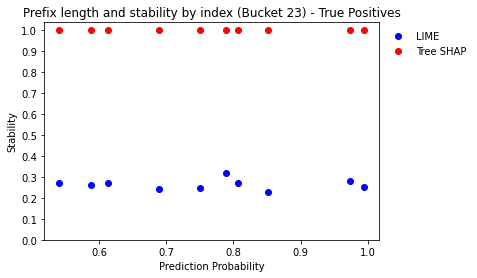

False Negatives
Average LIME Stability: 0.07475330069722583
Average SHAP Stability: 1.0


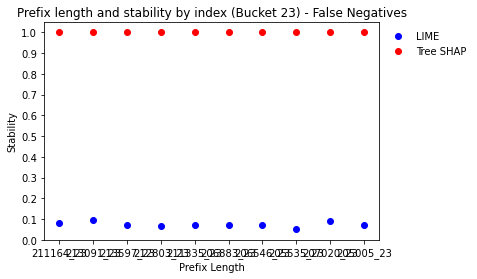

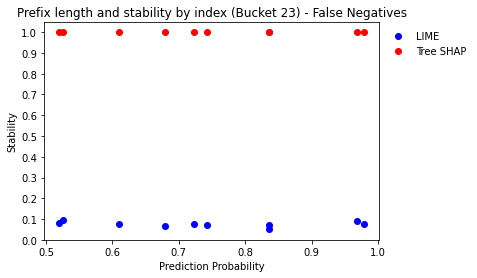

False Positives
Average LIME Stability: 0.08235929387331246
Average SHAP Stability: 1.0


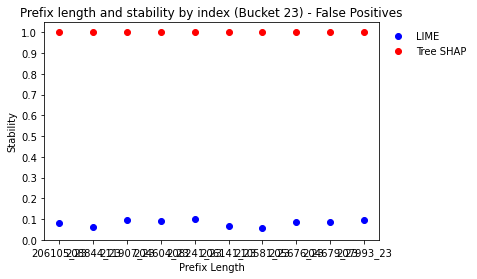

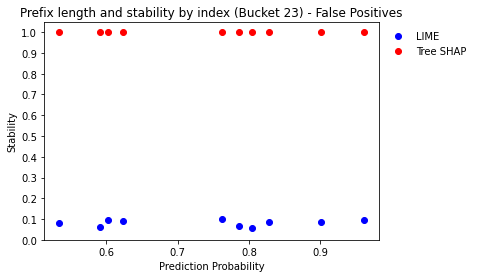

Bucket 24
True Negatives
Average LIME Stability: 0.3626146299850713
Average SHAP Stability: 1.0


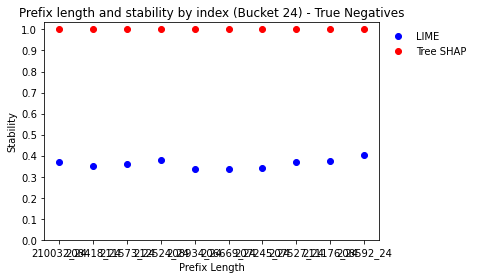

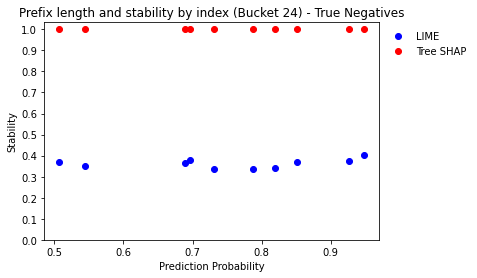

True Positives
Average LIME Stability: 0.3494196346058149
Average SHAP Stability: 1.0


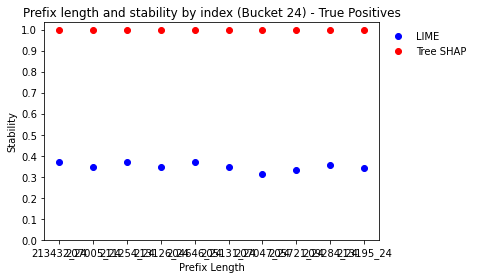

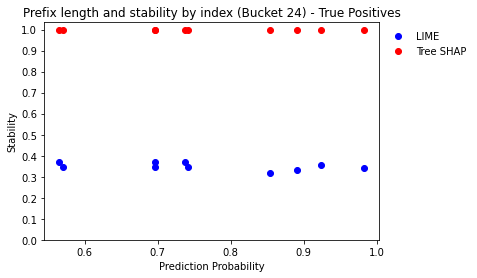

False Negatives
Average LIME Stability: 0.10788412596857878
Average SHAP Stability: 1.0


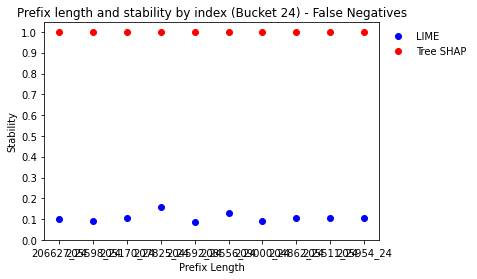

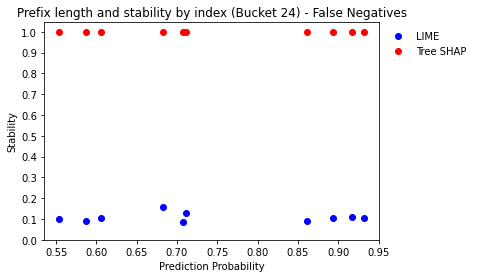

False Positives
Average LIME Stability: 0.11794810549513031
Average SHAP Stability: 1.0


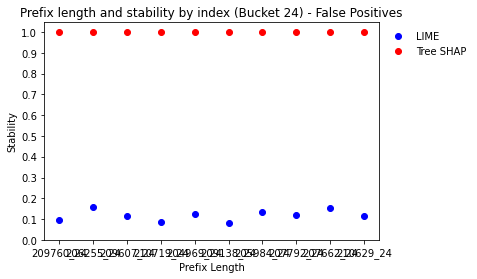

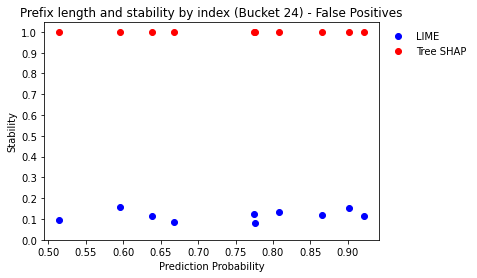

Bucket 25
True Negatives
Average LIME Stability: 0.1363338740200053
Average SHAP Stability: 1.0


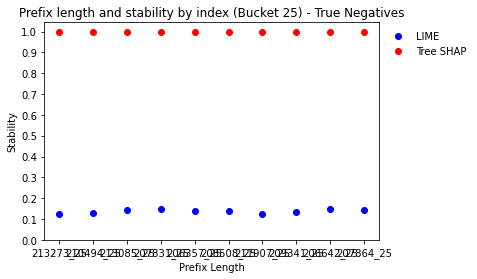

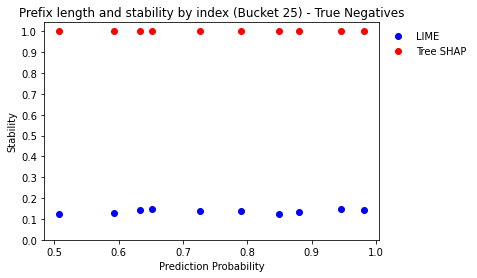

True Positives
Average LIME Stability: 0.1446061097593943
Average SHAP Stability: 1.0


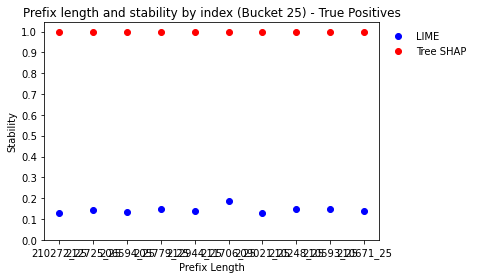

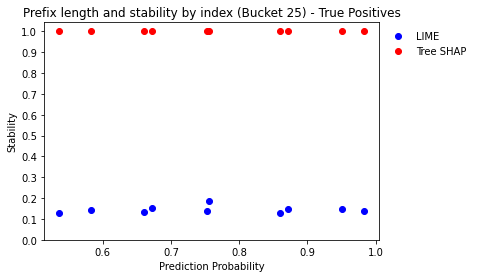

False Negatives
Average LIME Stability: 0.0849118680724519
Average SHAP Stability: 1.0


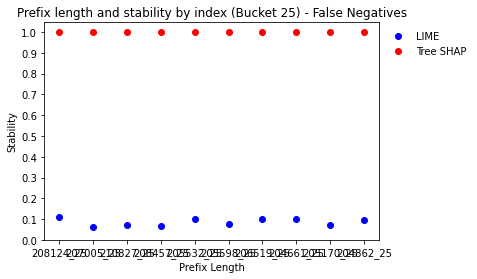

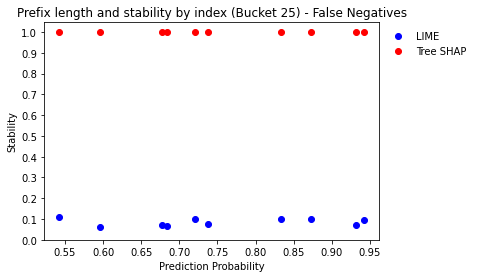

False Positives
Average LIME Stability: 0.08848905109489039
Average SHAP Stability: 1.0


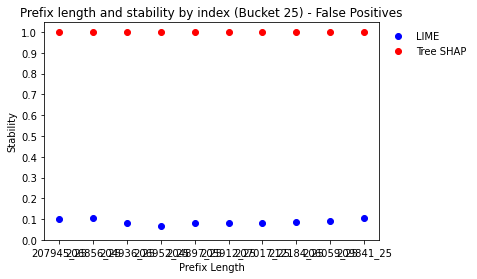

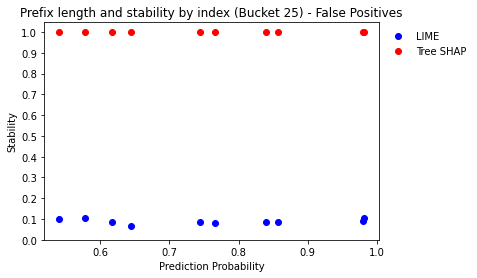

Bucket 26
True Negatives
Average LIME Stability: 0.22822608024691346
Average SHAP Stability: 1.0


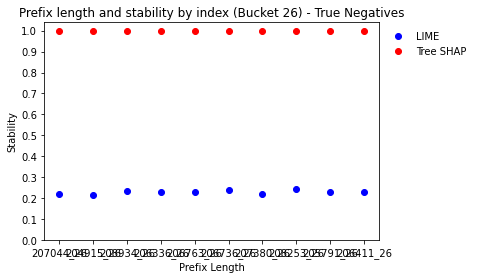

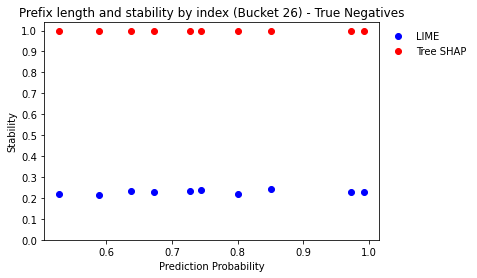

True Positives
Average LIME Stability: 0.22375591563786001
Average SHAP Stability: 1.0


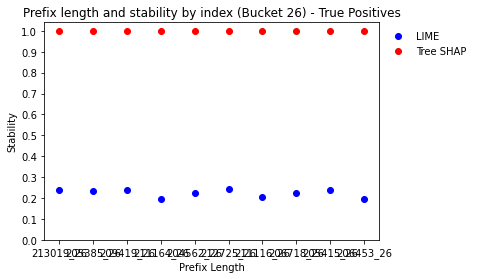

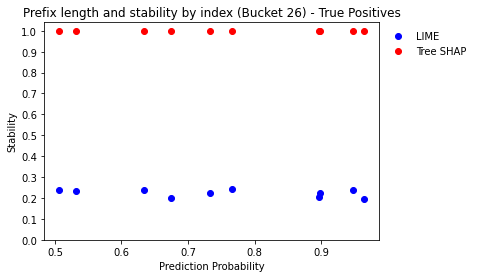

False Negatives
Average LIME Stability: 0.14575154320987646
Average SHAP Stability: 1.0


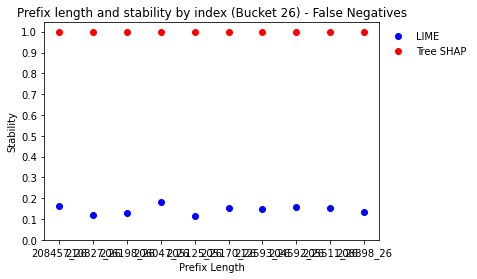

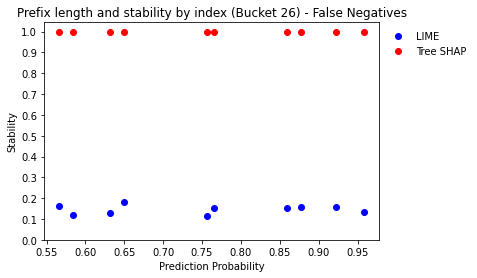

False Positives
Average LIME Stability: 0.14888065843621393
Average SHAP Stability: 1.0


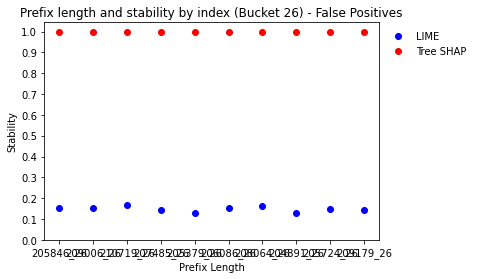

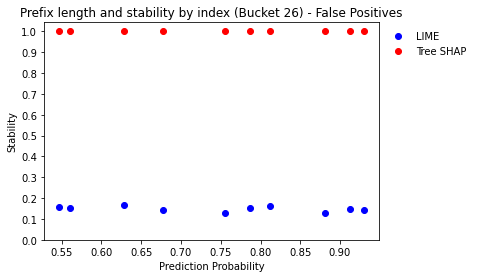

Bucket 27
True Negatives
Average LIME Stability: 0.20474397202282343
Average SHAP Stability: 1.0


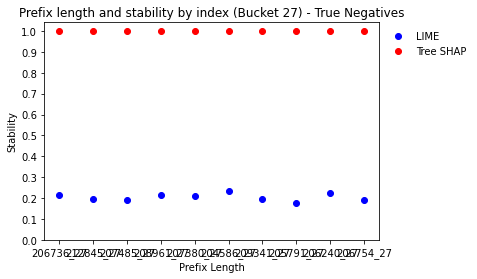

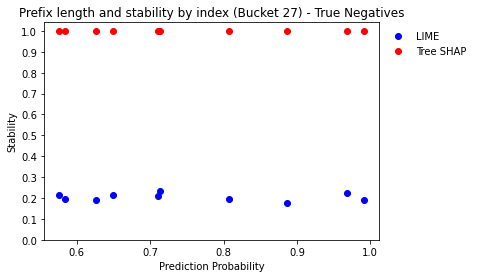

True Positives
Average LIME Stability: 0.20541431989692616
Average SHAP Stability: 1.0


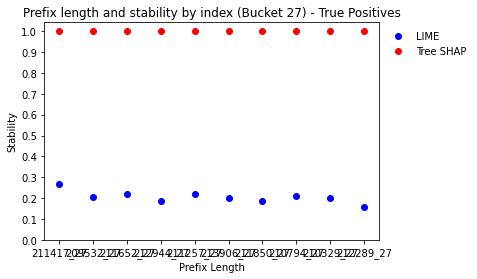

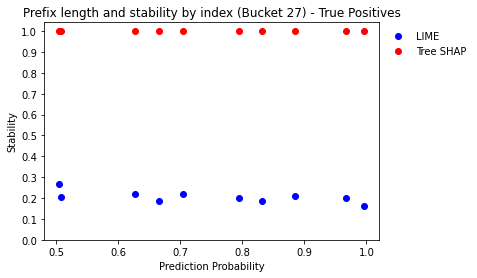

False Negatives
Average LIME Stability: 0.09078483342536345
Average SHAP Stability: 1.0


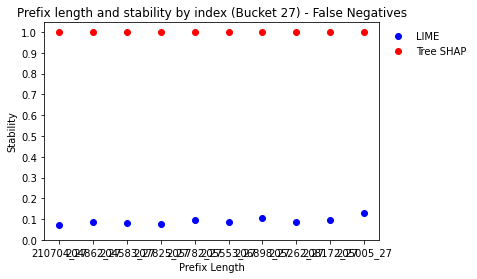

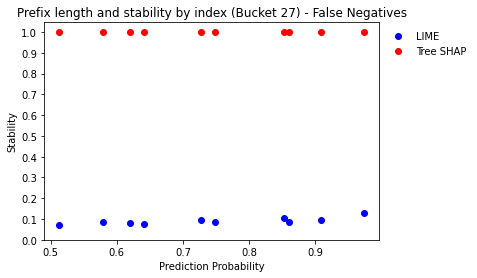

False Positives
Average LIME Stability: 0.08653929688937964
Average SHAP Stability: 1.0


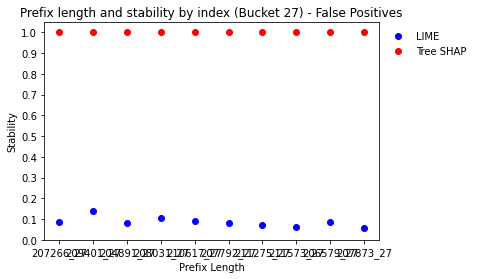

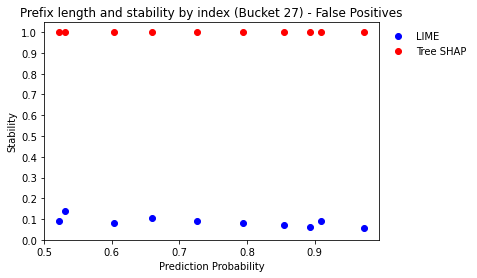

Bucket 28
True Negatives
Average LIME Stability: 0.16337914023960529
Average SHAP Stability: 1.0


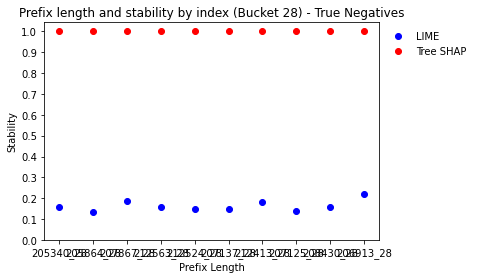

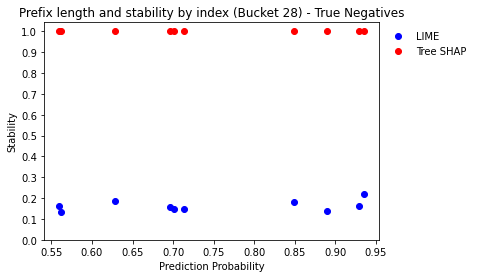

True Positives
Average LIME Stability: 0.19286751233262858
Average SHAP Stability: 1.0


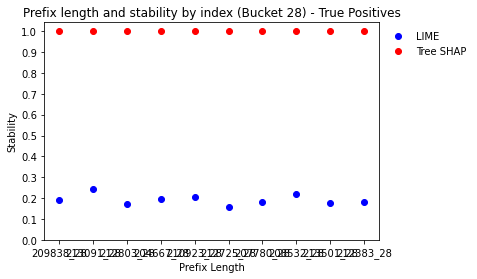

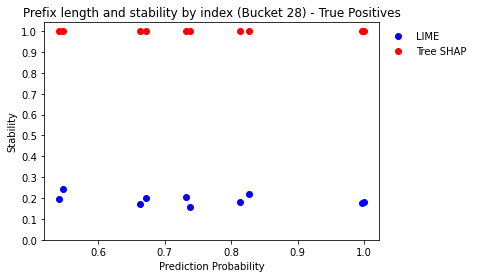

False Negatives
Average LIME Stability: 0.0836264975334742
Average SHAP Stability: 1.0


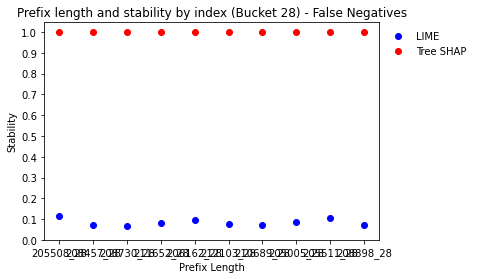

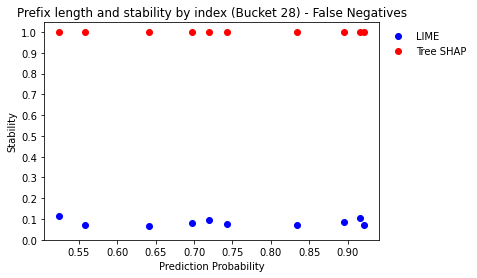

False Positives
Average LIME Stability: 0.09457293868921773
Average SHAP Stability: 1.0


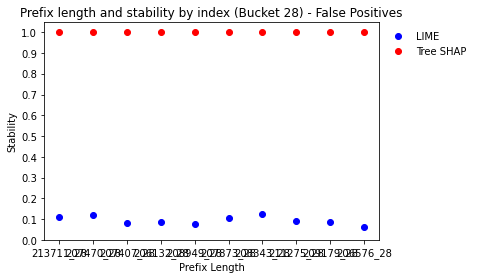

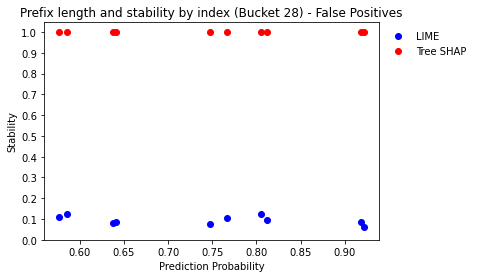

Bucket 29
True Negatives
Average LIME Stability: 0.15417908430478094
Average SHAP Stability: 1.0


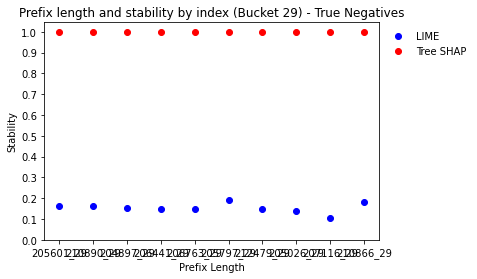

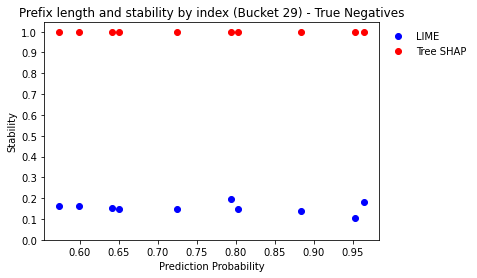

True Positives
Average LIME Stability: 0.16400642000337867
Average SHAP Stability: 1.0


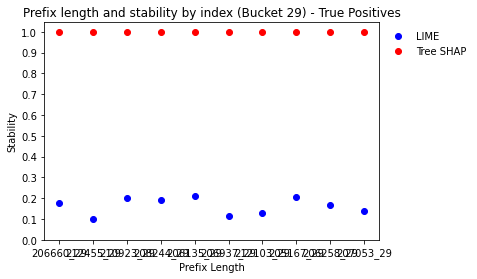

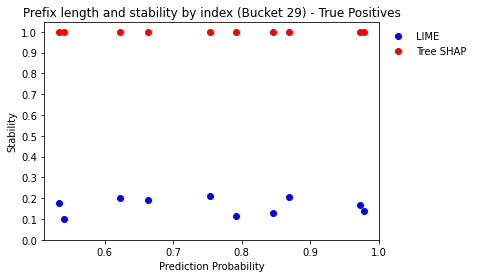

False Negatives
Average LIME Stability: 0.06707315424902834
Average SHAP Stability: 1.0


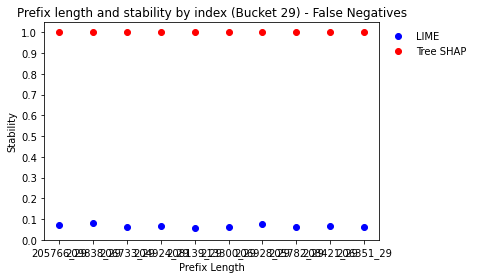

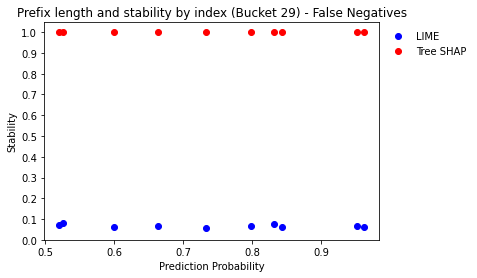

False Positives
Average LIME Stability: 0.07533705017739463
Average SHAP Stability: 1.0


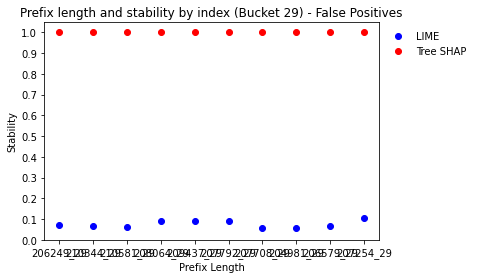

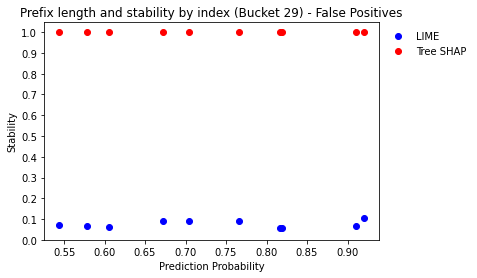

Bucket 30
True Negatives
Average LIME Stability: 0.1932022070756247
Average SHAP Stability: 1.0


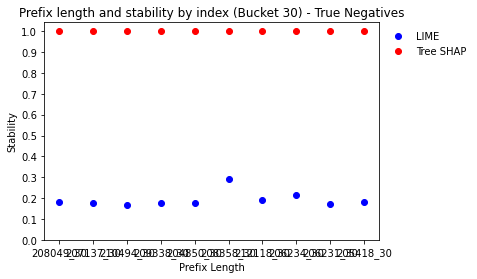

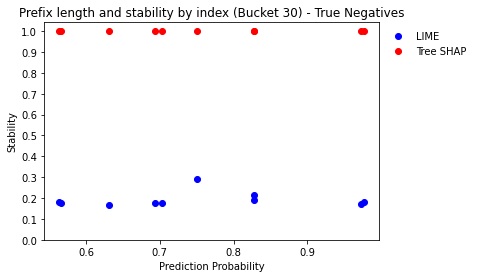

True Positives
Average LIME Stability: 0.1907458617332034
Average SHAP Stability: 1.0


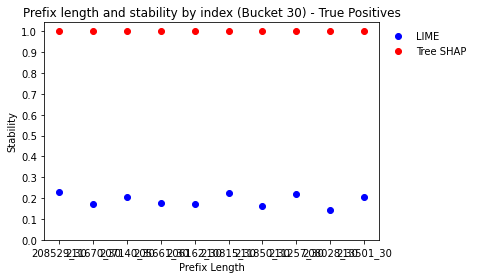

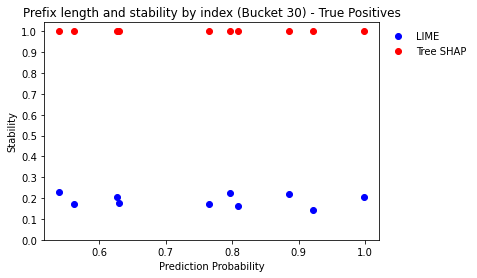

False Negatives
Average LIME Stability: 0.12040506329113912
Average SHAP Stability: 1.0


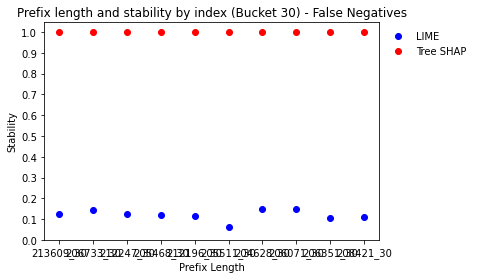

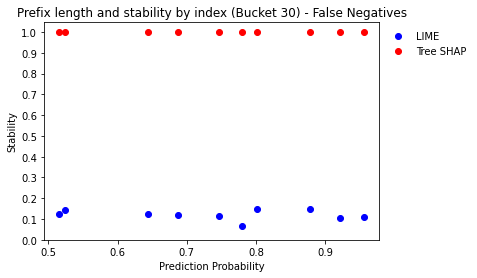

False Positives
Average LIME Stability: 0.11348263550795186
Average SHAP Stability: 1.0


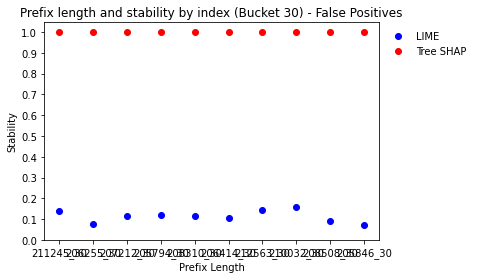

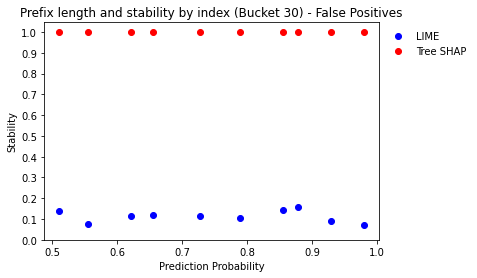

Bucket 31
True Negatives
Average LIME Stability: 0.1839823468328139
Average SHAP Stability: 1.0


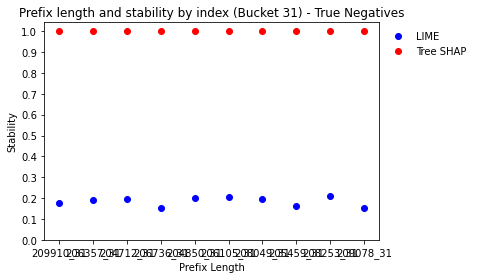

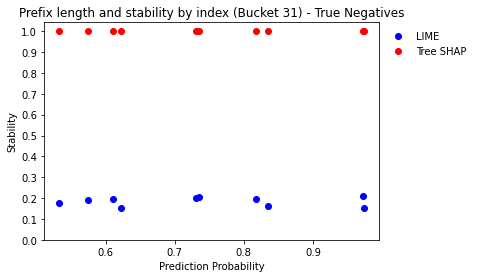

True Positives
Average LIME Stability: 0.20385254413291776
Average SHAP Stability: 1.0


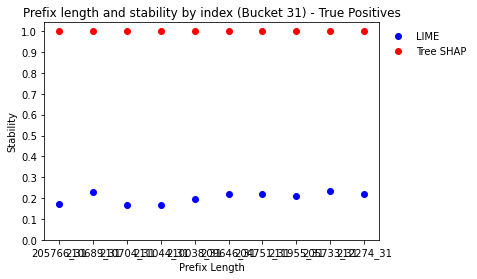

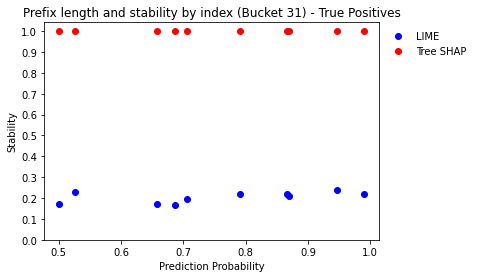

False Negatives
Average LIME Stability: 0.05672377985462079
Average SHAP Stability: 1.0


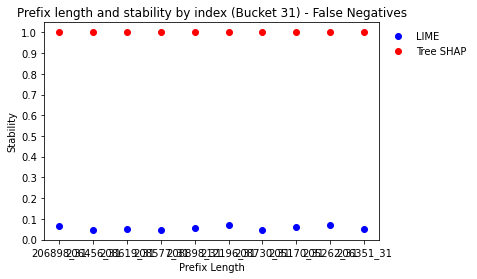

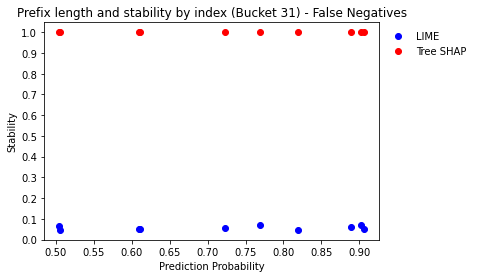

False Positives
Average LIME Stability: 0.06029595015576309
Average SHAP Stability: 1.0


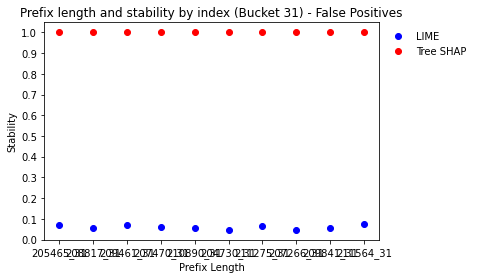

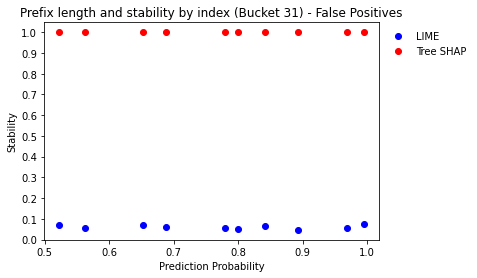

Bucket 32
True Negatives
Average LIME Stability: 0.1316669165791971
Average SHAP Stability: 1.0


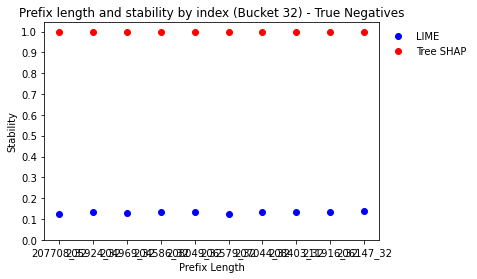

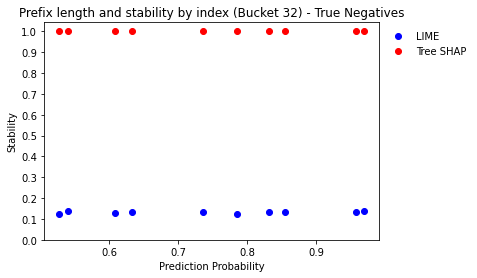

True Positives
Average LIME Stability: 0.12229159794072056
Average SHAP Stability: 1.0


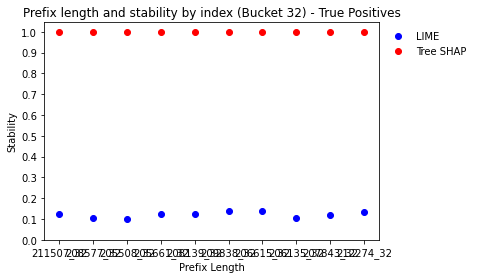

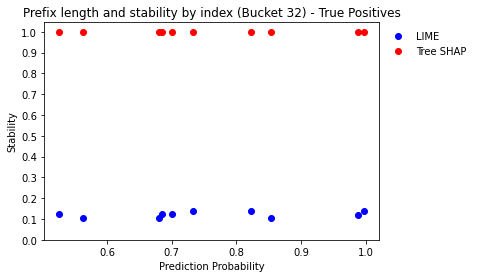

False Negatives
Average LIME Stability: 0.05711081121607413
Average SHAP Stability: 1.0


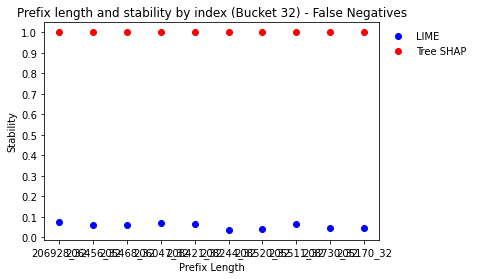

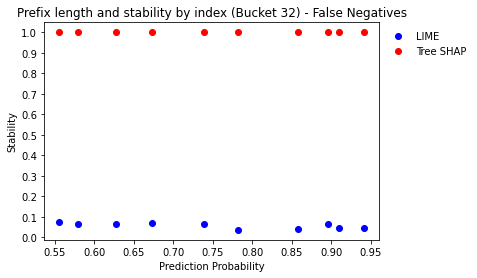

False Positives
Average LIME Stability: 0.06291457989703578
Average SHAP Stability: 1.0


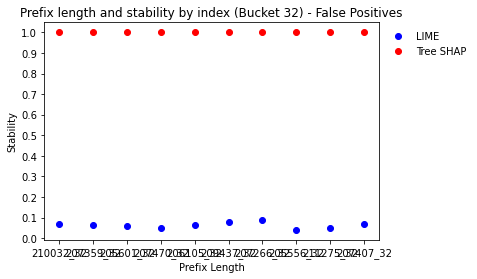

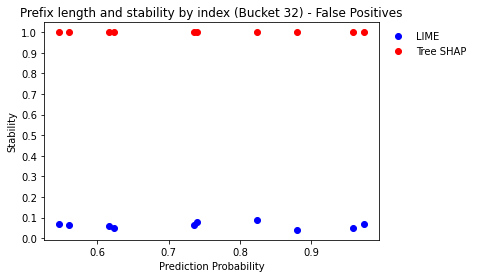

Bucket 33
True Negatives
Average LIME Stability: 0.03706407607570272
Average SHAP Stability: 1.0


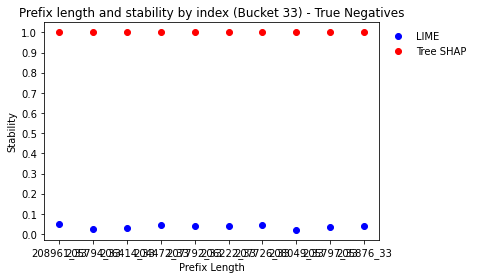

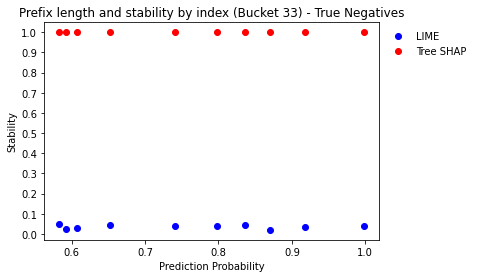

True Positives
Average LIME Stability: 0.037611594202898536
Average SHAP Stability: 1.0


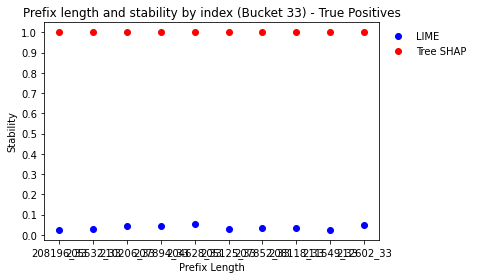

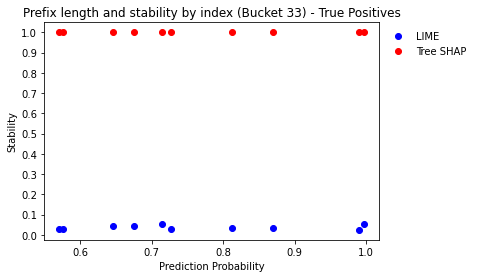

False Negatives
Average LIME Stability: 0.060128824476650494
Average SHAP Stability: 1.0


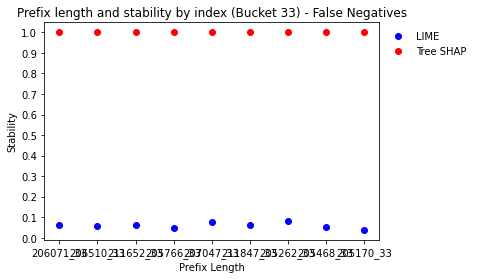

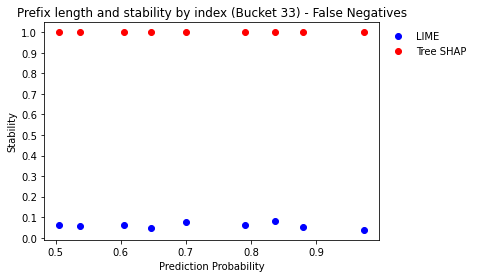

False Positives
Average LIME Stability: 0.05546666666666661
Average SHAP Stability: 1.0


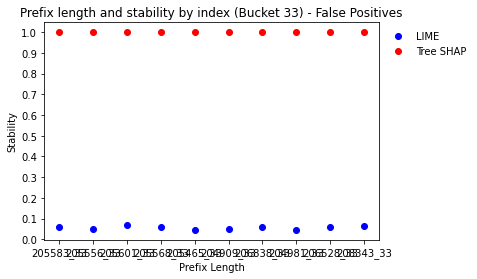

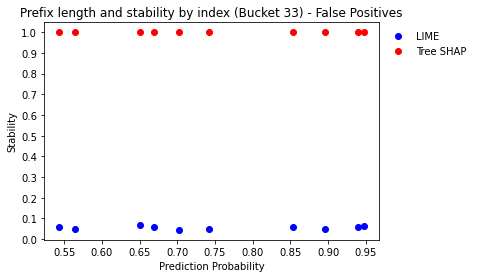

Bucket 34
True Negatives
Average LIME Stability: 0.035293523969722095
Average SHAP Stability: 1.0


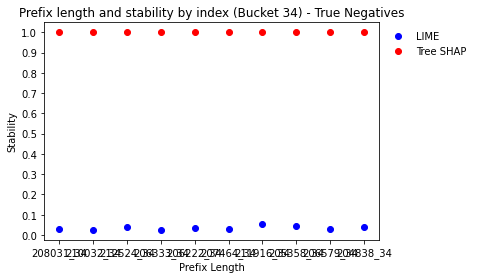

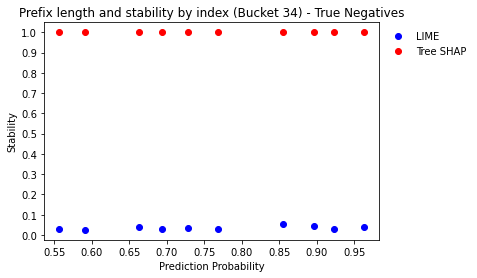

True Positives
Average LIME Stability: 0.03685562097000254
Average SHAP Stability: 1.0


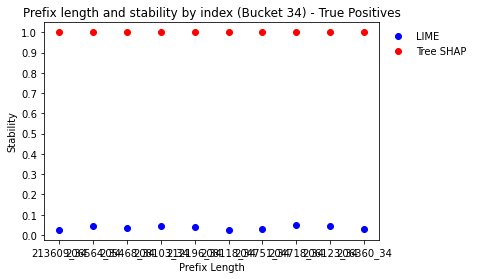

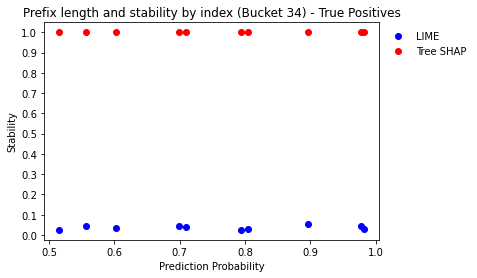

False Negatives
Average LIME Stability: 0.058724978973927436
Average SHAP Stability: 1.0


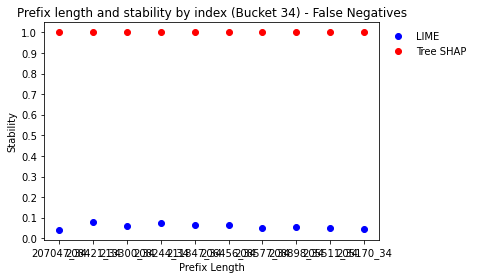

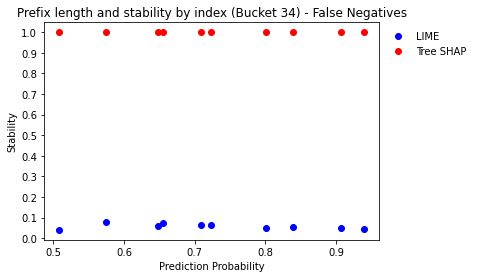

False Positives
Average LIME Stability: 0.05336921783010913
Average SHAP Stability: 1.0


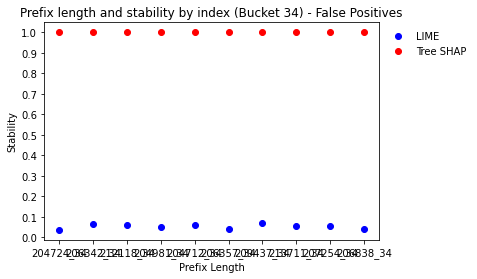

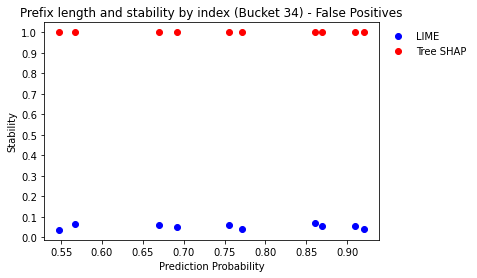

Bucket 35
True Negatives
Average LIME Stability: 0.03697574686069164
Average SHAP Stability: 1.0


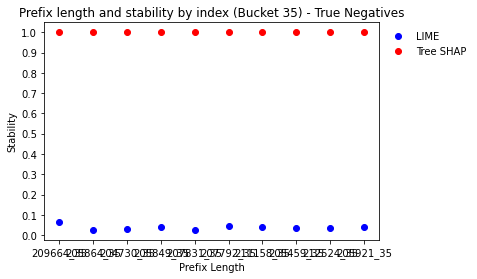

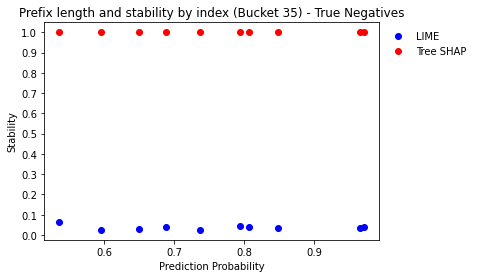

True Positives
Average LIME Stability: 0.03697574686069168
Average SHAP Stability: 1.0


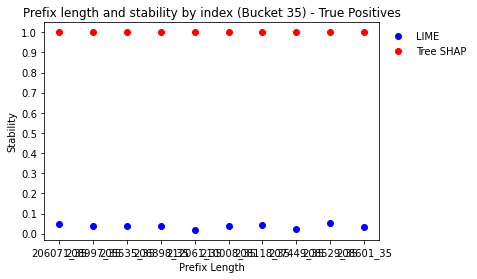

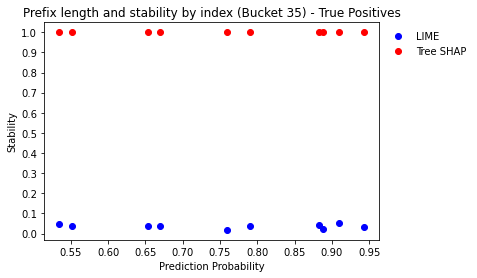

False Negatives
Average LIME Stability: 0.055916909701759304
Average SHAP Stability: 1.0


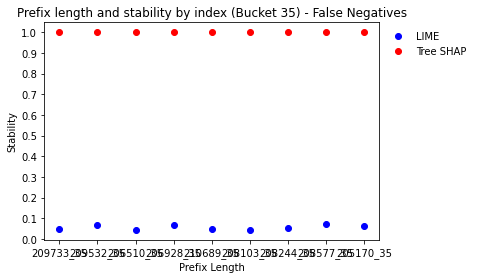

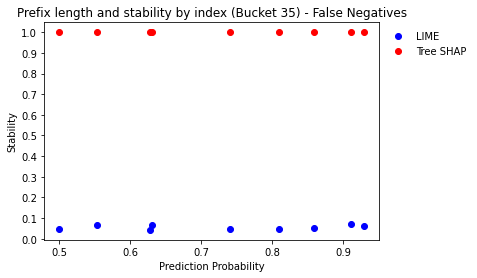

False Positives
Average LIME Stability: 0.06107366607733803
Average SHAP Stability: 1.0


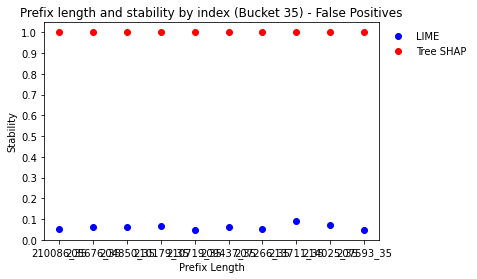

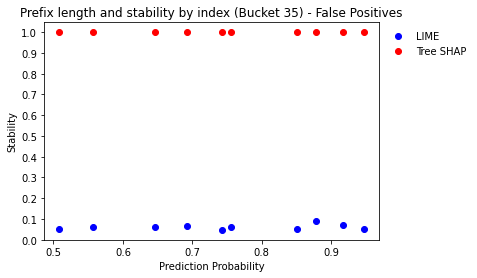

Bucket 36
True Negatives
Average LIME Stability: 0.03485789751716837
Average SHAP Stability: 1.0


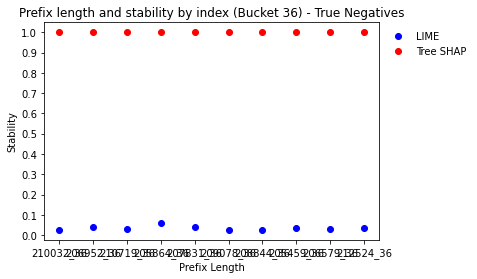

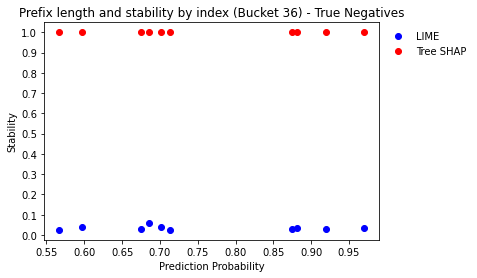

True Positives
Average LIME Stability: 0.03191178161369884
Average SHAP Stability: 1.0


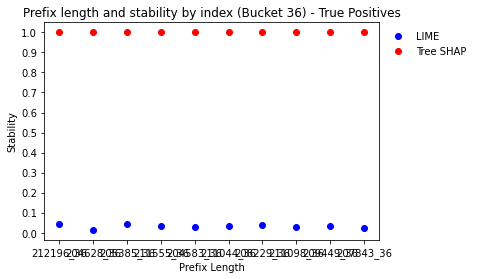

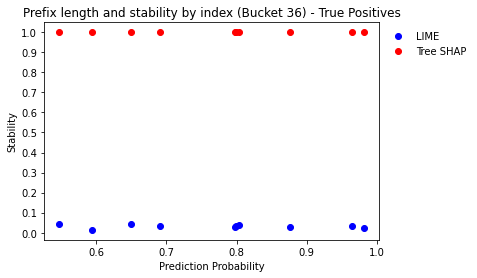

False Negatives
Average LIME Stability: 0.05265033456594451
Average SHAP Stability: 1.0


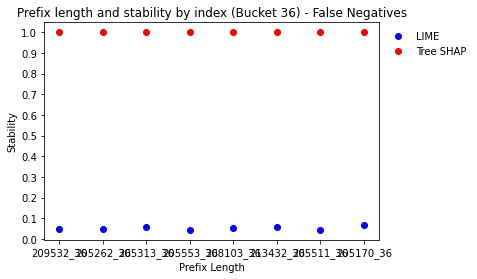

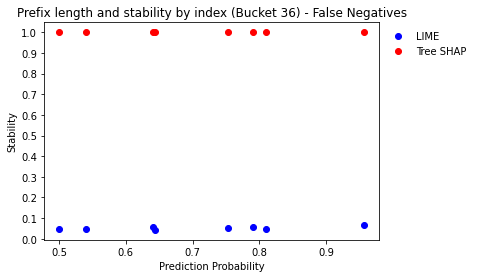

False Positives
Average LIME Stability: 0.04467441450959657
Average SHAP Stability: 1.0


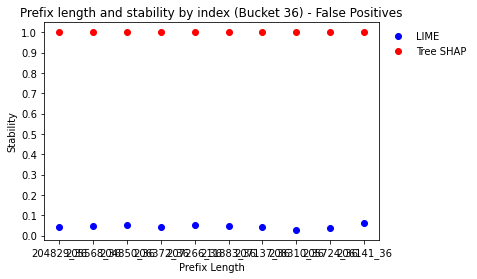

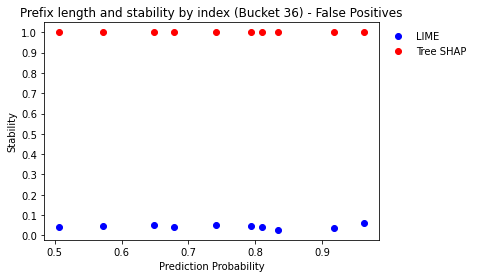

Bucket 37
True Negatives
Average LIME Stability: 0.04054756717501806
Average SHAP Stability: 1.0


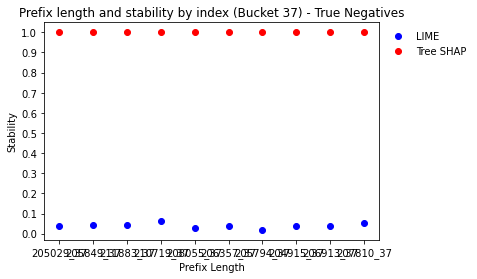

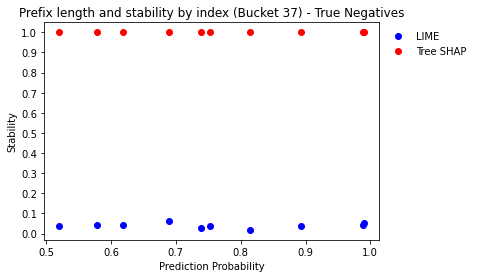

True Positives
Average LIME Stability: 0.03535574103062068
Average SHAP Stability: 1.0


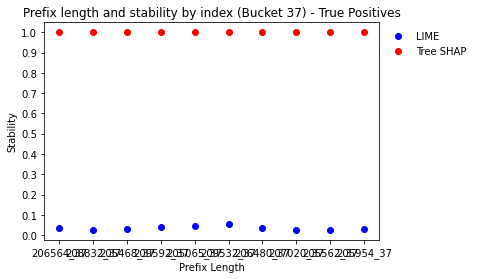

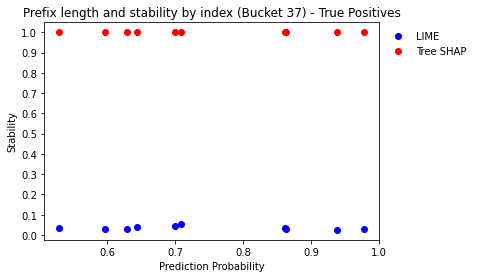

False Negatives
Average LIME Stability: 0.05118088484486008
Average SHAP Stability: 1.0


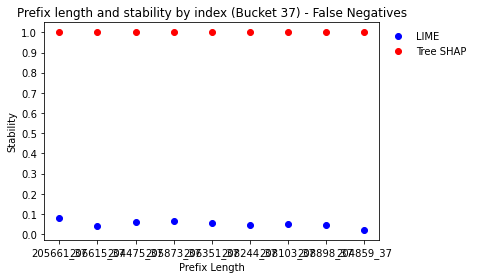

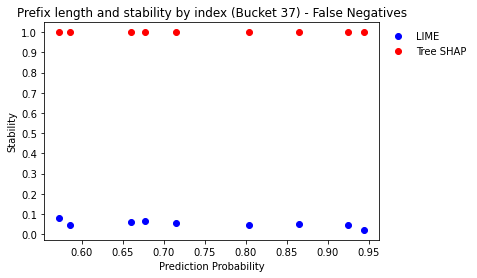

False Positives
Average LIME Stability: 0.0476860181981288
Average SHAP Stability: 1.0


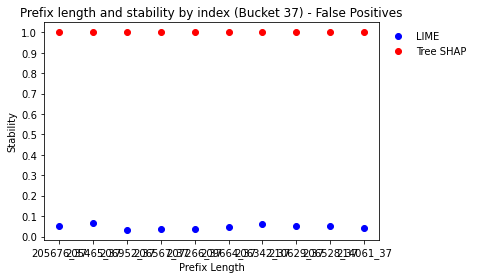

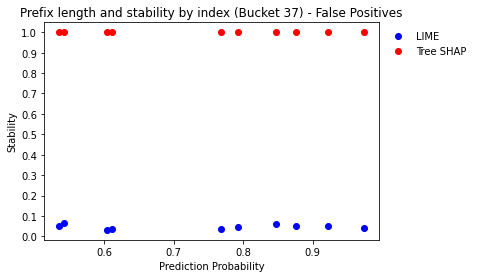

Bucket 38
True Negatives
Average LIME Stability: 0.051577096722461815
Average SHAP Stability: 1.0


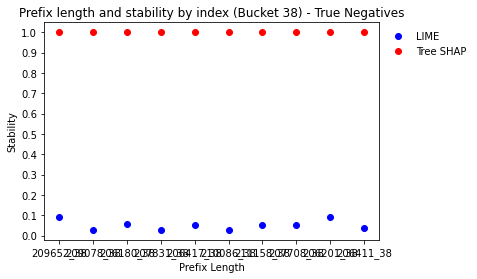

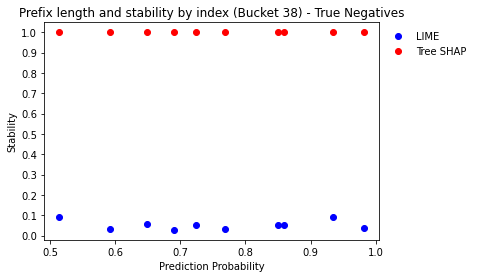

True Positives
Average LIME Stability: 0.03932826385417069
Average SHAP Stability: 1.0


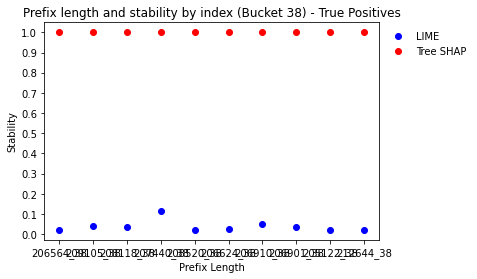

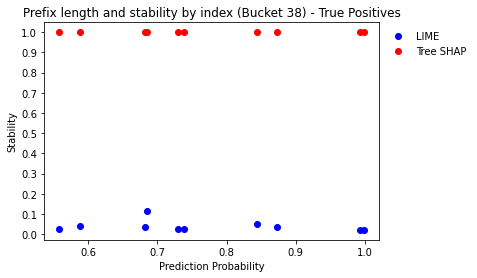

False Negatives
Average LIME Stability: 0.045049190898123675
Average SHAP Stability: 1.0


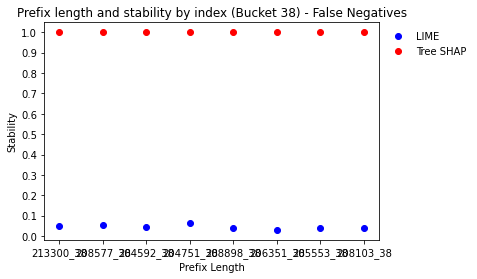

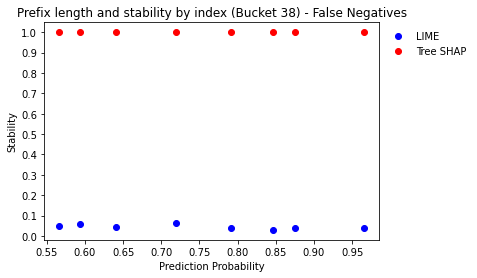

False Positives
Average LIME Stability: 0.04733549648487852
Average SHAP Stability: 1.0


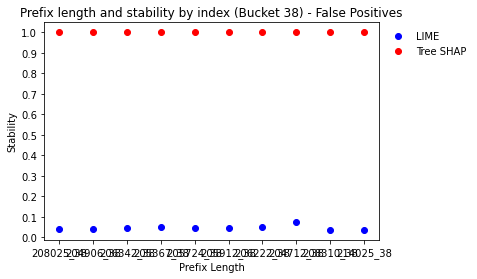

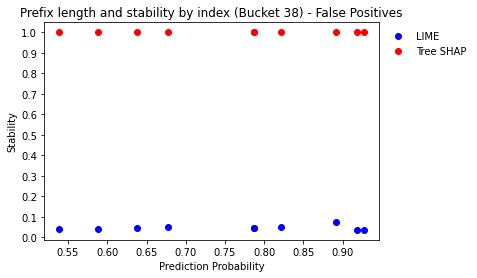

Bucket 39
True Negatives
Average LIME Stability: 0.03808031239839503
Average SHAP Stability: 1.0


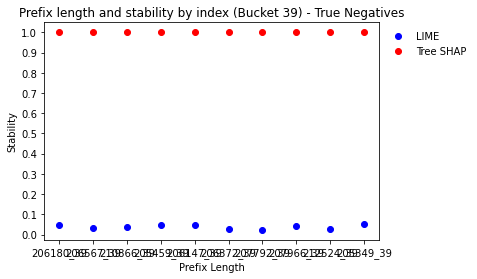

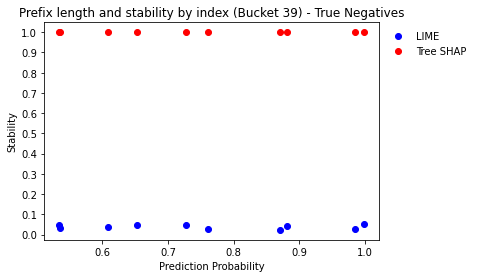

True Positives
Average LIME Stability: 0.03923201079746447
Average SHAP Stability: 1.0


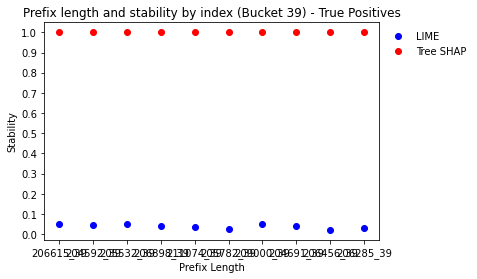

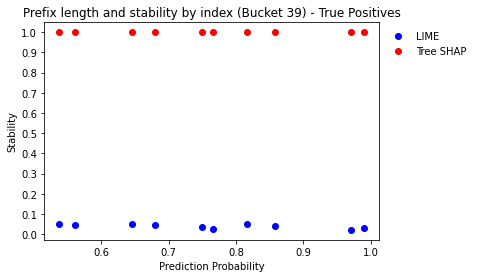

False Negatives
Average LIME Stability: 0.05406272793581314
Average SHAP Stability: 1.0


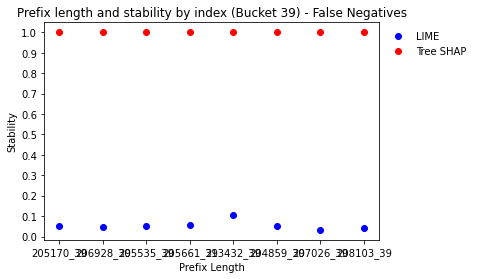

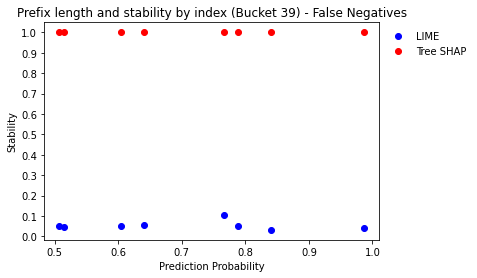

False Positives
Average LIME Stability: 0.04742750628089789
Average SHAP Stability: 1.0


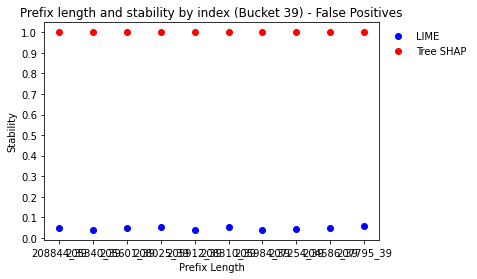

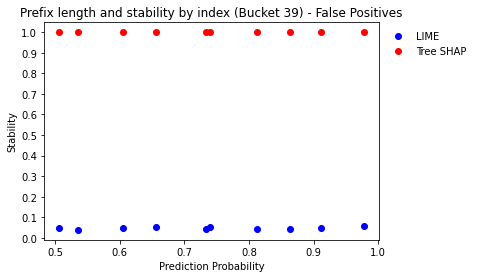

Bucket 40
True Negatives
Average LIME Stability: 0.038824642308146806
Average SHAP Stability: 1.0


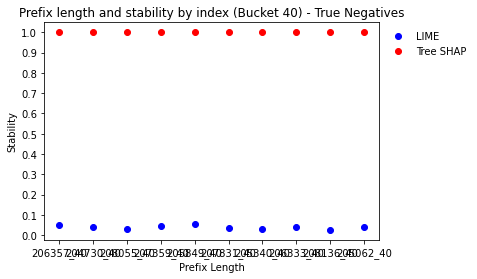

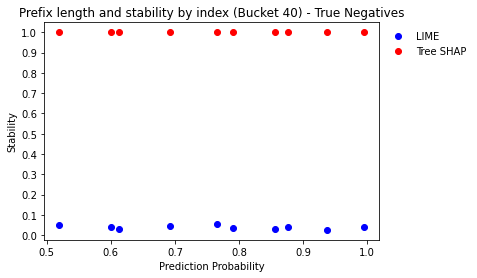

True Positives
Average LIME Stability: 0.03369540026013932
Average SHAP Stability: 1.0


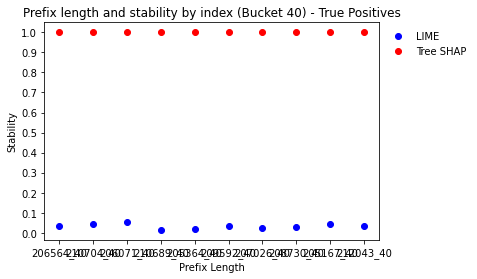

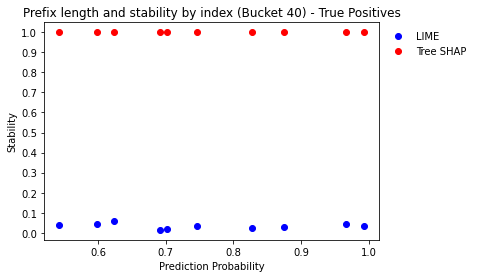

False Negatives
Average LIME Stability: 0.04749727379028522
Average SHAP Stability: 1.0


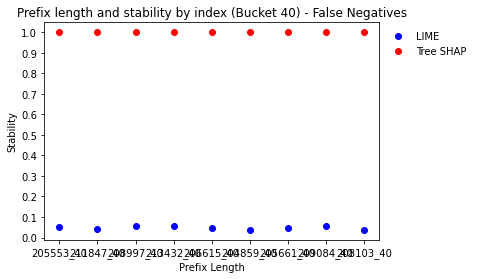

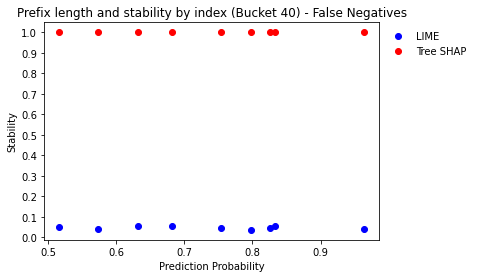

False Positives
Average LIME Stability: 0.05109022111859973
Average SHAP Stability: 1.0


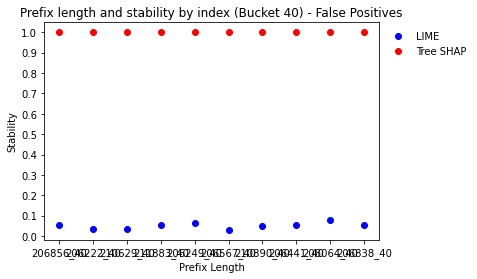

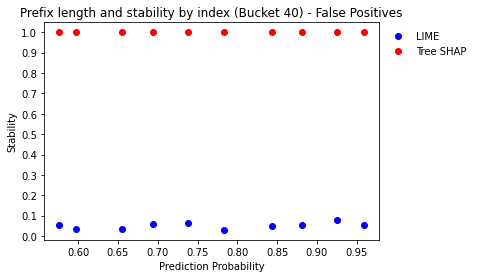

In [8]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = range(len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))]))

        for bucket in list(num_buckets):
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['lime_stability'])
                tree_shap_stability = pd.Series(data['tree_shap_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Stability:", statistics.mean(lime_stability))
                print("Average SHAP Stability:", statistics.mean(tree_shap_stability))
                
                fig, ax = plt.subplots()
                ax.plot(case_id, lime_stability, 'bo', label = "LIME")
                ax.plot(case_id, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1.1, 0.1))
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1.1, 0.1))
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()

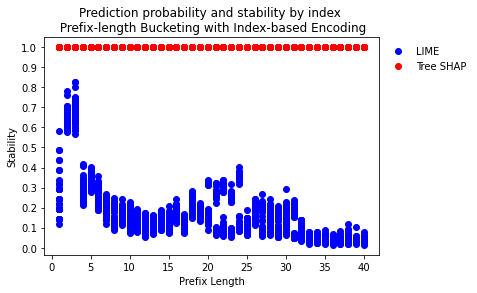

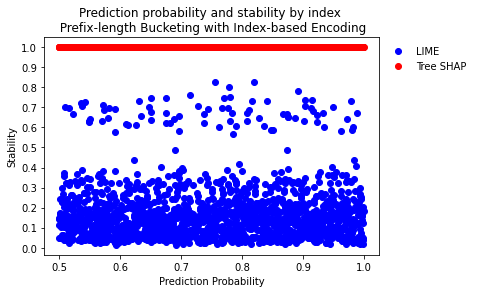

In [9]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1.1, 0.1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1.1, 0.1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

Bucket 1
True Negatives
Average LIME Weights Stability: 0.014784023211427567
Average SHAP Weights Stability: 8.969114109074318e-16
9


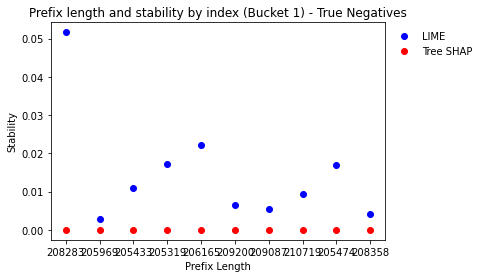

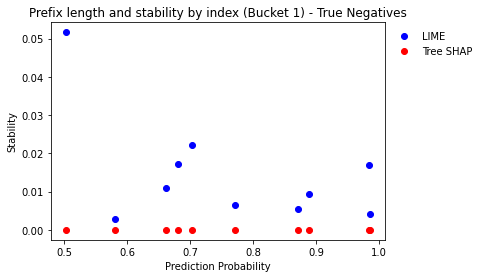

True Positives
Average LIME Weights Stability: 0.011188521242913085
Average SHAP Weights Stability: 7.4548240571683455e-16
9


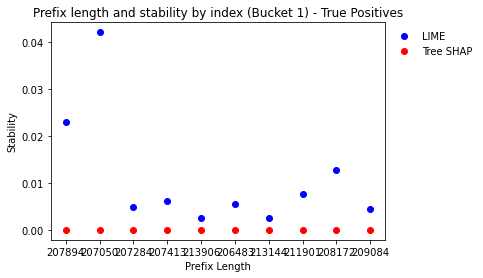

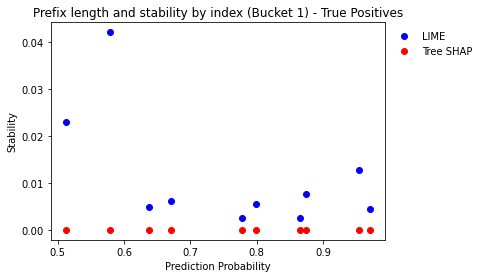

Bucket 2
True Negatives
Average LIME Weights Stability: 0.005598330625474939
Average SHAP Weights Stability: 4.2657504783172644e-16
10


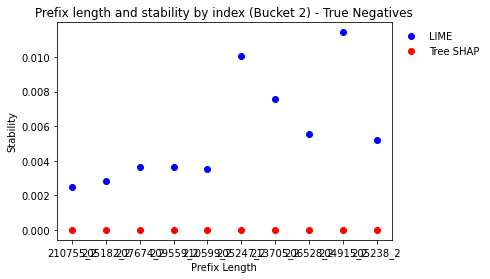

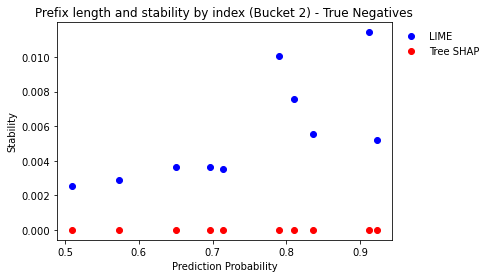

True Positives
Average LIME Weights Stability: 0.008910967637579743
Average SHAP Weights Stability: 4.875427397601117e-16
10


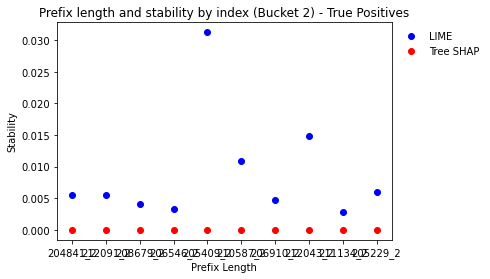

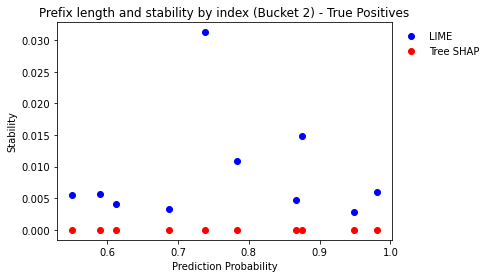

Bucket 3
True Negatives
Average LIME Weights Stability: 0.07282294166578995
Average SHAP Weights Stability: 2.8323557935770694e-16
10


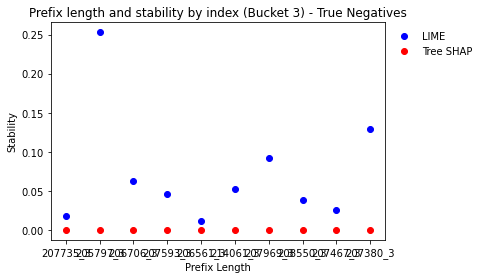

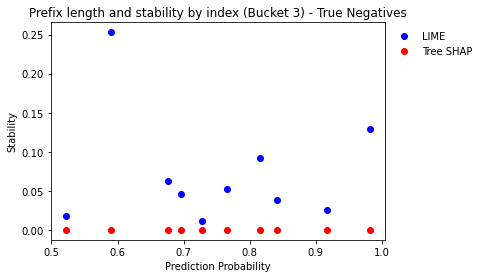

True Positives
Average LIME Weights Stability: 0.031800058163821046
Average SHAP Weights Stability: 4.801236870949556e-16
10


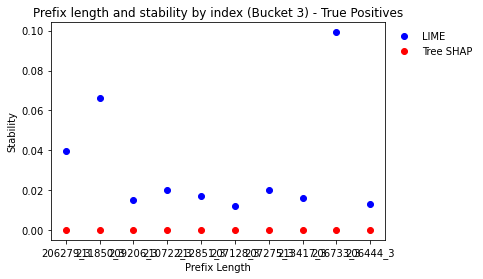

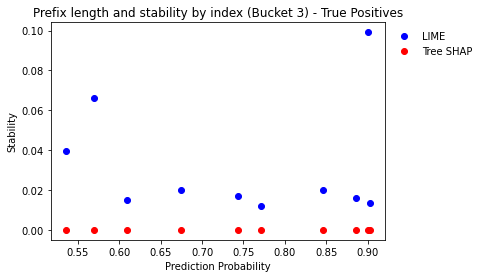

Bucket 4
True Negatives
Average LIME Weights Stability: 0.6585495928251558
Average SHAP Weights Stability: 1.0602629456425563e-16
10


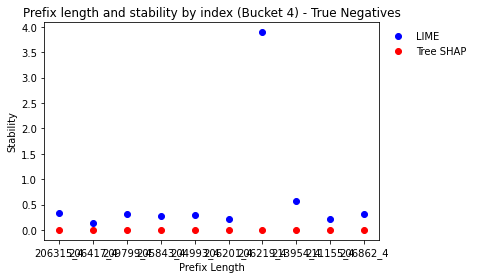

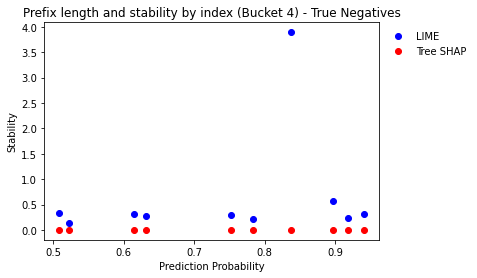

True Positives
Average LIME Weights Stability: 0.3176820244459583
Average SHAP Weights Stability: 1.394656214552454e-16
10


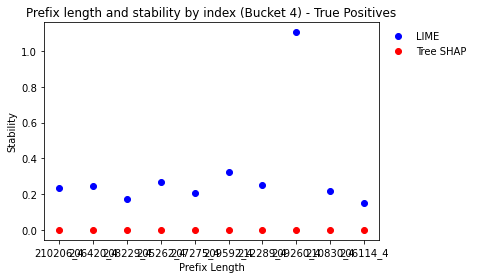

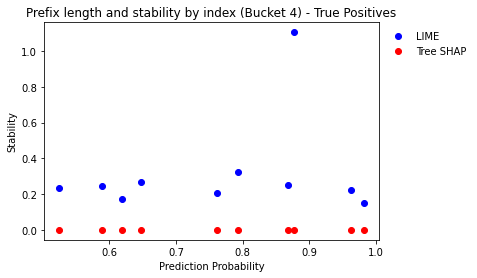

Bucket 5
True Negatives
Average LIME Weights Stability: 0.43365428865281913
Average SHAP Weights Stability: 8.37800750588916e-17
10


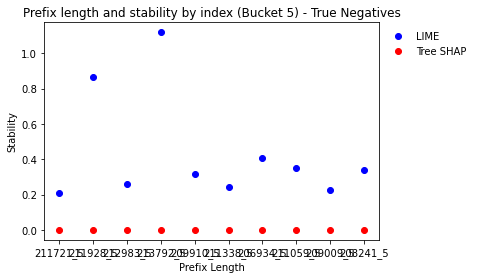

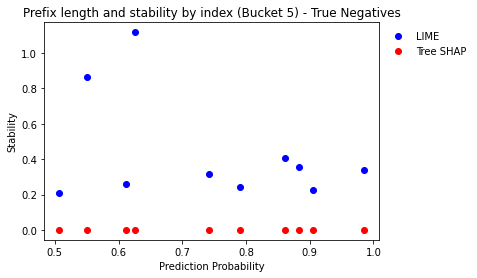

True Positives
Average LIME Weights Stability: 0.28515665445711363
Average SHAP Weights Stability: 1.0174160801372425e-16
10


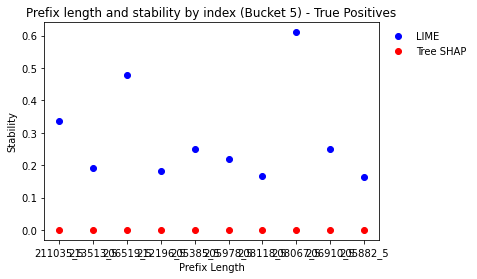

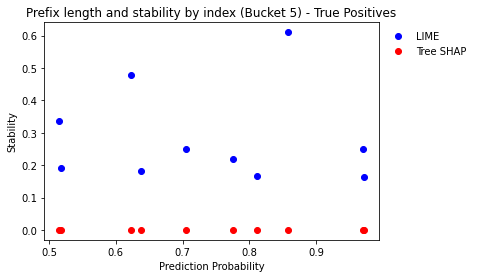

Bucket 6
True Negatives
Average LIME Weights Stability: 0.4471370225007891
Average SHAP Weights Stability: 7.431206788659824e-17
10


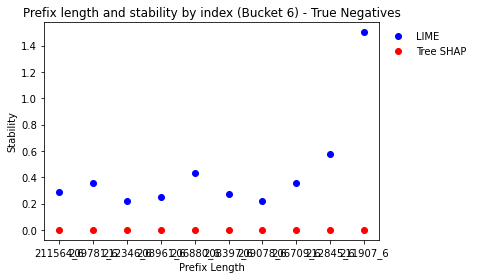

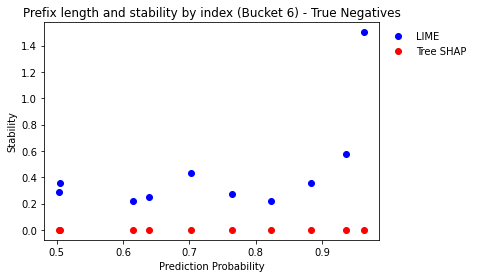

True Positives
Average LIME Weights Stability: 0.8755846438915219
Average SHAP Weights Stability: 9.698446091390607e-17
10


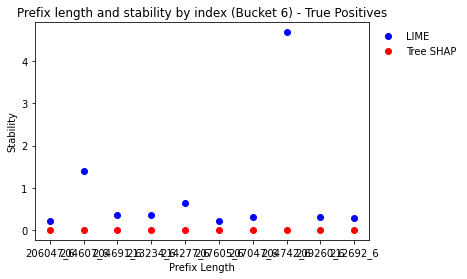

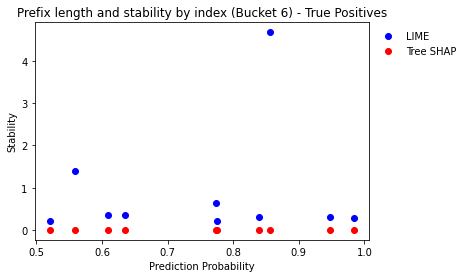

Bucket 7
True Negatives
Average LIME Weights Stability: 0.321019356269352
Average SHAP Weights Stability: 6.025713510540768e-17
10


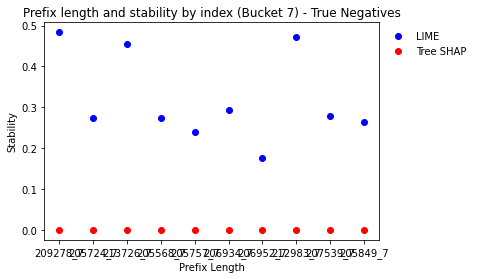

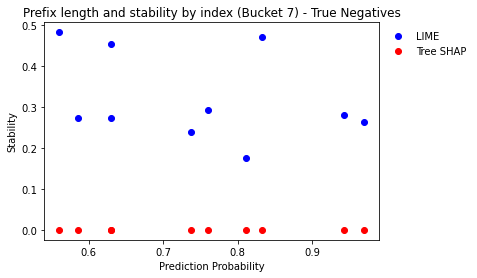

True Positives
Average LIME Weights Stability: 0.45029687006688923
Average SHAP Weights Stability: 7.415289482452878e-17
10


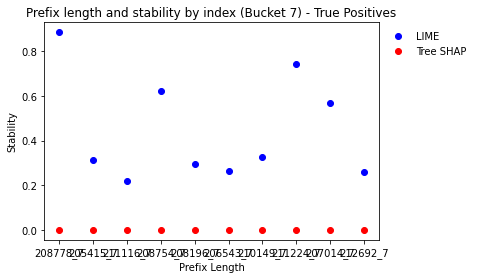

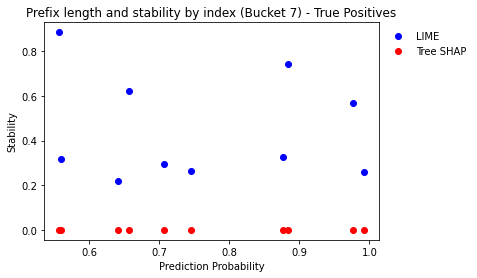

Bucket 8
True Negatives
Average LIME Weights Stability: 1.5613001112127705
Average SHAP Weights Stability: 5.289919129105435e-17
10


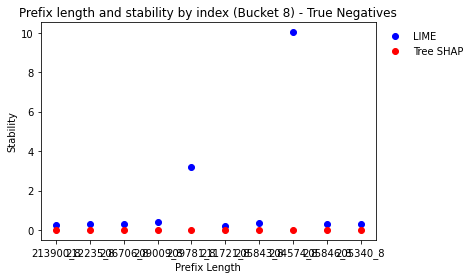

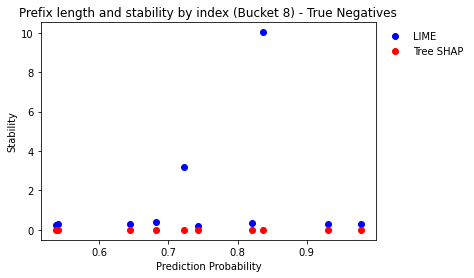

True Positives
Average LIME Weights Stability: 1.5532221133222368
Average SHAP Weights Stability: 5.169135947148249e-17
10


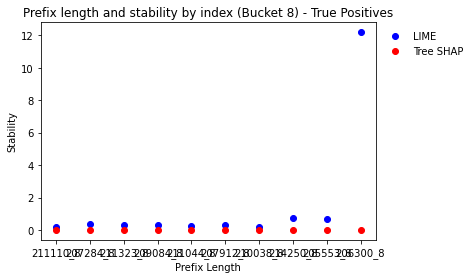

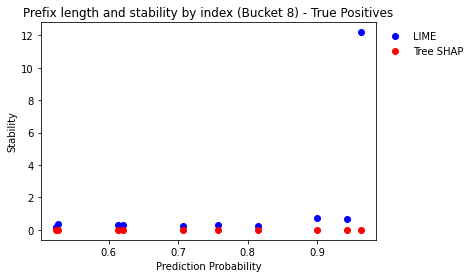

Bucket 9
True Negatives
Average LIME Weights Stability: 0.4368954038752839
Average SHAP Weights Stability: 5.605884115046141e-17
10


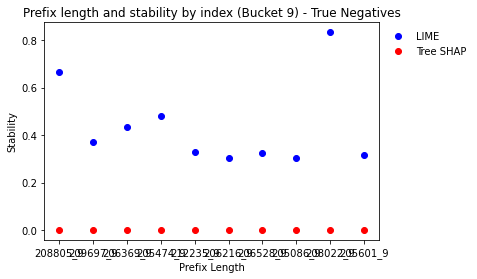

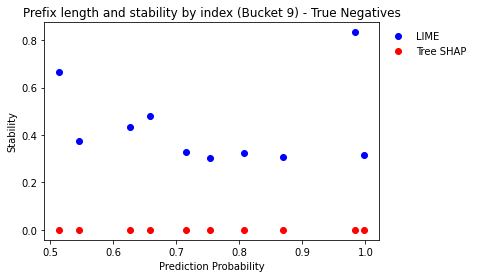

True Positives
Average LIME Weights Stability: 0.3301073906472195
Average SHAP Weights Stability: 3.8163270081129257e-17
10


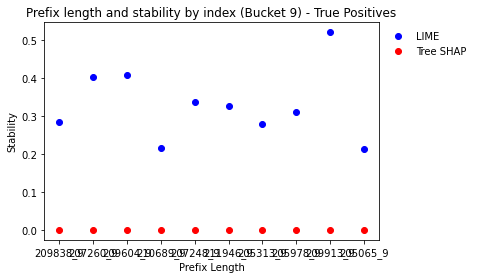

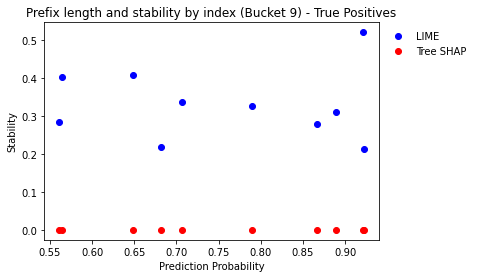

Bucket 10
True Negatives
Average LIME Weights Stability: 0.36149101832284264
Average SHAP Weights Stability: 3.981892190573282e-17
10


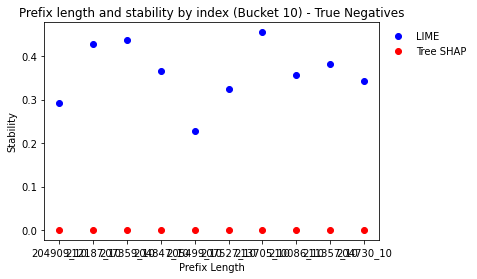

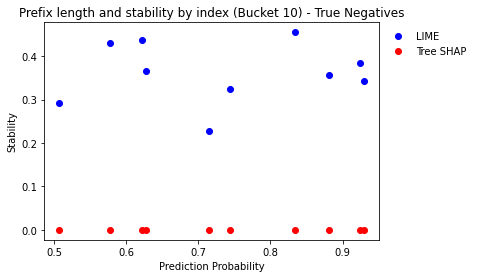

True Positives
Average LIME Weights Stability: 1.7832887742556116
Average SHAP Weights Stability: 3.506480692116405e-17
10


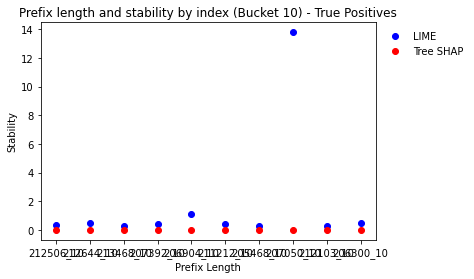

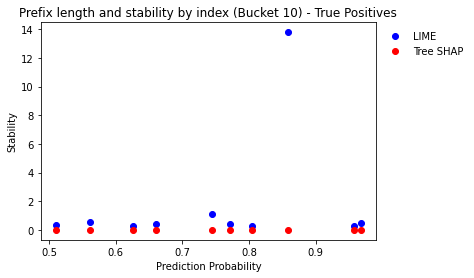

Bucket 11
True Negatives
Average LIME Weights Stability: 0.3682604950049954
Average SHAP Weights Stability: 3.7278037575892635e-17
10


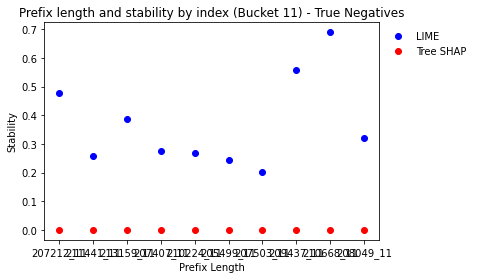

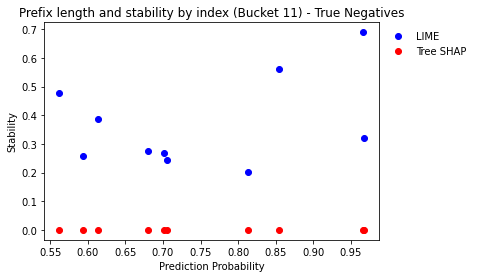

True Positives
Average LIME Weights Stability: 0.6706311950517307
Average SHAP Weights Stability: 3.621907836405609e-17
10


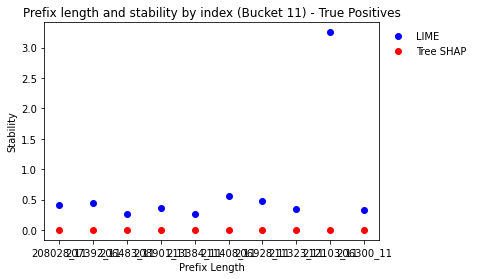

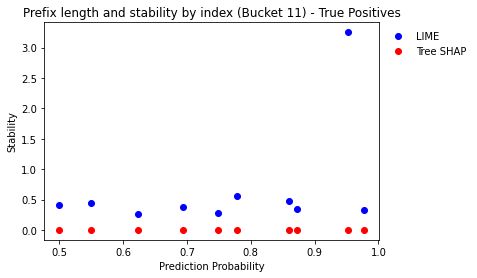

Bucket 12
True Negatives
Average LIME Weights Stability: 0.6213876455521712
Average SHAP Weights Stability: 3.1320208388701245e-17
10


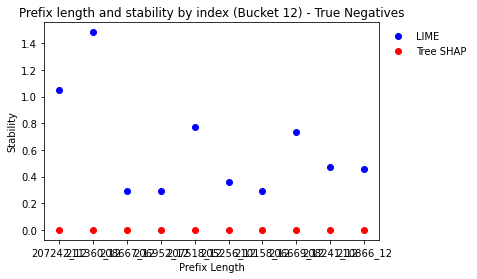

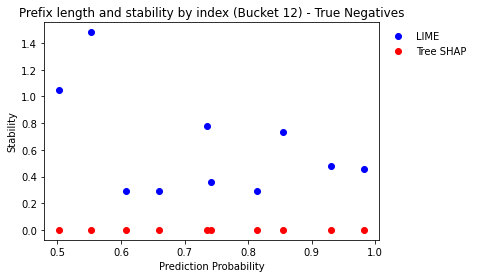

True Positives
Average LIME Weights Stability: 0.6830577625517663
Average SHAP Weights Stability: 3.2463721566114065e-17
10


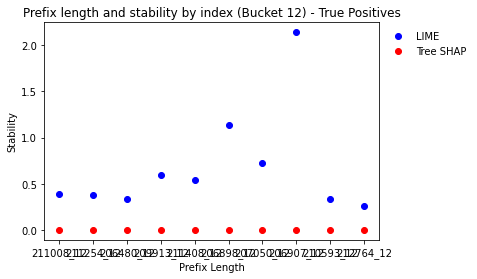

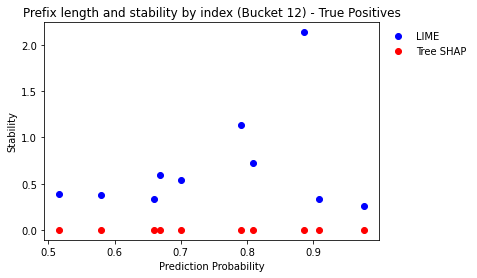

Bucket 13
True Negatives
Average LIME Weights Stability: 0.43441462809177894
Average SHAP Weights Stability: 3.053097423578108e-17
10


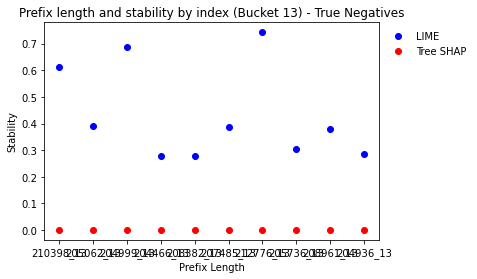

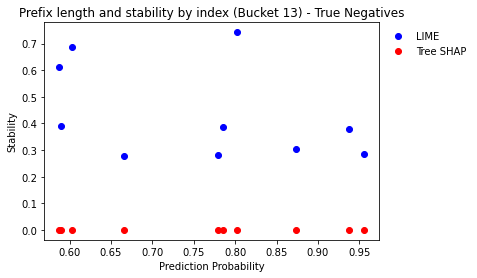

True Positives
Average LIME Weights Stability: 0.5760780063331872
Average SHAP Weights Stability: 2.761175470686733e-17
10


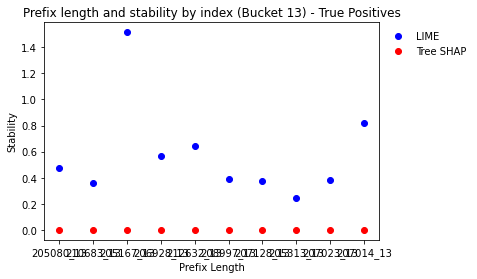

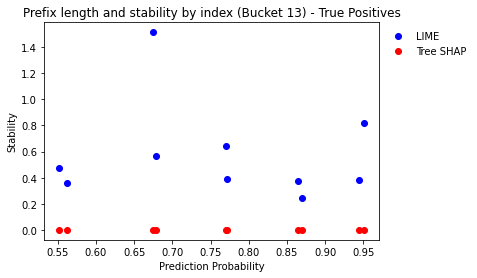

Bucket 14
True Negatives
Average LIME Weights Stability: 0.9098007982750053
Average SHAP Weights Stability: 2.906109025186571e-17
10


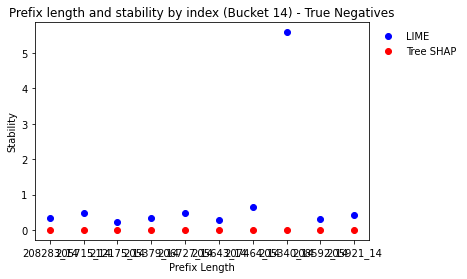

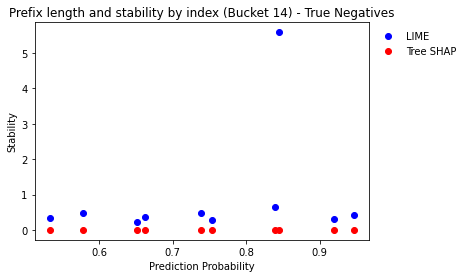

True Positives
Average LIME Weights Stability: 0.4454749323601327
Average SHAP Weights Stability: 3.1045592645613035e-17
10


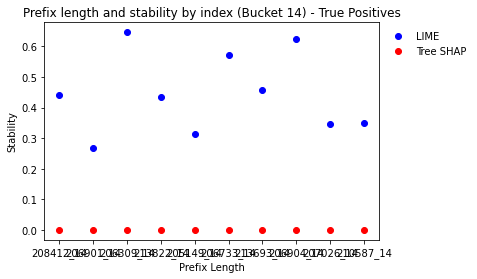

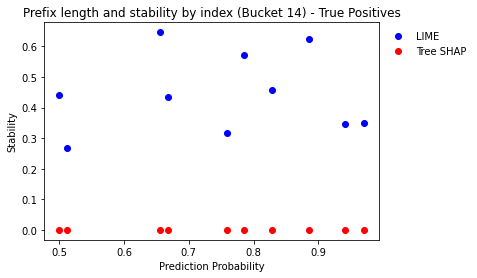

Bucket 15
True Negatives
Average LIME Weights Stability: 0.6720446946769192
Average SHAP Weights Stability: 2.4811796686279912e-17
10


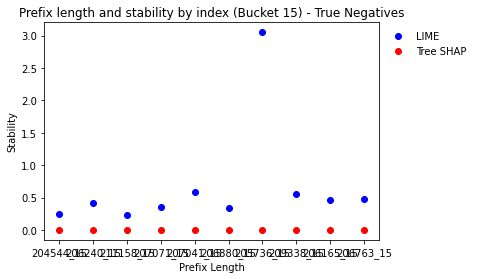

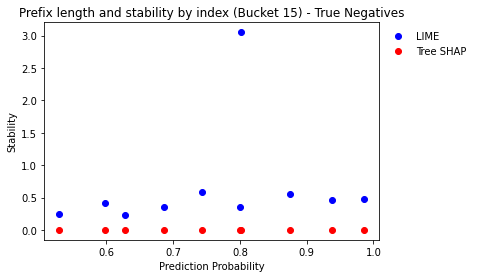

True Positives
Average LIME Weights Stability: 1.824316371098875
Average SHAP Weights Stability: 2.809585410541106e-17
10


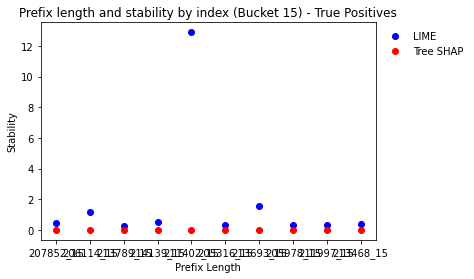

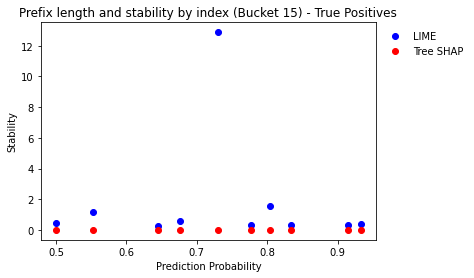

Bucket 16
True Negatives
Average LIME Weights Stability: 1.0575240876518708
Average SHAP Weights Stability: 2.6245283195625235e-17
10


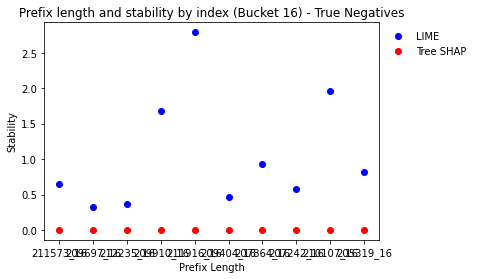

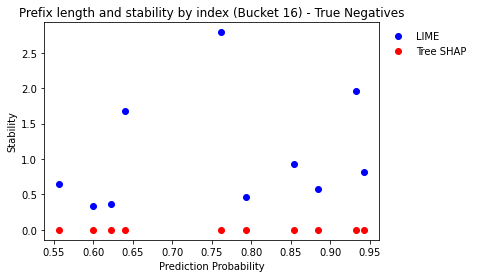

True Positives
Average LIME Weights Stability: 0.4871583215645192
Average SHAP Weights Stability: 2.4924166028183523e-17
10


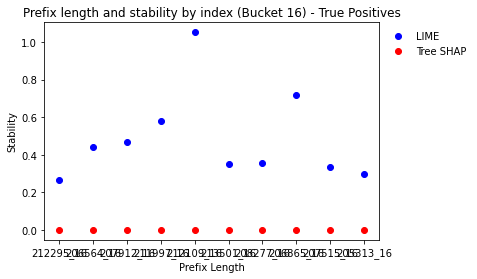

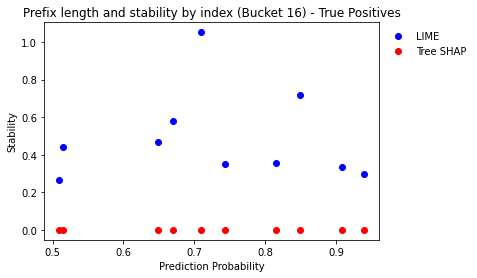

Bucket 17
True Negatives
Average LIME Weights Stability: 0.6101190701697052
Average SHAP Weights Stability: 2.6590940874938533e-17
10


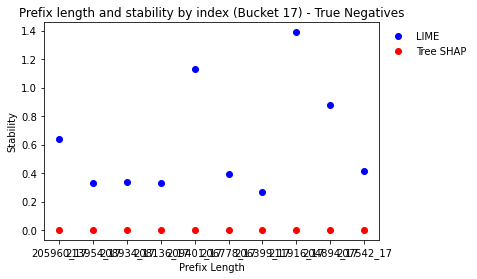

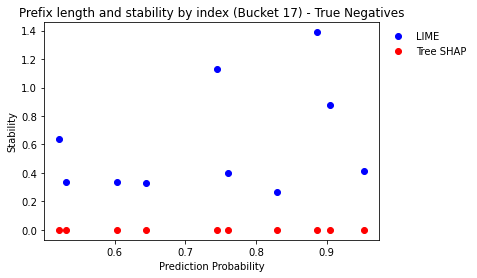

True Positives
Average LIME Weights Stability: 0.4146142776225222
Average SHAP Weights Stability: 2.54462372047573e-17
10


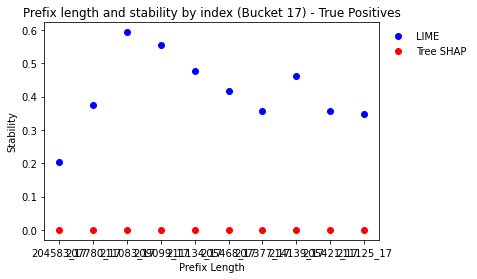

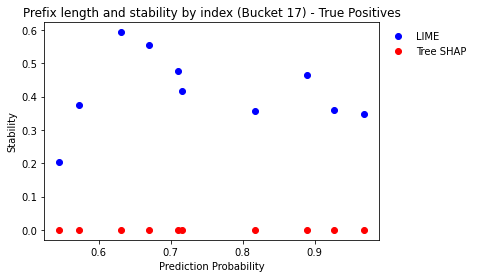

Bucket 18
True Negatives
Average LIME Weights Stability: 0.7811898191974062
Average SHAP Weights Stability: 2.4715386296161252e-17
10


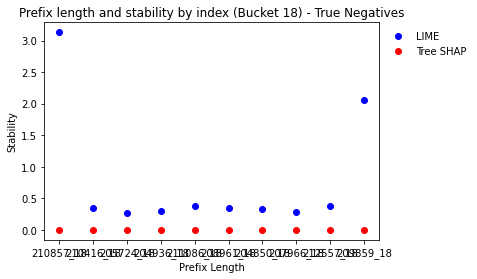

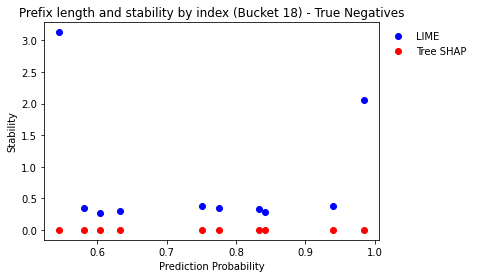

True Positives
Average LIME Weights Stability: 0.6523556516582417
Average SHAP Weights Stability: 2.376316742542727e-17
10


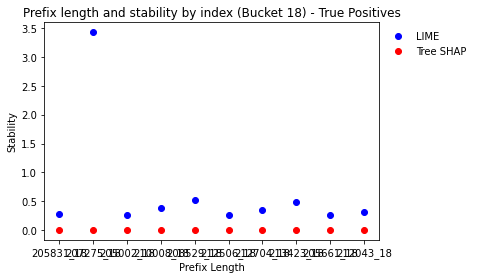

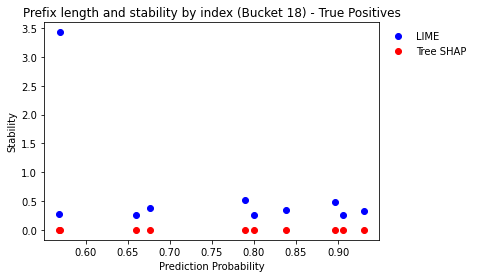

Bucket 19
True Negatives
Average LIME Weights Stability: 0.3393617398818553
Average SHAP Weights Stability: 2.1822037317760515e-17
10


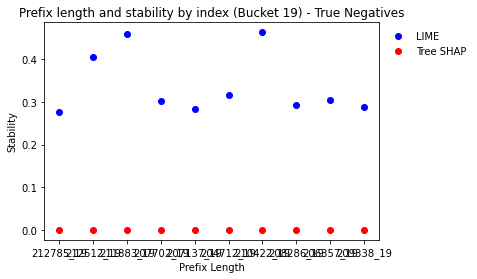

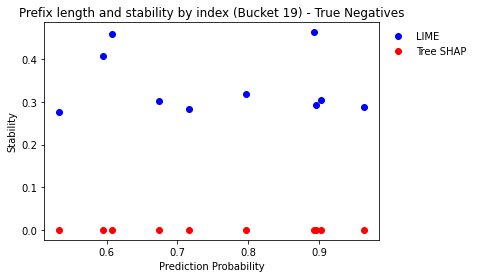

True Positives
Average LIME Weights Stability: 0.5329744074620039
Average SHAP Weights Stability: 2.250485091687778e-17
10


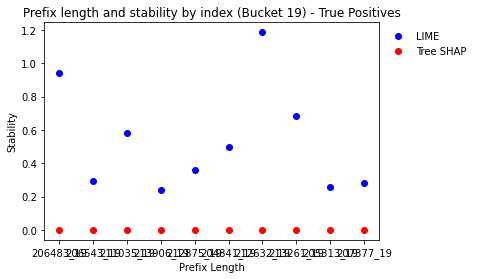

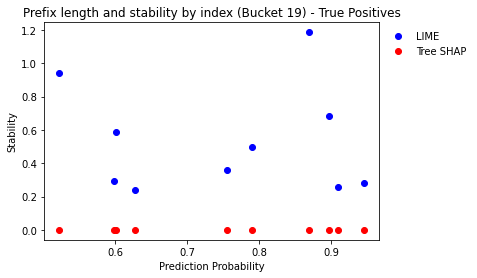

Bucket 20
True Negatives
Average LIME Weights Stability: 0.39419645023848054
Average SHAP Weights Stability: 2.2363799227977692e-17
10


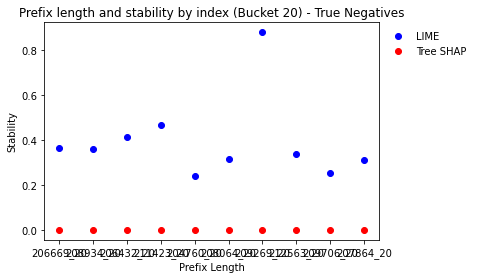

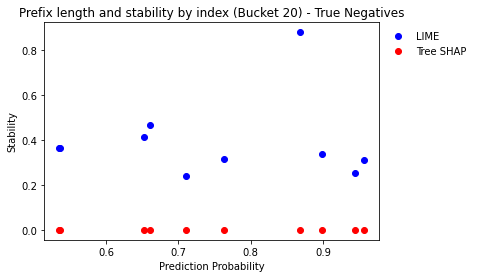

True Positives
Average LIME Weights Stability: 0.35783623699559525
Average SHAP Weights Stability: 2.5113140805437262e-17
10


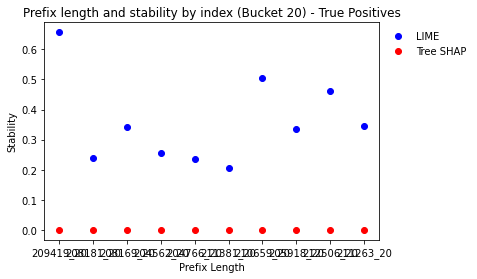

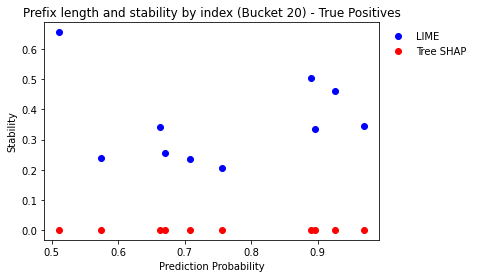

Bucket 21
True Negatives
Average LIME Weights Stability: 0.34229544035575665
Average SHAP Weights Stability: 2.2279446231397208e-17
10


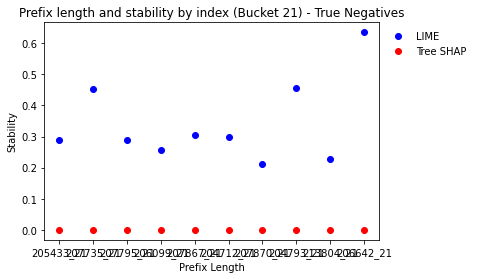

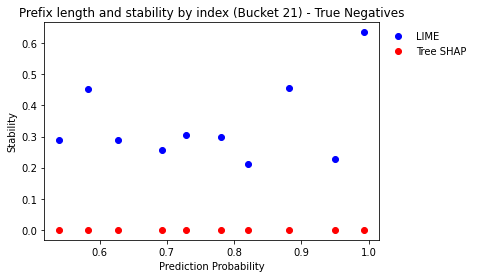

True Positives
Average LIME Weights Stability: 1.0525185777893447
Average SHAP Weights Stability: 2.4010121280671665e-17
10


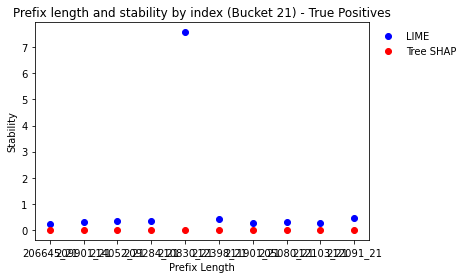

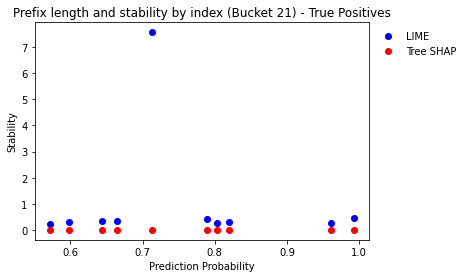

Bucket 22
True Negatives
Average LIME Weights Stability: 0.2960566840685015
Average SHAP Weights Stability: 2.2105606994499345e-17
10


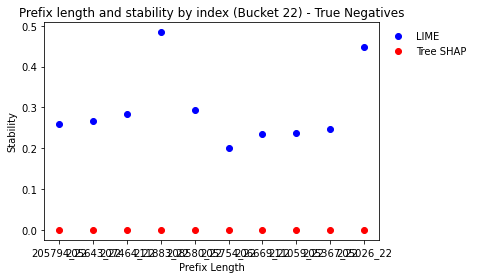

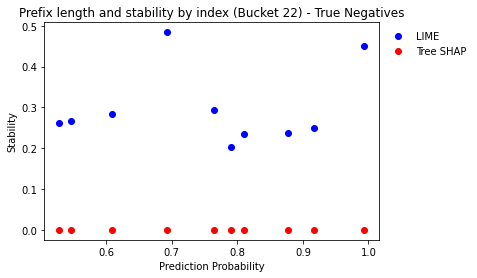

True Positives
Average LIME Weights Stability: 0.5938013308773847
Average SHAP Weights Stability: 2.221503709591782e-17
10


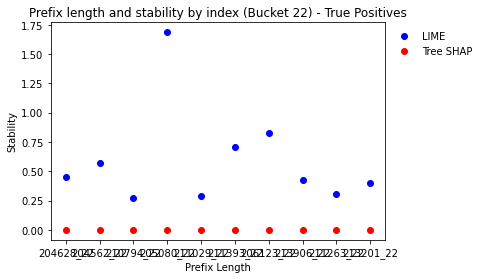

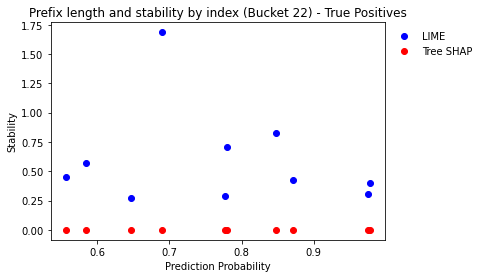

Bucket 23
True Negatives
Average LIME Weights Stability: 0.3844903915213063
Average SHAP Weights Stability: 2.1474140124558845e-17
10


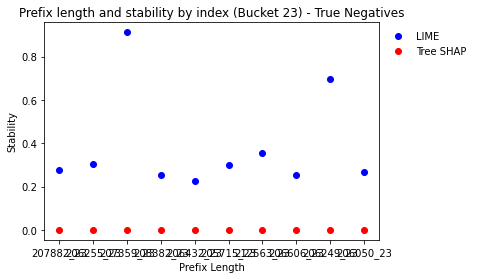

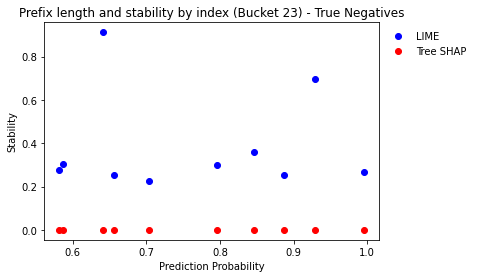

True Positives
Average LIME Weights Stability: 0.545588300078318
Average SHAP Weights Stability: 1.9924255698634844e-17
10


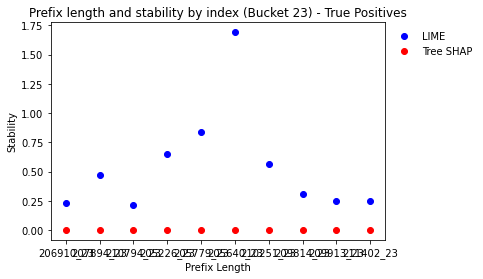

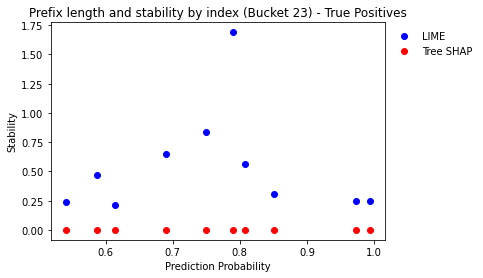

Bucket 24
True Negatives
Average LIME Weights Stability: 0.4160133664694767
Average SHAP Weights Stability: 1.989189899201017e-17
10


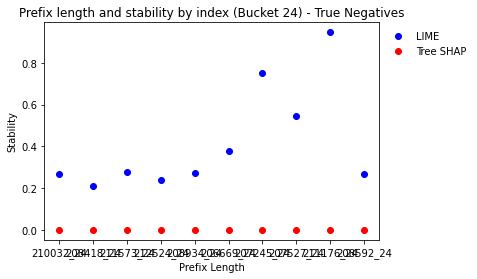

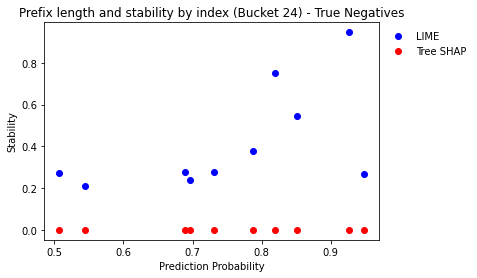

True Positives
Average LIME Weights Stability: 0.2989245933551422
Average SHAP Weights Stability: 1.8218016074948847e-17
10


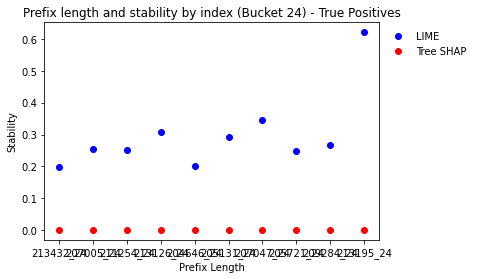

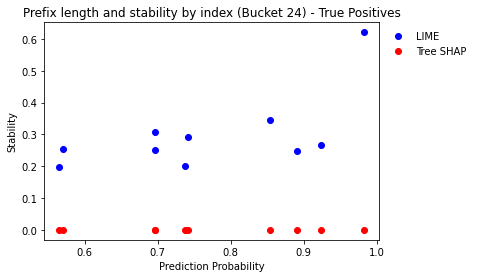

Bucket 25
True Negatives
Average LIME Weights Stability: 1.5515332392758807
Average SHAP Weights Stability: 2.009724842513457e-17
10


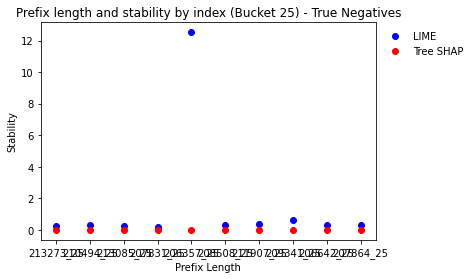

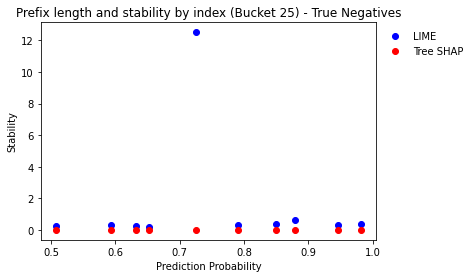

True Positives
Average LIME Weights Stability: 0.39084130647152976
Average SHAP Weights Stability: 1.8151096121841284e-17
10


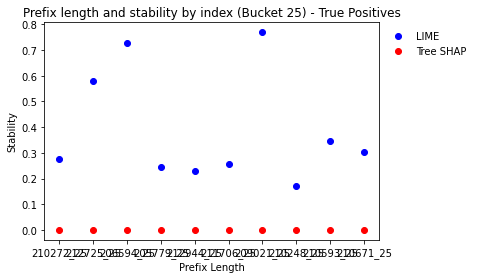

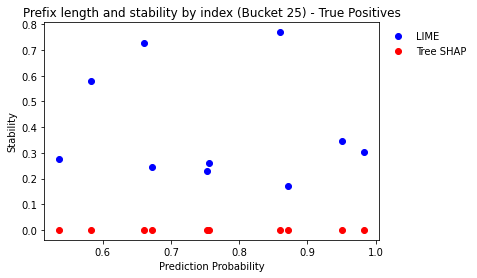

Bucket 26
True Negatives
Average LIME Weights Stability: 0.429328970325761
Average SHAP Weights Stability: 1.6634685164408236e-17
10


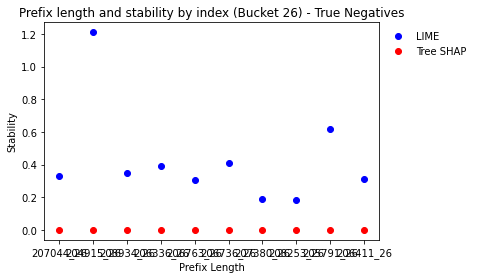

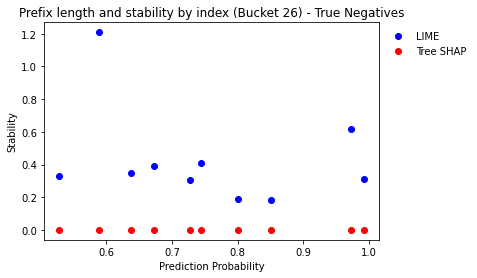

True Positives
Average LIME Weights Stability: 0.8118430319860436
Average SHAP Weights Stability: 1.7672500904333584e-17
10


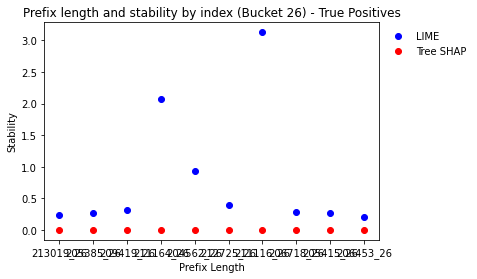

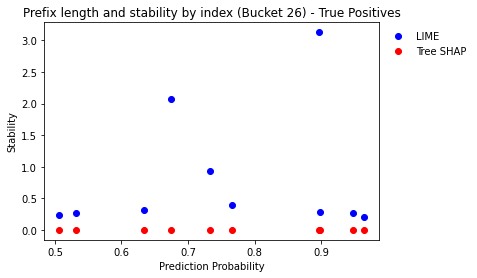

Bucket 27
True Negatives
Average LIME Weights Stability: 0.40144179252737605
Average SHAP Weights Stability: 1.6560647191798875e-17
10


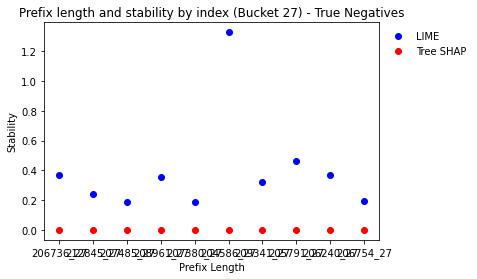

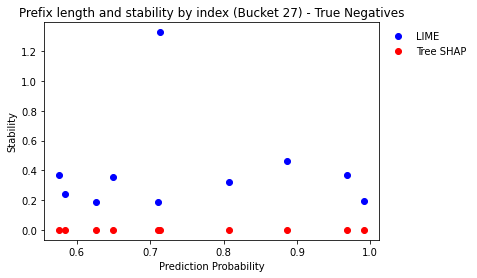

True Positives
Average LIME Weights Stability: 0.28217281435775055
Average SHAP Weights Stability: 1.7857331004852715e-17
10


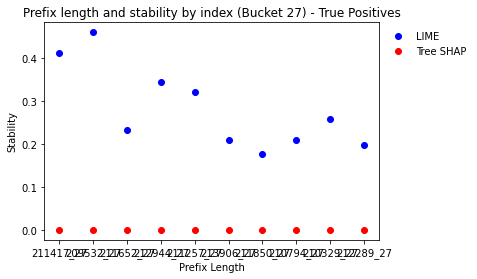

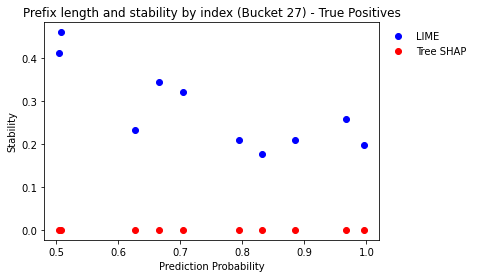

Bucket 28
True Negatives
Average LIME Weights Stability: 0.43292798118970843
Average SHAP Weights Stability: 1.8879294701817673e-17
10


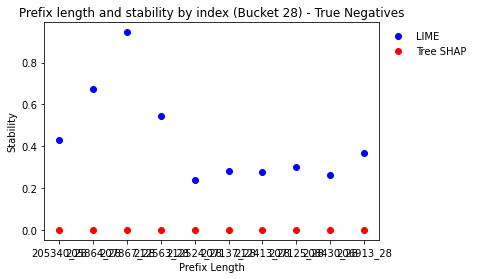

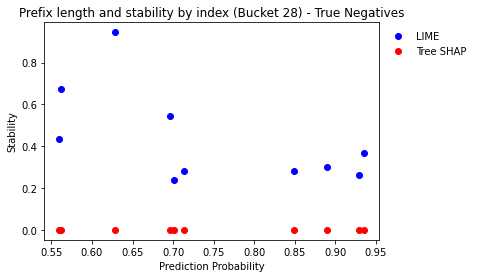

True Positives
Average LIME Weights Stability: 0.4358011251537685
Average SHAP Weights Stability: 1.6329101205928123e-17
10


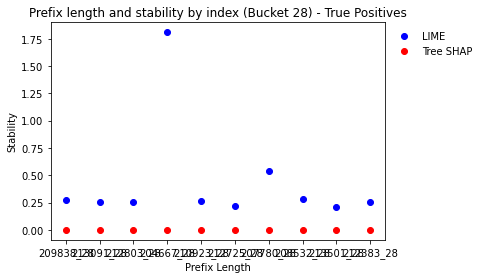

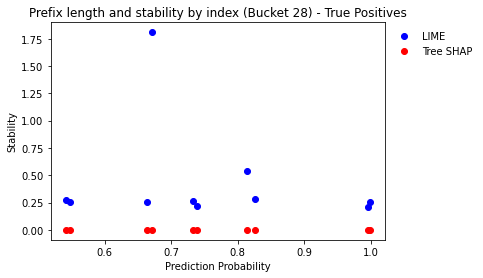

Bucket 29
True Negatives
Average LIME Weights Stability: 0.29894575561310077
Average SHAP Weights Stability: 1.6995664426291095e-17
10


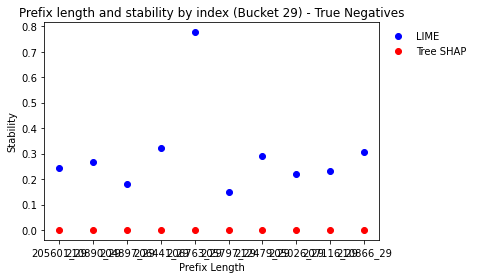

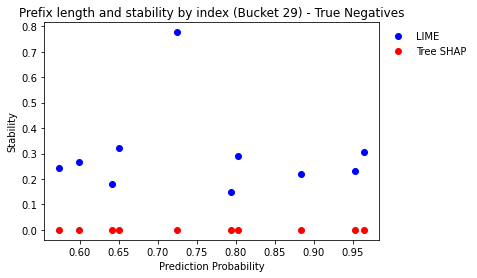

True Positives
Average LIME Weights Stability: 0.3300436725551164
Average SHAP Weights Stability: 1.7646339721108818e-17
10


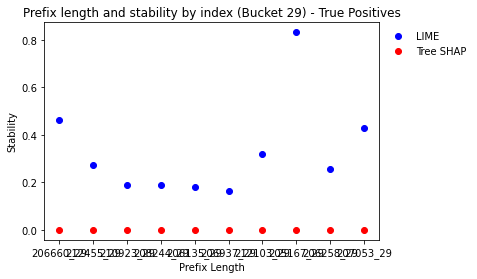

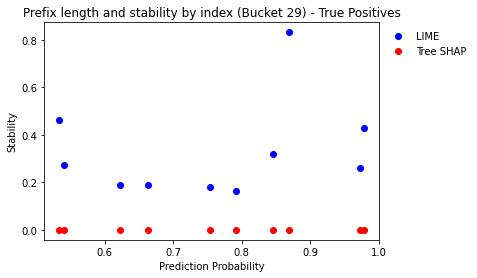

Bucket 30
True Negatives
Average LIME Weights Stability: 0.32274448636136
Average SHAP Weights Stability: 1.763551115857026e-17
10


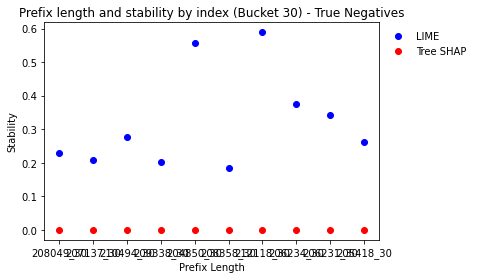

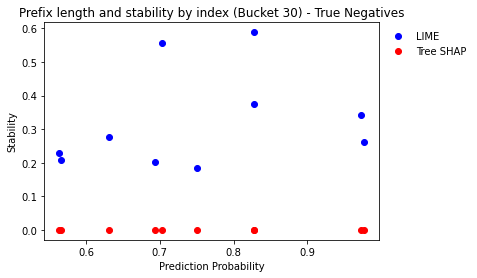

True Positives
Average LIME Weights Stability: 0.3045791519020467
Average SHAP Weights Stability: 1.6947896267986318e-17
10


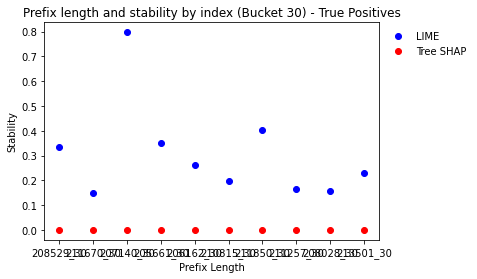

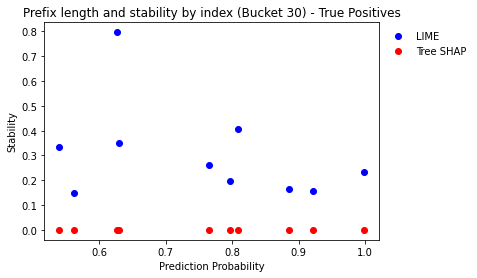

Bucket 31
True Negatives
Average LIME Weights Stability: 0.2773575698478151
Average SHAP Weights Stability: 1.5185414076315937e-17
10


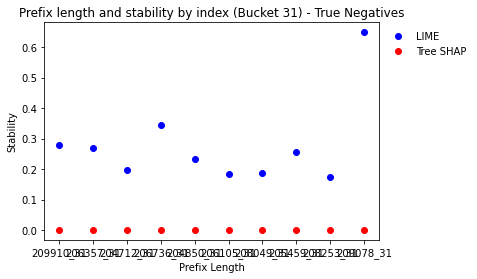

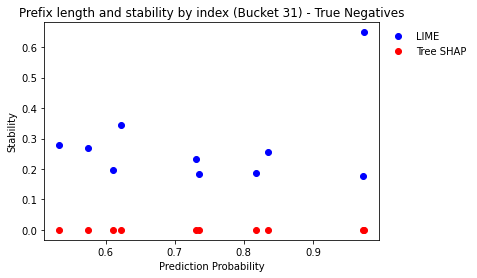

True Positives
Average LIME Weights Stability: 0.5673115035358051
Average SHAP Weights Stability: 1.6291411620879156e-17
10


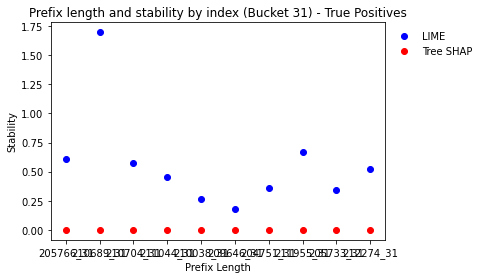

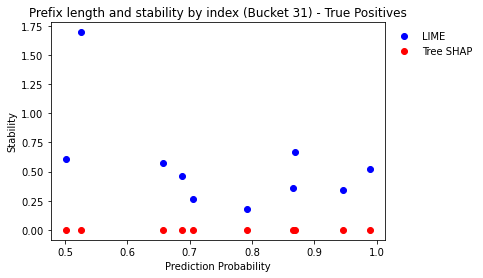

Bucket 32
True Negatives
Average LIME Weights Stability: 0.2609986389814225
Average SHAP Weights Stability: 1.8245011493322685e-17
10


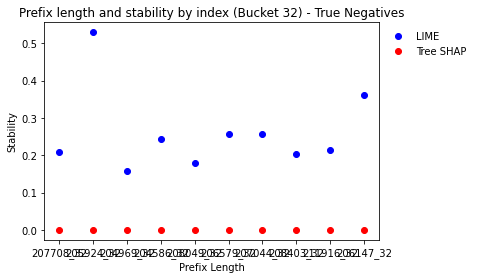

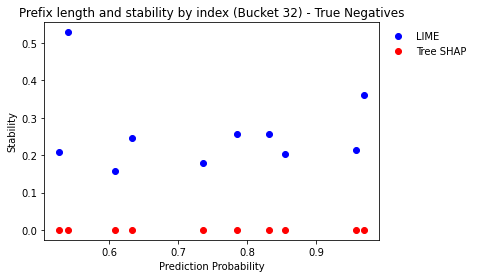

True Positives
Average LIME Weights Stability: 0.45967757140103693
Average SHAP Weights Stability: 1.5001562692781267e-17
10


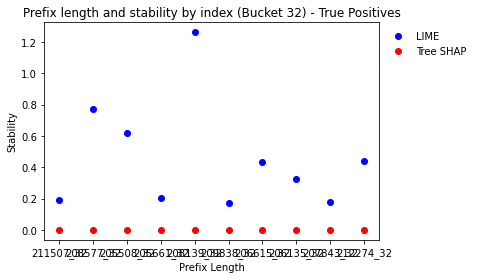

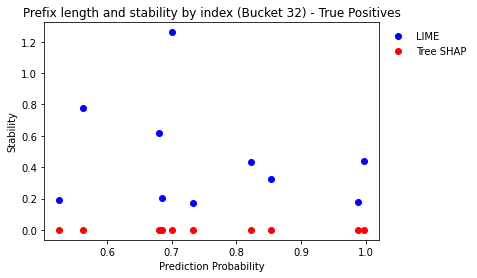

Bucket 33
True Negatives
Average LIME Weights Stability: 0.31310607414300656
Average SHAP Weights Stability: 1.725095815234887e-17
10


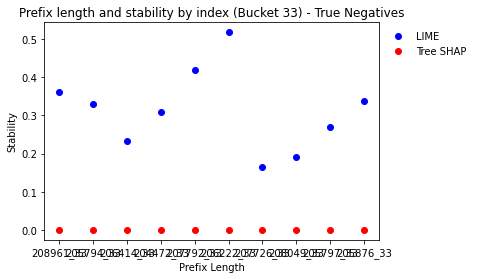

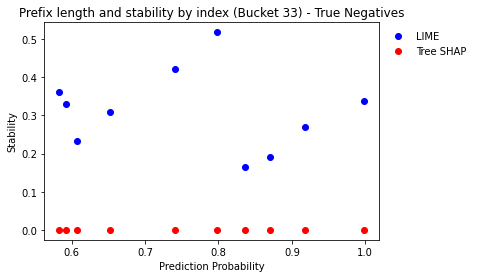

True Positives
Average LIME Weights Stability: 0.3682176949565833
Average SHAP Weights Stability: 1.5185070739134374e-17
10


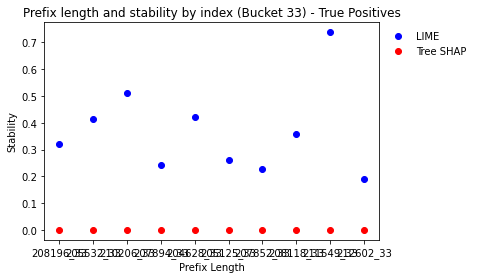

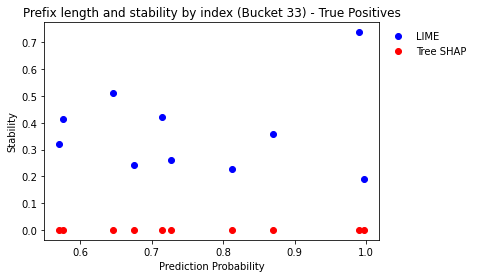

Bucket 34
True Negatives
Average LIME Weights Stability: 0.29360750054804796
Average SHAP Weights Stability: 1.486252299400212e-17
10


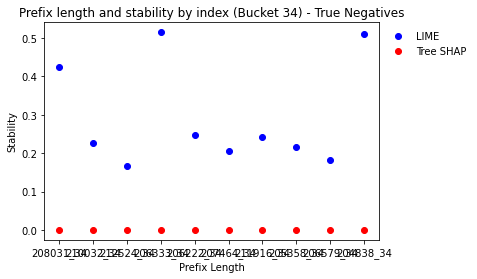

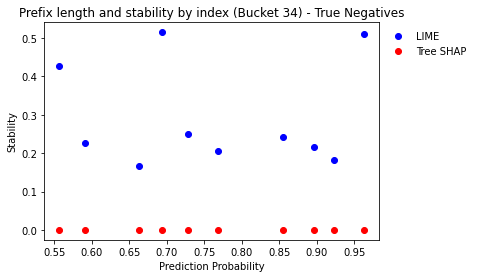

True Positives
Average LIME Weights Stability: 0.7212408244991046
Average SHAP Weights Stability: 1.542360614371448e-17
10


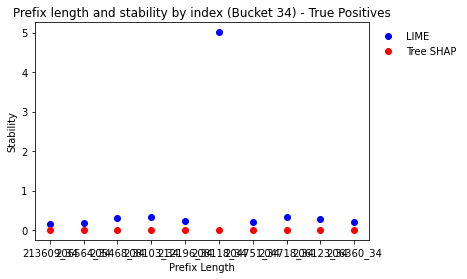

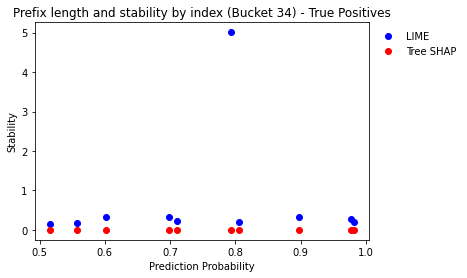

Bucket 35
True Negatives
Average LIME Weights Stability: 0.28785573500800954
Average SHAP Weights Stability: 1.539471030405722e-17
10


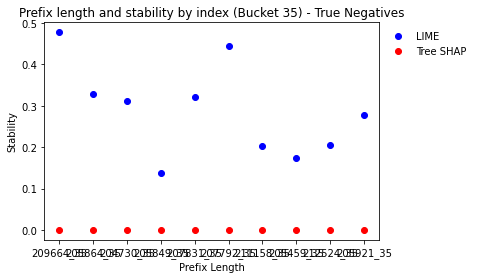

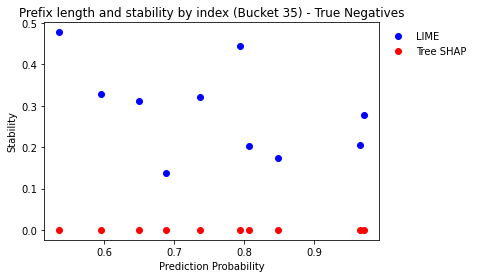

True Positives
Average LIME Weights Stability: 1.1198657119738555
Average SHAP Weights Stability: 1.3457506438726832e-17
10


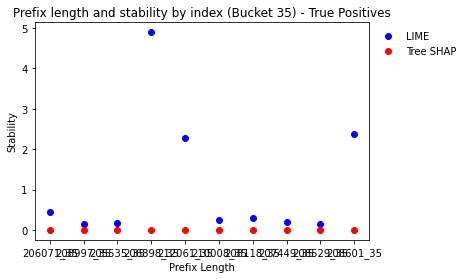

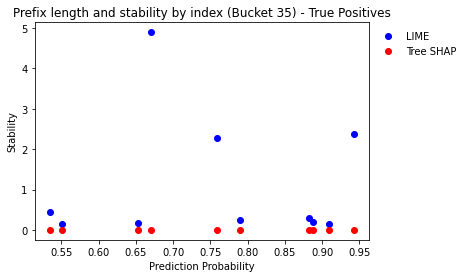

Bucket 36
True Negatives
Average LIME Weights Stability: 0.22783321332382805
Average SHAP Weights Stability: 1.637502869563339e-17
10


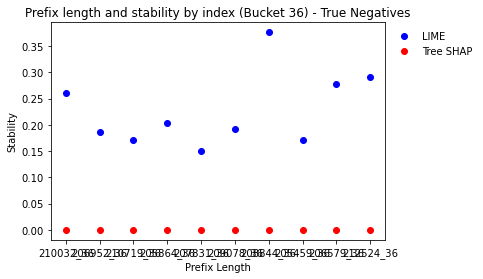

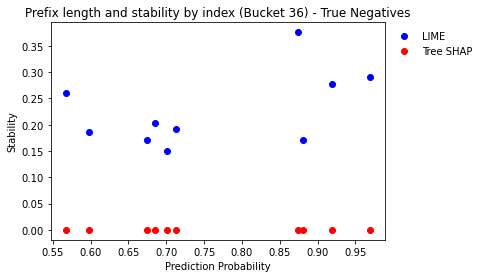

True Positives
Average LIME Weights Stability: 0.5251326800268323
Average SHAP Weights Stability: 1.4708683000861165e-17
10


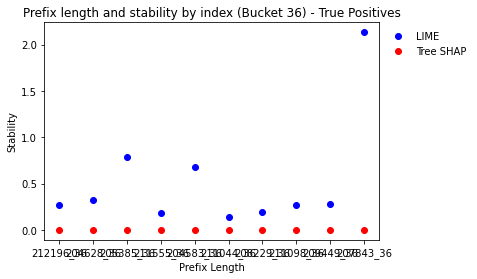

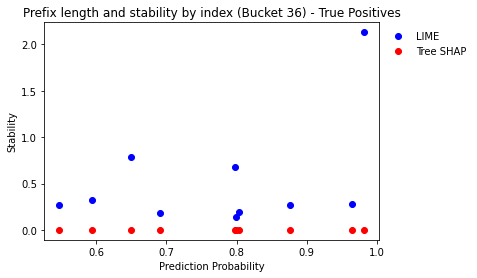

Bucket 37
True Negatives
Average LIME Weights Stability: 0.7103752896339917
Average SHAP Weights Stability: 1.4859858215290813e-17
10


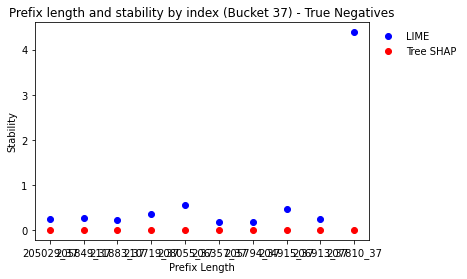

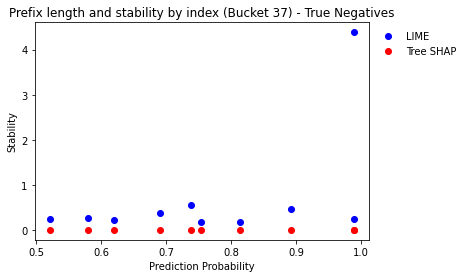

True Positives
Average LIME Weights Stability: 0.21341629329315018
Average SHAP Weights Stability: 1.4499282446166112e-17
10


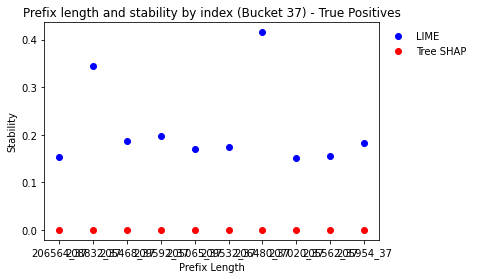

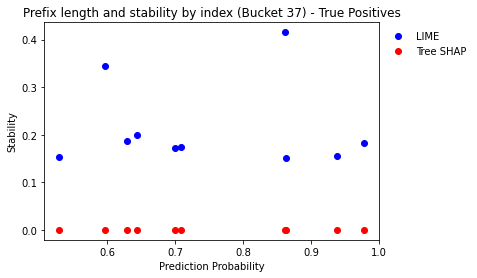

Bucket 38
True Negatives
Average LIME Weights Stability: 0.1704078750133241
Average SHAP Weights Stability: 1.5921855051099436e-17
10


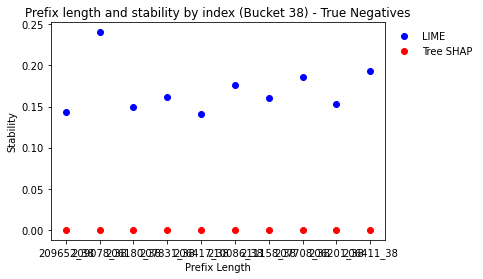

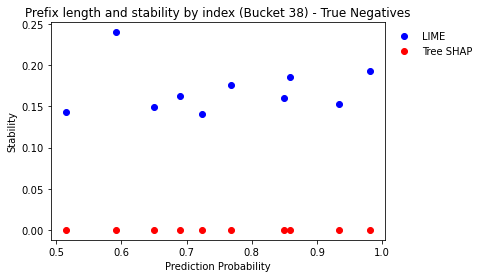

True Positives
Average LIME Weights Stability: 0.2758541449989074
Average SHAP Weights Stability: 1.4714063311145913e-17
10


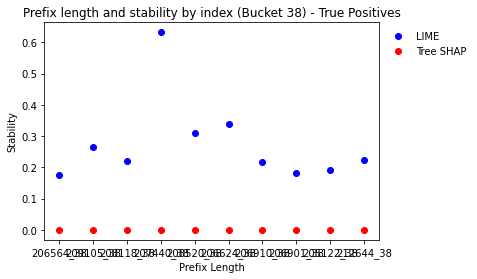

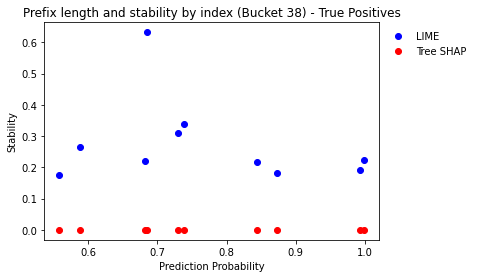

Bucket 39
True Negatives
Average LIME Weights Stability: 0.35066630906093293
Average SHAP Weights Stability: 1.3531917318198045e-17
10


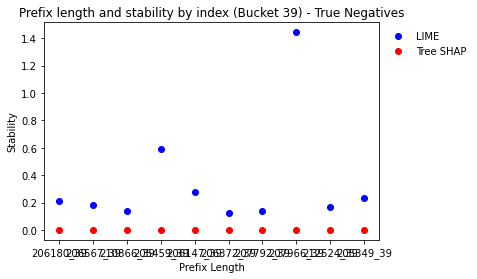

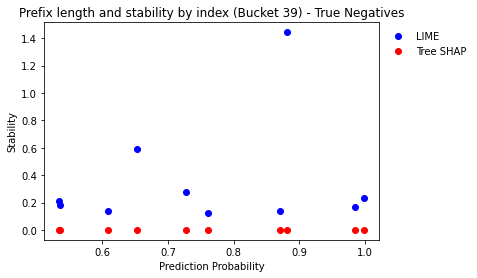

True Positives
Average LIME Weights Stability: 0.6147095480639633
Average SHAP Weights Stability: 1.4752609470803093e-17
10


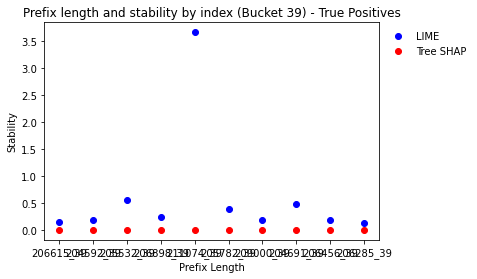

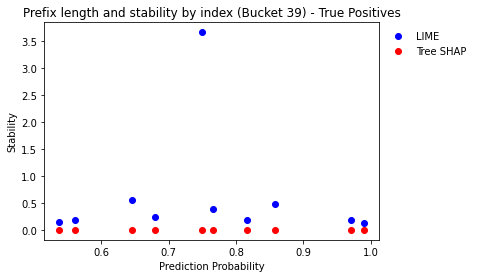

Bucket 40
True Negatives
Average LIME Weights Stability: 0.18929451683540963
Average SHAP Weights Stability: 1.4636359939496832e-17
10


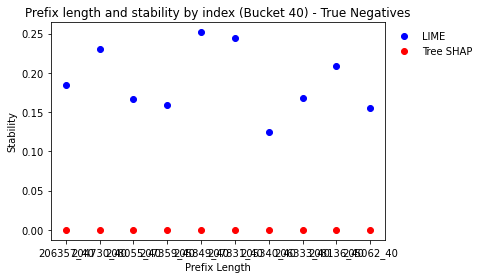

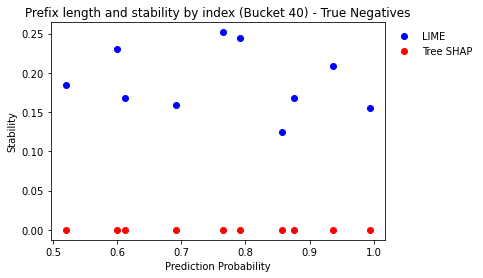

True Positives
Average LIME Weights Stability: 0.22265467498707625
Average SHAP Weights Stability: 1.4116305578743275e-17
10


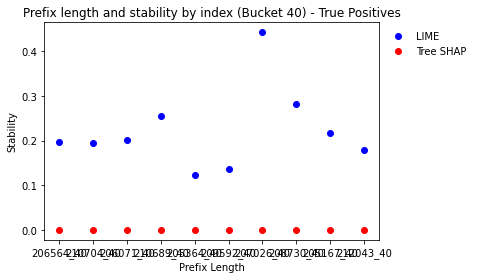

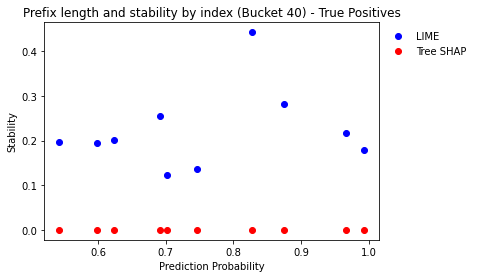

In [10]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = range(len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))]))

        for bucket in list(num_buckets):
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            #with open (fn_path, 'rb') as f:
            #    fn_list = pickle.load(f)
            #with open (fp_path, 'rb') as f:
            #    fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            #sample_instances.append(fn_list)
            #sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives"]#, "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                dispersal_lime = []
                dispersal_shap = []
                adj_dispersal_lime = []
                adj_dispersal_shap = []
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['adjusted_lime_importance_stability'])
                tree_shap_stability = pd.Series(data['adjusted_shap_importance_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Weights Stability:", statistics.mean(lime_stability))
                print("Average SHAP Weights Stability:", statistics.mean(tree_shap_stability))
                
                shap_dispersion = [disp for disp in tree_shap_stability if disp > 0]
                
                print (len(shap_dispersion))
                
                fig, ax = plt.subplots()
                ax.plot(case_id, lime_stability, 'bo', label = "LIME")
                ax.plot(case_id, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by index (Bucket %s) - %s" % (bucketID, type_list[i]))
                plt.show()

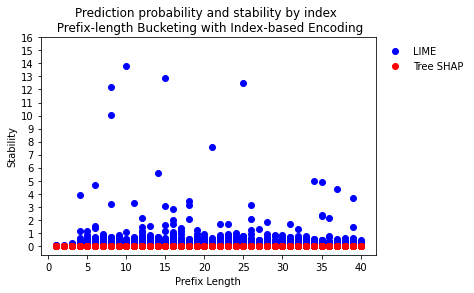

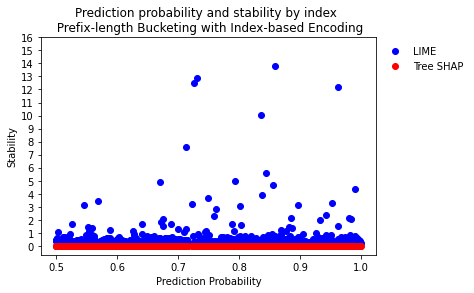

In [12]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,17,1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,17,1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Index-based Encoding")
plt.show()